<a href="https://colab.research.google.com/github/muhammadnadhir6/FinalTask_PBI/blob/main/Muhammad_Nadhir_Credit_Risk_Assesment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Credit Risk Assessment

### Objective

### 1. Create a credit score based on the weighting of the logistic regression
### 2. Interpretation of important features

### Import Library and Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

In [ ]:
df = pd.read_csv('loan_data_2007_2014.csv')

### Data Understanding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

* There are some columns that have null values so it needs to  **Cleansing**

In [ ]:
df.sample(5)

Unnamed: 0        id  member_id  loan_amnt  funded_amnt  \
369231      369231  19085438   21288182      20000        20000   
321425      321425  24656186   27089003      27425        27425   
417979      417979  13116475   15138677      10000        10000   
98110        98110   6906649    8548673      20500        20500   
290740      290740  29604356   32137540       8000         8000   

        funded_amnt_inv        term  int_rate  installment grade sub_grade  \
369231          20000.0   36 months     12.99       673.79     C        C1   
321425          27425.0   60 months     13.98       637.85     C        C3   
417979          10000.0   36 months     16.59       354.50     D        D1   
98110           20500.0   60 months     16.78       507.06     C        C5   
290740           8000.0   36 months     11.67       264.46     B        B4   

                              emp_title emp_length home_ownership  annual_inc  \
369231                         Delivery    5 years           RENT     60000.0   
321425               project accountant    7 years            OWN     55000.0   
417979                  general manager  10+ years       MORTGAGE     74000.0   
98110                DTC Communications    7 years       MORTGAGE     47000.0   
290740  Psychiatric nurse practitioner     6 years           RENT     70000.0   

       verification_status issue_d  loan_status pymnt_plan  \
369231     Source Verified  Jun-14      Current          n   
321425     Source Verified  Aug-14      Current          n   
417979            Verified  Apr-14   Fully Paid          n   
98110             Verified  Sep-13  Charged Off          n   
290740     Source Verified  Oct-14   Fully Paid          n   

                                                      url desc  \
369231  https://www.lendingclub.com/browse/loanDetail....  NaN   
321425  https://www.lendingclub.com/browse/loanDetail....  NaN   
417979  https://www.lendingclub.com/browse/loanDetail....  NaN   
98110   https://www.lendingclub.com/browse/loanDetail....  NaN   
290740  https://www.lendingclub.com/browse/loanDetail....  NaN   

                   purpose                    title zip_code addr_state  \
369231         credit_card  Credit card refinancing    024xx         MA   
321425         credit_card  Credit card refinancing    606xx         IL   
417979    home_improvement         Home improvement    925xx         CA   
98110   debt_consolidation                     Debt    371xx         TN   
290740  debt_consolidation       Debt consolidation    057xx         VT   

          dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
369231  33.60          0.0           Jul-02             0.0   
321425  22.21          0.0           Oct-98             0.0   
417979   1.90          0.0           Aug-03             0.0   
98110   21.11          0.0           May-99             0.0   
290740   5.35          1.0           May-95             1.0   

        mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
369231                     NaN                     NaN       8.0      0.0   
321425                     NaN                     NaN      14.0      0.0   
417979                    34.0                     NaN       8.0      0.0   
98110                      NaN                     NaN      10.0      0.0   
290740                    23.0                     NaN       3.0      0.0   

        revol_bal  revol_util  total_acc initial_list_status  out_prncp  \
369231      23203        84.1       30.0                   f   10410.76   
321425      26528        67.2       34.0                   w   21478.06   
417979       4770        56.1       26.0                   f       0.00   
98110        3191        18.7       31.0                   w       0.00   
290740       4784        95.7       24.0                   w       0.00   

        out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
369231       10410.76     12802.01         12802.01          95

* Drop column`Unnamed: 0` because it's just a sequence of indexes in the dataset

## Data Cleansing

In [ ]:
df_clean = df.copy()

In [ ]:
df_clean.drop(columns=['Unnamed: 0'], inplace = True)

In [ ]:
cat = df_clean.select_dtypes(include = 'object')
numerical = df_clean.select_dtypes(exclude = 'object')
cat_cols = cat.columns.to_list()
numerical_cols = numerical.columns.to_list()

In [ ]:
df_clean[numerical_cols].describe()

id     member_id      loan_amnt    funded_amnt  \
count  4.662850e+05  4.662850e+05  466285.000000  466285.000000   
mean   1.307973e+07  1.459766e+07   14317.277577   14291.801044   
std    1.089371e+07  1.168237e+07    8286.509164    8274.371300   
min    5.473400e+04  7.047300e+04     500.000000     500.000000   
25%    3.639987e+06  4.379705e+06    8000.000000    8000.000000   
50%    1.010790e+07  1.194108e+07   12000.000000   12000.000000   
75%    2.073121e+07  2.300154e+07   20000.000000   20000.000000   
max    3.809811e+07  4.086083e+07   35000.000000   35000.000000   

       funded_amnt_inv       int_rate    installment    annual_inc  \
count    466285.000000  466285.000000  466285.000000  4.662810e+05   
mean      14222.329888      13.829236     432.061201  7.327738e+04   
std        8297.637788       4.357587     243.485550  5.496357e+04   
min           0.000000       5.420000      15.670000  1.896000e+03   
25%        8000.000000      10.990000     256.690000  4.500000e+04   
50%       12000.000000      13.660000     379.890000  6.300000e+04   
75%       19950.000000      16.490000     566.580000  8.896000e+04   
max       35000.000000      26.060000    1409.990000  7.500000e+06   

                 dti    delinq_2yrs  inq_last_6mths  mths_since_last_delinq  \
count  466285.000000  466256.000000   466256.000000           215934.000000   
mean       17.218758       0.284678        0.804745               34.104430   
std         7.851121       0.797365        1.091598               21.778487   
min         0.000000       0.000000        0.000000                0.000000   
25%        11.360000       0.000000        0.000000               16.000000   
50%        16.870000       0.000000        0.000000               31.000000   
75%        22.780000       0.000000        1.000000               49.000000   
max        39.990000      29.000000       33.000000              188.000000   

       mths_since_last_record       open_acc        pub_rec     revol_bal  \
count            62638.000000  466256.000000  466256.000000  4.662850e+05   
mean                74.306012      11.187069       0.160564  1.623020e+04   
std                 30.357653       4.987526       0.510863  2.067625e+04   
min                  0.000000       0.000000       0.000000  0.000000e+00   
25%                 53.000000       8.000000       0.000000  6.413000e+03   
50%                 76.000000      10.000000       0.000000  1.176400e+04   
75%                102.000000      14.000000       0.000000  2.033300e+04   
max                129.000000      84.000000      63.000000  2.568995e+06   

          revol_util      total_acc      out_prncp  out_prncp_inv  \
count  465945.000000  466256.000000  466285.000000  466285.000000   
mean       56.176947      25.064430    4410.062342    4408.452258   
std        23.732628      11.600141    6355.078769    6353.198001   
min         0.000000       1.000000       0.000000       0.000000   
25%        39.200000      17.000000       0.000000       0.000000   
50%        57.600000      23.000000     441.470000     441.380000   
75%        74.700000      32.000000    7341.650000    7338.390000   
max       892.300000     156.000000   32160.380000   32160.380000   

         total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
count  466285.000000    466285.000000    466285.000000  466285.000000   
mean    11540.686220     11469.892747      8866.014657    2588.677225   
std      8265.627112      8254.157579      7031.687997    2483.809661   
min         0.000000         0.000000         0.000000       0.000000   
25%      5552.125349      5499.250000      3708.560000     957.280000   
50%      9419.250943      9355.430000      6817.760000    1818.880000   
75%     15308.158460     15231.310000     12000.000000    3304.530000   
max     57777.579870     57777.580000     35000.030000   24205.620000   

       total_rec_late_fee     recoveries  collection_recovery_fee  \
count       466285.000000  

* Seen some features have more null values so they need to be drop

In [ ]:
df_clean[cat_cols].describe().T

count  unique  \
term                 466285       2   
grade                466285       7   
sub_grade            466285      35   
emp_title            438697  205475   
emp_length           445277      11   
home_ownership       466285       6   
verification_status  466285       3   
issue_d              466285      91   
loan_status          466285       9   
pymnt_plan           466285       2   
url                  466285  466285   
desc                 125983  124436   
purpose              466285      14   
title                466265   63099   
zip_code             466285     888   
addr_state           466285      50   
earliest_cr_line     466256     664   
initial_list_status  466285       2   
last_pymnt_d         465909      98   
next_pymnt_d         239071     100   
last_credit_pull_d   466243     103   
application_type     466285       1   

                                                                   top    freq  
term                                                         36 months  337953  
grade                                                                B  136929  
sub_grade                                                           B3   31686  
emp_title                                                      Teacher    5399  
emp_length                                                   10+ years  150049  
home_ownership                                                MORTGAGE  235875  
verification_status                                           Verified  168055  
issue_d                                                         Oct-14   38782  
loan_status                                                    Current  224226  
pymnt_plan                                                           n  466276  
url                  https://www.lendingclub.com/browse/loanDetail....       1  
desc                                                                       234  
purpose                                             debt_consolidation  274195  
title                                               Debt consolidation  164075  
zip_code                                                         945xx    5304  
addr_state                                                          CA   71450  
earliest_cr_line                                                Oct-00    3674  
initial_list_status                                                  f  303005  
last_pymnt_d                                                    Jan-16  179620  
next_pymnt_d                                                    Feb-16  208393  
last_credit_pull_d                                              Jan-16  327699  
application_type                                            INDIVIDUAL  466285

* Some categorical features have data form that should be of type datetime but are still of type object in this dataset<br>
* Some categorical features also have too many unique values and only have one unique value so it will be drop

### Check Duplicated Values

In [ ]:
df_clean.duplicated().sum()

0

* Seen there is no duplicate data so that one row already represents one individual

### Check Missing Value

In [ ]:
# Total null values
total_null = df_clean.isnull().sum()
percent_missing = df_clean.isnull().sum() * 100/ len(df)
dtypes = [df_clean[col].dtype for col in df_clean.columns]
df_missing_value = pd.DataFrame({'total_null': total_null,
                                'data_type': dtypes,
                                'percent_missing': percent_missing})
df_missing_value.sort_values('percent_missing', ascending = False,inplace = True)
missing_value = df_missing_value[df_missing_value['percent_missing']>0].reset_index()

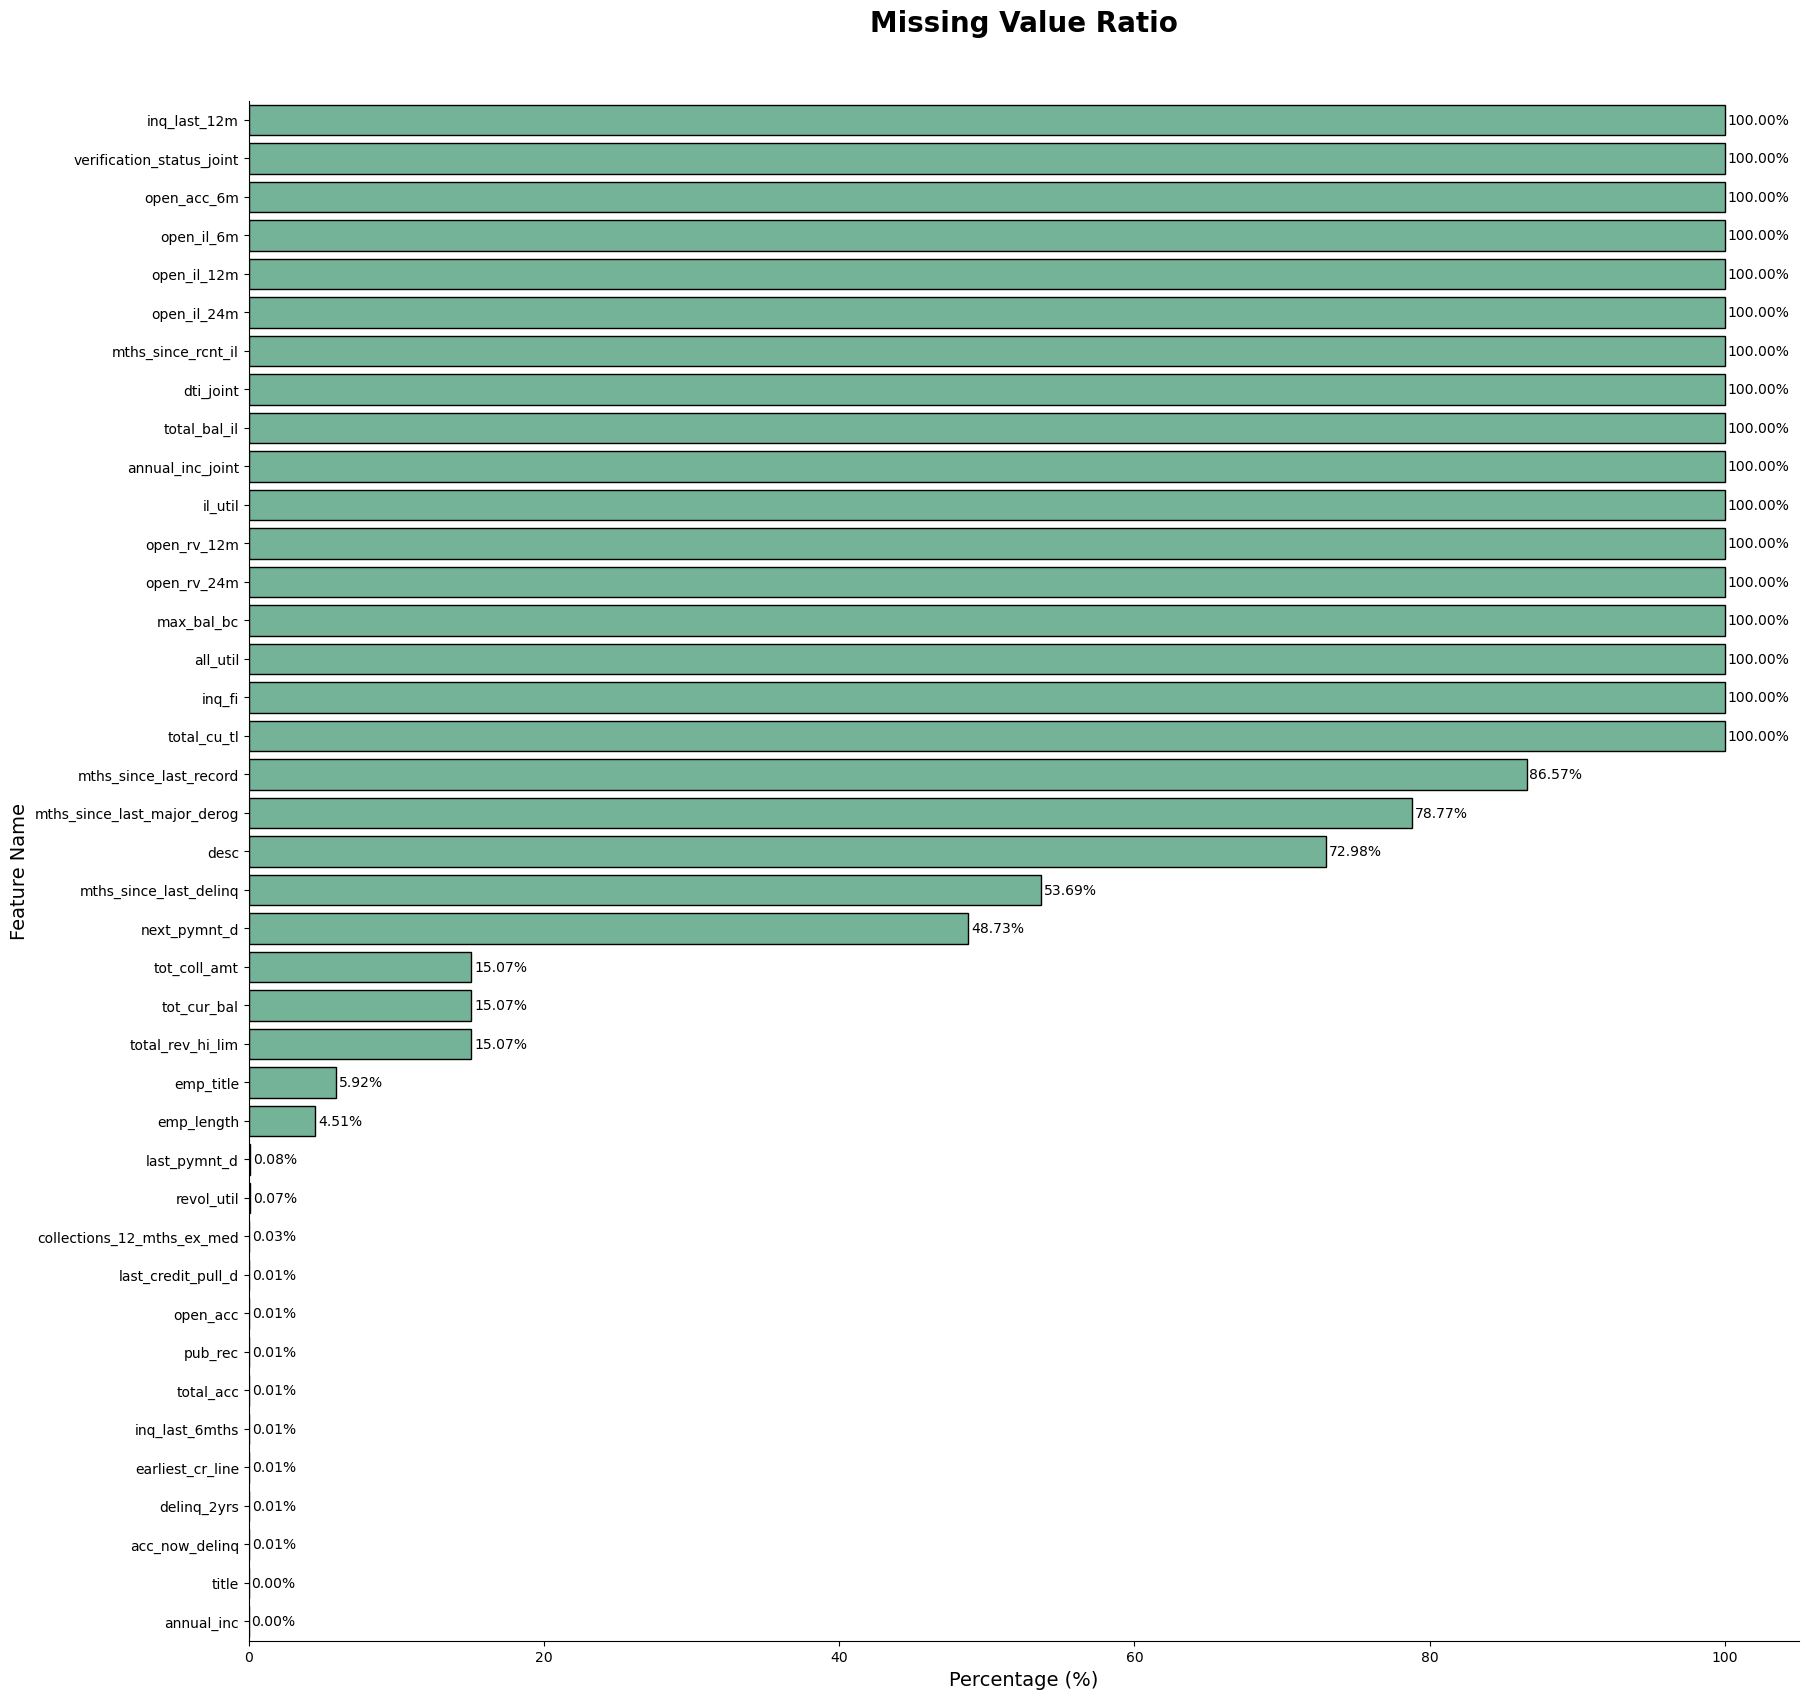

In [ ]:
plt.style.use('default')
fig, ax = plt.subplots(figsize=(20, 20))
plt.title("Missing Value Ratio", fontsize=20, color='black', weight='bold',pad = 50)
#plt.text(x=0, y=-2, s="Persentase tertinggi karyawan resign Data Analyst 50%  ,disusul Sofware Engineer (Front End) 61% dan Product Design (UI & UX) 62%\nSoftware Engineer Front End maupun Back End memiliki jumlah karywan resign tertinggi ",
         #fontsize=15, fontstyle='italic')
sns.barplot(y='index', x='percent_missing', data=missing_value, edgecolor='black',color = '#6BBD9B')
plt.bar_label(ax.containers[0], padding=2,fmt='%.2f%%')
plt.xlabel('Percentage (%)', fontsize=14)
plt.ylabel('Feature Name', fontsize=14)
sns.despine()

## Handling Missing Value

In [ ]:
# Drop feature that have more than 50% missing value
col_full_null = df_missing_value.loc[df_missing_value['percent_missing']> 50].index.tolist()
df_clean.drop(columns=col_full_null, inplace = True)

# Feature `tot_coll_amt`,`tot_cur_bal`,`total_rev_hi_lim` replace missing value with "0" because asumption that customer didn't borrowed again
for col in ['tot_coll_amt','tot_cur_bal','total_rev_hi_lim']:
    df_clean[col] = df_clean[col].fillna(0)

# Numerical columns replace missing value with "Median"
for col in df_clean.select_dtypes(exclude = 'object'):
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())
df_clean.isnull().sum()

# Categorical columns replace missing value with "Mode"
for col in df_clean.select_dtypes(include = 'object'):
    df_clean[col] = df_clean[col].fillna(df_clean[col].mode().iloc[0])
df_clean.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_ac

## Check Target Value

### Target Feature : `loan_status`

In [ ]:
df_clean['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [ ]:
df_clean['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

* There are 9 unique values in the loan_status column that will be the target model.<br>
* Divided into two groups such as binary classification, namely "good loans" with the number 1 and "bad_loan" with the number 0<br>
* good_loan is defined as having a loan status of `Current`, `Fully Paid` , and `In Grace Period`<br>
* bad loan is defined as having a loan status other than good loan

In [ ]:
good_loan = ['Current','Fully Paid','In Grace Period']
df_clean['loan_status'] = np.where(df_clean['loan_status'].isin(good_loan),1,0)
df_clean['loan_status'].value_counts()

1    412111
0     54174
Name: loan_status, dtype: int64

### Drop Unnecesary Column

Removal of features such as features that are unique id, in the form of free text

In [ ]:
df_clean.drop(columns=['member_id','url','title','addr_state','zip_code','policy_code','application_type','emp_title'], inplace = True)

In [ ]:
df_cleaned = df_clean.copy()

## Feature Engineering

### Date Time Feature : 'earliest_cr_line','last_credit_pull_d','last_pymnt_d','issue_d','next_pymnt_d'

In [ ]:
df_cleaned['earliest_cr_line'] = pd.to_datetime(df_cleaned['earliest_cr_line'], format = '%b-%y')
df_cleaned['last_credit_pull_d'] = pd.to_datetime(df_cleaned['last_credit_pull_d'], format = '%b-%y')
df_cleaned['last_pymnt_d'] = pd.to_datetime(df_cleaned['last_pymnt_d'], format = '%b-%y')
df_cleaned['issue_d'] = pd.to_datetime(df_cleaned['issue_d'], format = '%b-%y')
df_cleaned['next_pymnt_d'] = pd.to_datetime(df_cleaned['next_pymnt_d'], format = '%b-%y')

In [ ]:
df_cleaned[['earliest_cr_line','last_credit_pull_d','last_pymnt_d','issue_d','next_pymnt_d']].head()

earliest_cr_line last_credit_pull_d last_pymnt_d    issue_d next_pymnt_d
0       1985-01-01         2016-01-01   2015-01-01 2011-12-01   2016-02-01
1       1999-04-01         2013-09-01   2013-04-01 2011-12-01   2016-02-01
2       2001-11-01         2016-01-01   2014-06-01 2011-12-01   2016-02-01
3       1996-02-01         2015-01-01   2015-01-01 2011-12-01   2016-02-01
4       1996-01-01         2016-01-01   2016-01-01 2011-12-01   2016-02-01

Adding New Feature :<br>
* `pymnt_time` = the number of month between `next_pymnt_d` and `last_pymnt_d`
* `credit_pull_year` = the number of year between `earliest_cr_line` and `last_credit_pull_d`

In [ ]:
def diff_month(d1, d2):
    return (d1.year - d2.year) * 12 + d1.month - d2.month
def diff_year(d1, d2):
    return (d1.year - d2.year)

In [ ]:
df_cleaned['pymnt_time'] = df_cleaned.apply(lambda x: diff_month(x.next_pymnt_d, x.last_pymnt_d), axis=1)
df_cleaned['credit_pull_year'] = df_cleaned.apply(lambda x: diff_year(x.last_credit_pull_d, x.earliest_cr_line), axis=1)

In [ ]:
df_cleaned[df_cleaned['pymnt_time']<0][['next_pymnt_d','last_pymnt_d','pymnt_time']]

next_pymnt_d last_pymnt_d  pymnt_time
40122   2011-02-01   2016-01-01         -59
40481   2010-10-01   2016-01-01         -63
40498   2010-10-01   2016-01-01         -63
40753   2010-06-01   2016-01-01         -67
40769   2010-06-01   2016-01-01         -67
40785   2010-06-01   2016-01-01         -67
40848   2010-05-01   2016-01-01         -68
40914   2010-04-01   2016-01-01         -69
40927   2010-04-01   2016-01-01         -69
41145   2009-11-01   2016-01-01         -74
41887   2008-12-01   2016-01-01         -85
41931   2009-01-01   2016-01-01         -84

In [ ]:
df_cleaned[df_cleaned['credit_pull_year']<0][['earliest_cr_line','last_credit_pull_d','credit_pull_year']]

earliest_cr_line last_credit_pull_d  credit_pull_year
1580         2062-09-01         2013-09-01               -49
1770         2068-09-01         2015-09-01               -53
2799         2064-09-01         2016-01-01               -48
3282         2067-09-01         2015-05-01               -52
3359         2065-02-01         2014-11-01               -51
...                 ...                ...               ...
464003       2068-01-01         2016-01-01               -52
464260       2066-07-01         2015-12-01               -51
465100       2067-10-01         2016-01-01               -51
465500       2067-09-01         2015-09-01               -52
465655       2056-01-01         2014-03-01               -42

[1169 rows x 3 columns]

* There is a negative value in the `pymnt_time` feature, the value will be replaced with 0 because it assumes that the customer does not have a bill to make a payment

* There is an false input in the `earliest_cr_line` feature, resulting in a negative `credit_pull_year` value so that the line with that value will be replaced with the maximum value of the `credit_pull_year `feature

In [ ]:
df_cleaned.loc[df_cleaned['pymnt_time'] < 0,'pymnt_time'] = 0
df_cleaned.loc[df_cleaned['credit_pull_year'] < 0,'credit_pull_year'] = df_cleaned['credit_pull_year'].max()

### Drop column that already extract

In [ ]:
df_cleaned.drop(columns=['issue_d','earliest_cr_line','next_pymnt_d','last_pymnt_d','last_credit_pull_d'], inplace = True)

### Date Time Feature : `term` to integer

In [ ]:
df_cleaned['term'].value_counts()

 36 months    337953
 60 months    128332
Name: term, dtype: int64

In [ ]:
df_cleaned['term'] = df_cleaned['term'].apply(lambda term: int(term[:3]))

In [ ]:
df_cleaned['term'].value_counts()

36    337953
60    128332
Name: term, dtype: int64

In [ ]:
df_cleaned.shape

(466285, 42)

In [ ]:
df_cleaned.head()

id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
0  1077501       5000         5000           4975.0    36     10.65   
1  1077430       2500         2500           2500.0    60     15.27   
2  1077175       2400         2400           2400.0    36     15.96   
3  1076863      10000        10000          10000.0    36     13.49   
4  1075358       3000         3000           3000.0    60     12.69   

   installment grade sub_grade emp_length home_ownership  annual_inc  \
0       162.87     B        B2  10+ years           RENT     24000.0   
1        59.83     C        C4   < 1 year           RENT     30000.0   
2        84.33     C        C5  10+ years           RENT     12252.0   
3       339.31     C        C1  10+ years           RENT     49200.0   
4        67.79     B        B5     1 year           RENT     80000.0   

  verification_status  loan_status pymnt_plan         purpose    dti  \
0            Verified            1          n     credit_card  27.65   
1     Source Verified            0          n             car   1.00   
2        Not Verified            1          n  small_business   8.72   
3     Source Verified            1          n           other  20.00   
4     Source Verified            1          n           other  17.94   

   delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  \
0          0.0             1.0       3.0      0.0      13648        83.7   
1          0.0             5.0       3.0      0.0       1687         9.4   
2          0.0             2.0       2.0      0.0       2956        98.5   
3          0.0             1.0      10.0      0.0       5598        21.0   
4          0.0             0.0      15.0      0.0      27783        53.9   

   total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0        9.0                   f        0.0            0.0   5861.071414   
1        4.0                   f        0.0            0.0   1008.710000   
2       10.0                   f        0.0            0.0   3003.653644   
3       37.0                   f        0.0            0.0  12226.302210   
4       38.0                   f      766.9          766.9   3242.170000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5831.78          5000.00         861.07                0.00   
1          1008.71           456.46         435.17                0.00   
2          3003.65          2400.00         603.65                0.00   
3         12226.30         10000.00        2209.33               16.97   
4          3242.17          2233.10        1009.07                0.00   

   recoveries  collection_recovery_fee  last_pymnt_amnt  \
0        0.00                     0.00           171.62   
1      117.08                     1.11           119.66   
2        0.00                     0.00           649.91   
3        0.00                     0.00           357.48   
4        0.00                     0.00            67.79   

   collections_12_mths_ex_med  acc_now_delinq  tot_coll_amt  tot_cur_bal  \
0                         0.0             0.0           0.0          0.0   
1                         0.0             0.0           0.0          0.0   
2                         0.0             0.0           0.0          0.0   
3                         0.0             0.0           0.0          0.0   
4                         0.0             0.0           0.0          0.0   

   total_rev_hi_lim  pymnt_time  credit_pull_year  
0               0.0          13                31  
1               0.0          34                14  
2               0.0          20                15  
3               0.0          13                19  
4               0.0           1                20

### EDA

In [ ]:
df_eda = df_cleaned.copy()

In [ ]:
df_eda.drop(columns=['id'], inplace = True)

In [ ]:
num = df_eda.select_dtypes(include='number').columns
cat = df_eda.select_dtypes(include='object').columns

<AxesSubplot:>

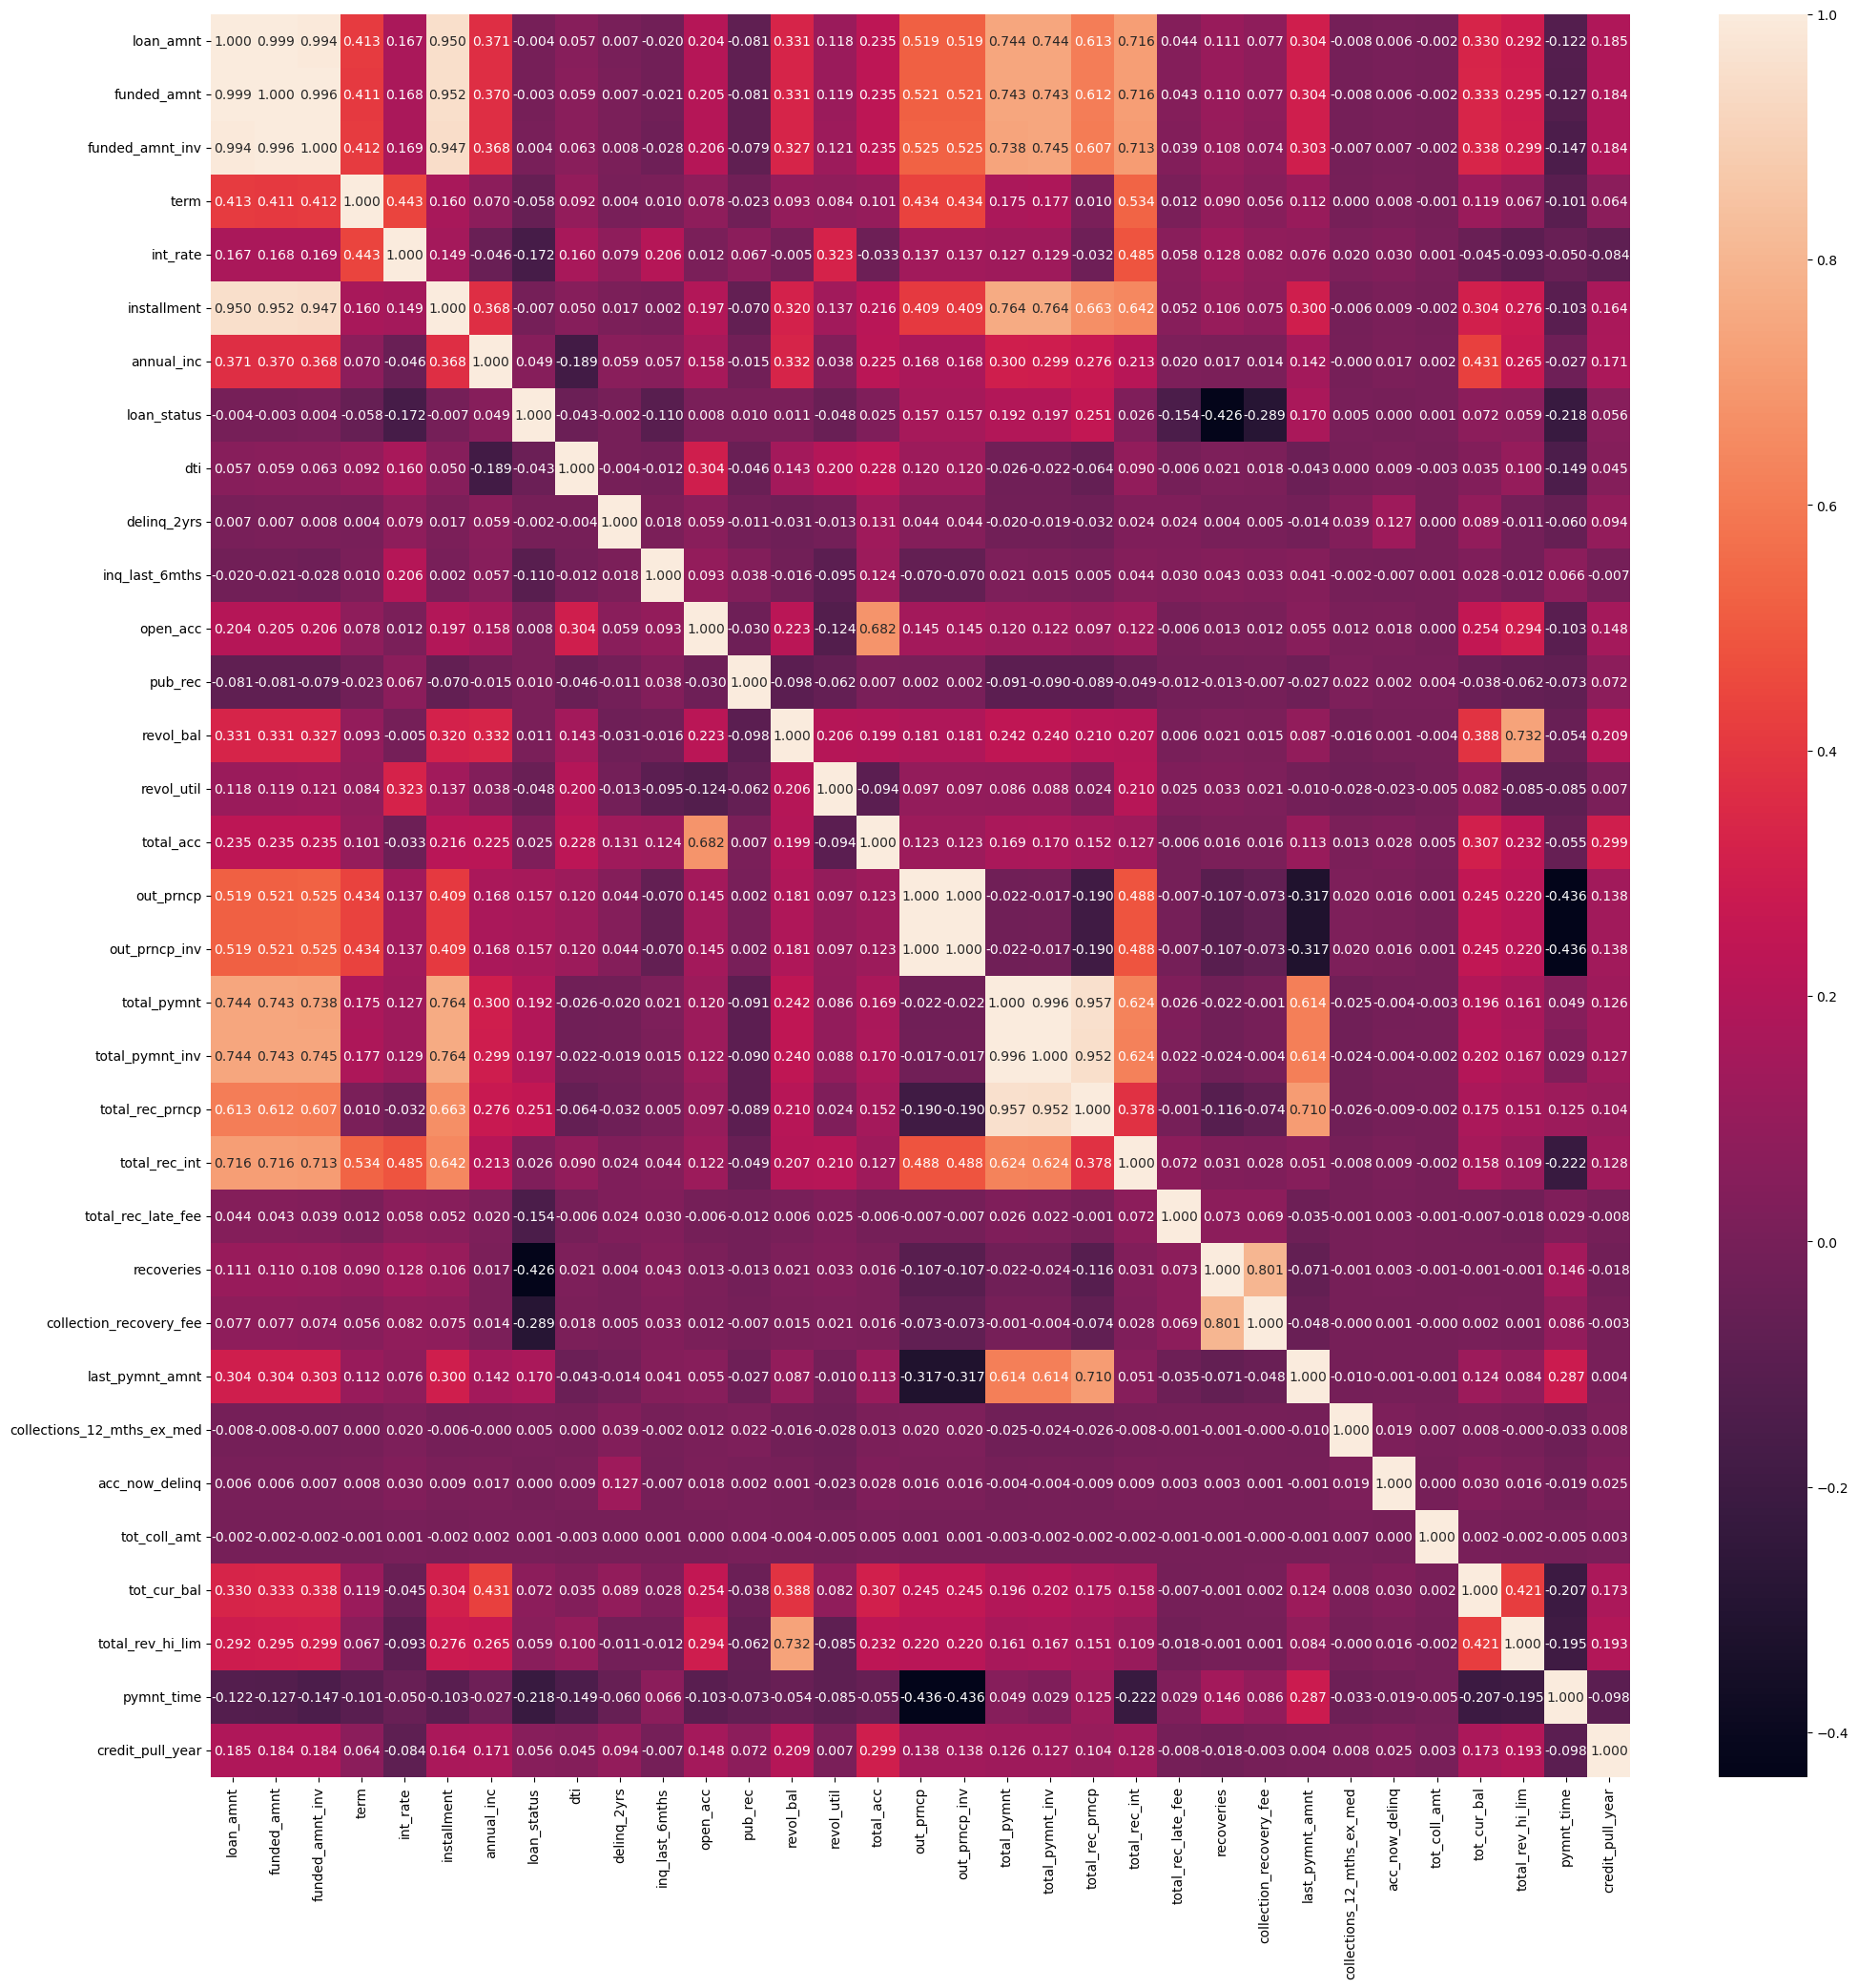

In [ ]:
plt.figure(figsize=(24,24))
sns.heatmap(df_eda.corr(),annot=True,fmt='.3f')

* It appears that there are several independent features that are highly correlated with each other so that it can lead to biased results if left unchecked.
* Decided to remove features that have a correlation of more than 0.8

In [ ]:
corr_matrix = df_eda.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
high_multicol = [column for column in upper.columns if any(upper[column] > 0.8)]

In [ ]:
high_multicol

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt_inv',
 'total_rec_prncp',
 'collection_recovery_fee']

In [ ]:
df_eda.drop(high_multicol, axis=1, inplace=True)

In [ ]:
df_eda[cat].nunique()

grade                   7
sub_grade              35
emp_length             11
home_ownership          6
verification_status     3
pymnt_plan              2
purpose                14
initial_list_status     2
dtype: int64

* `grade` and `sub_grade` have similar interpretations, so decided to remove the `sub_grade` feature because it is already represented by `grade`

In [ ]:
df_eda.drop(['sub_grade'], axis=1, inplace=True)

## Univariate Analysis

### Numeric Feature

In [ ]:
len(df_eda.select_dtypes(include='number').columns)

26

In [ ]:
num = df_eda.select_dtypes(include='number').columns
cat = df_eda.select_dtypes(include='object').columns

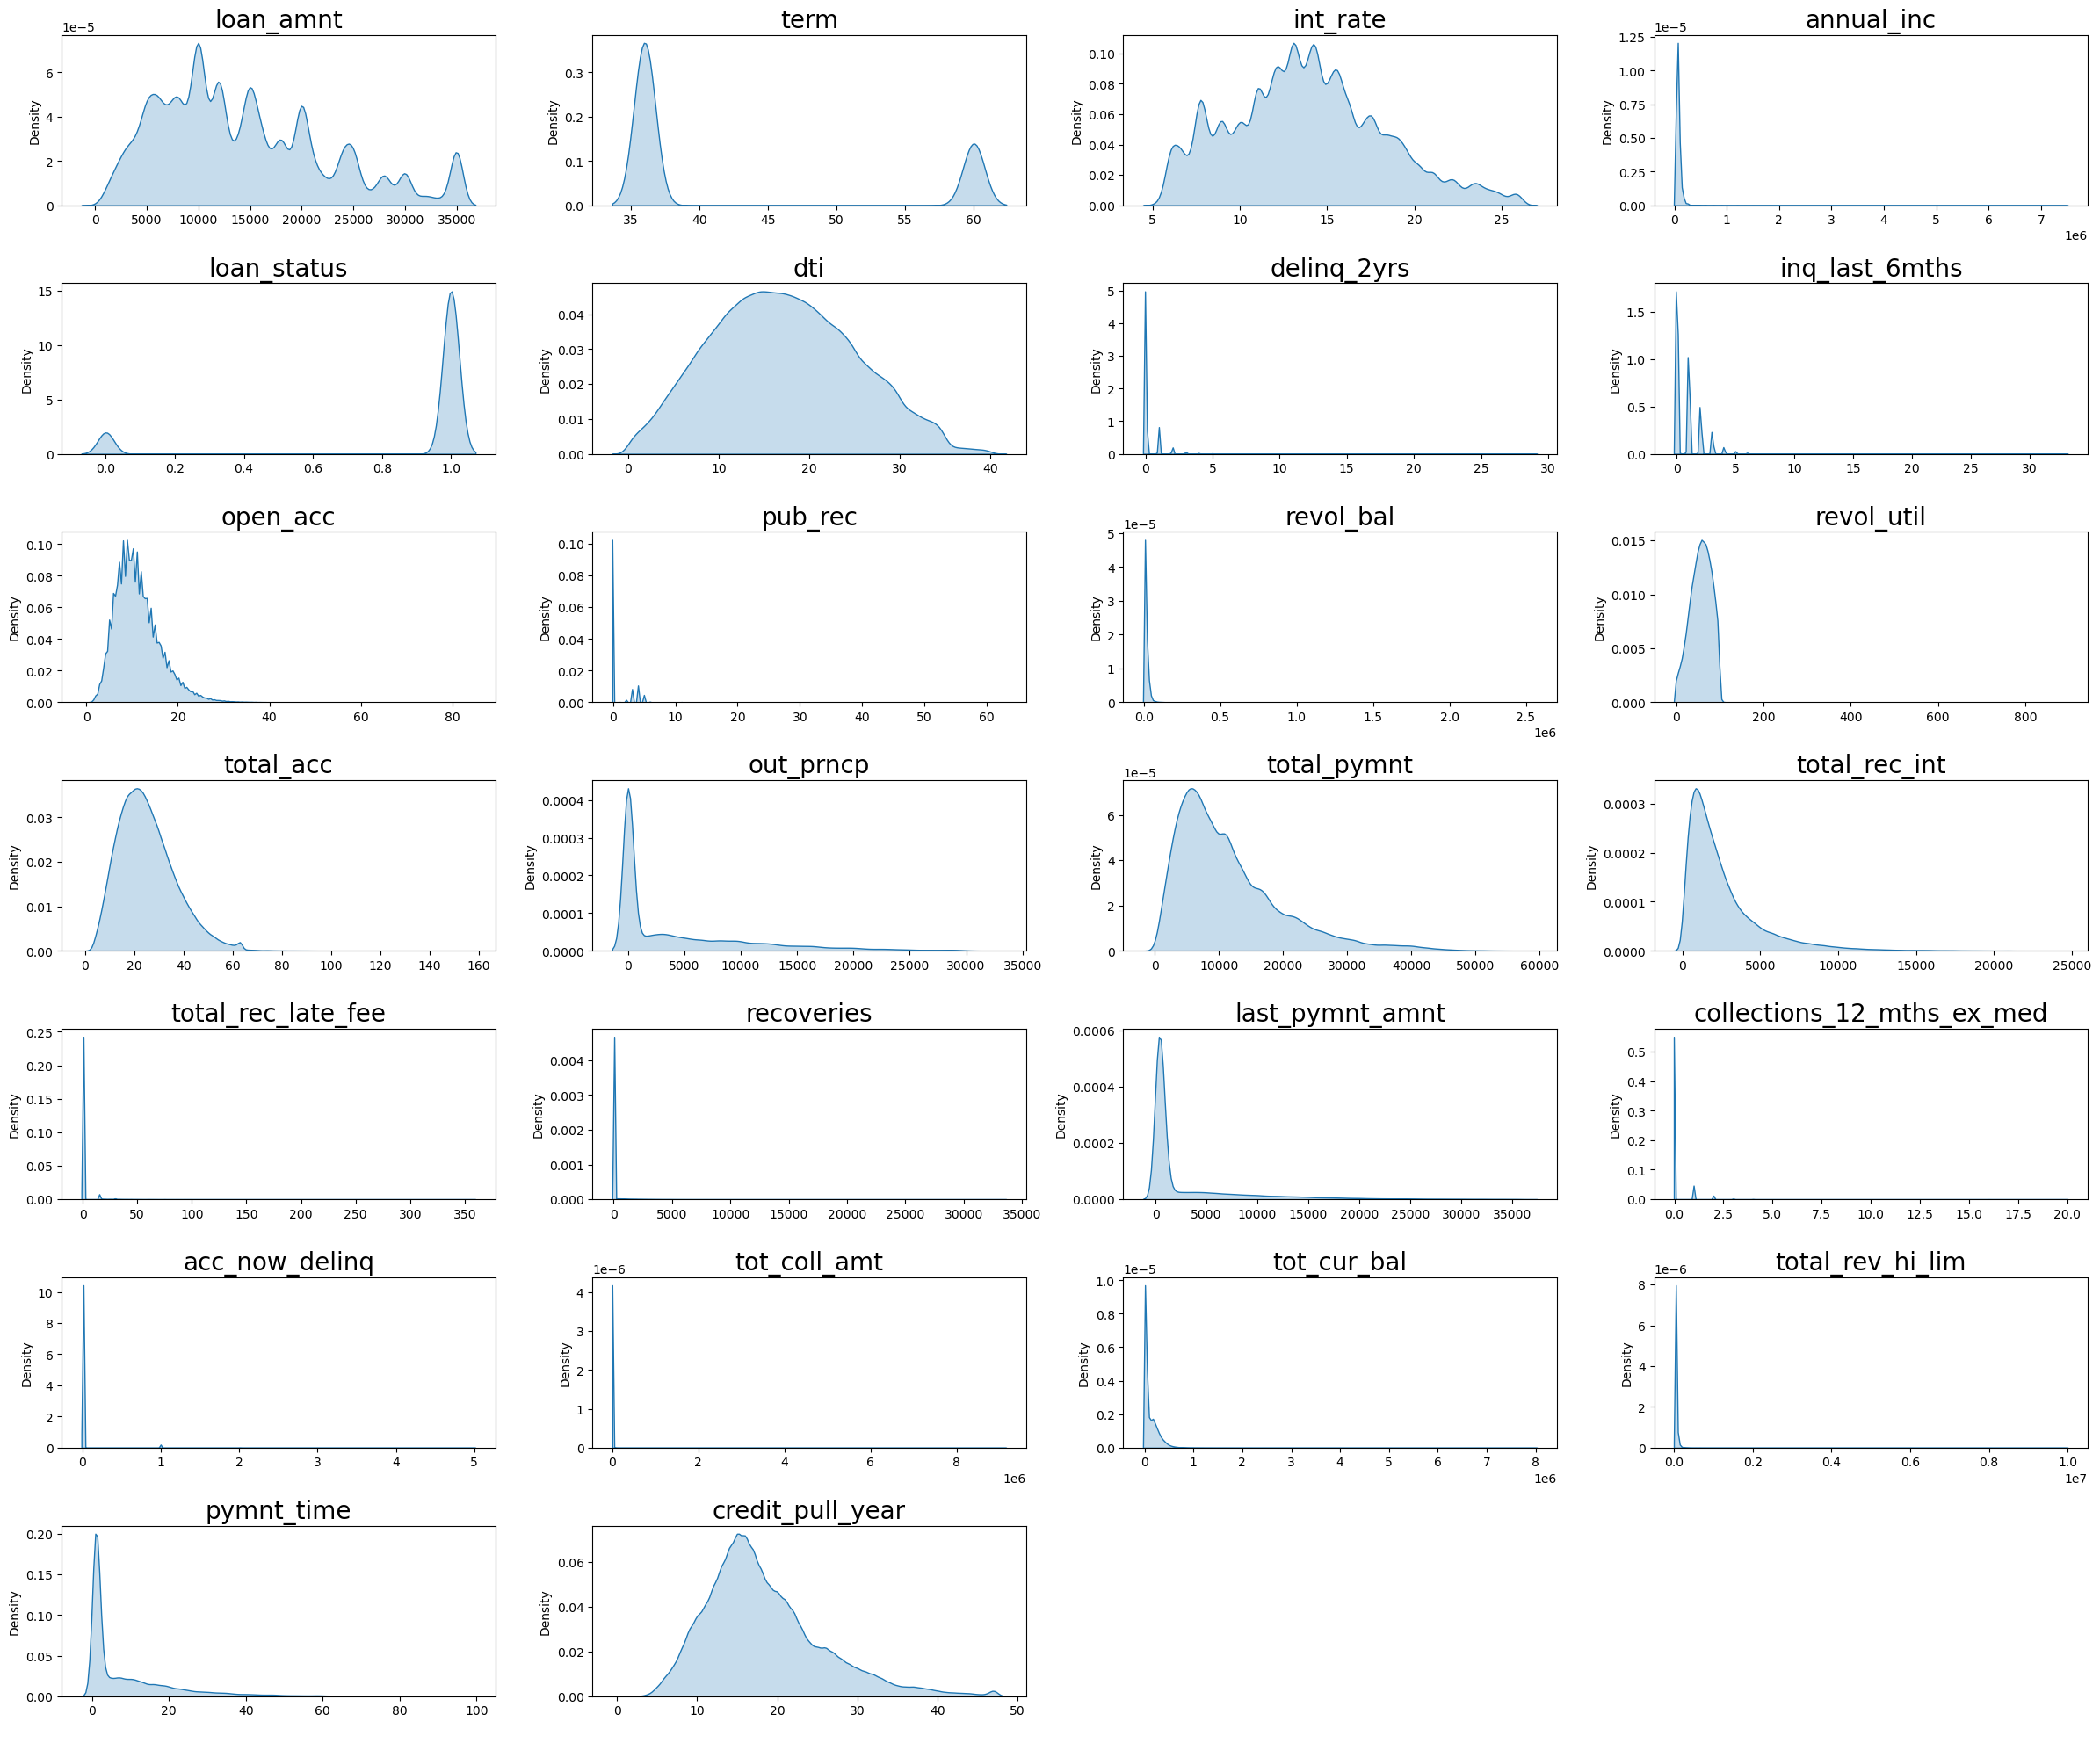

In [ ]:
plt.figure(figsize=(24,28))
for i in range(0,len(num)):
    plt.subplot(10,4,i+1)
    sns.kdeplot(x=df_eda[num[i]], palette='viridis', shade=True)
    plt.title(num[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

* The majority of numerical features are not normally distributed

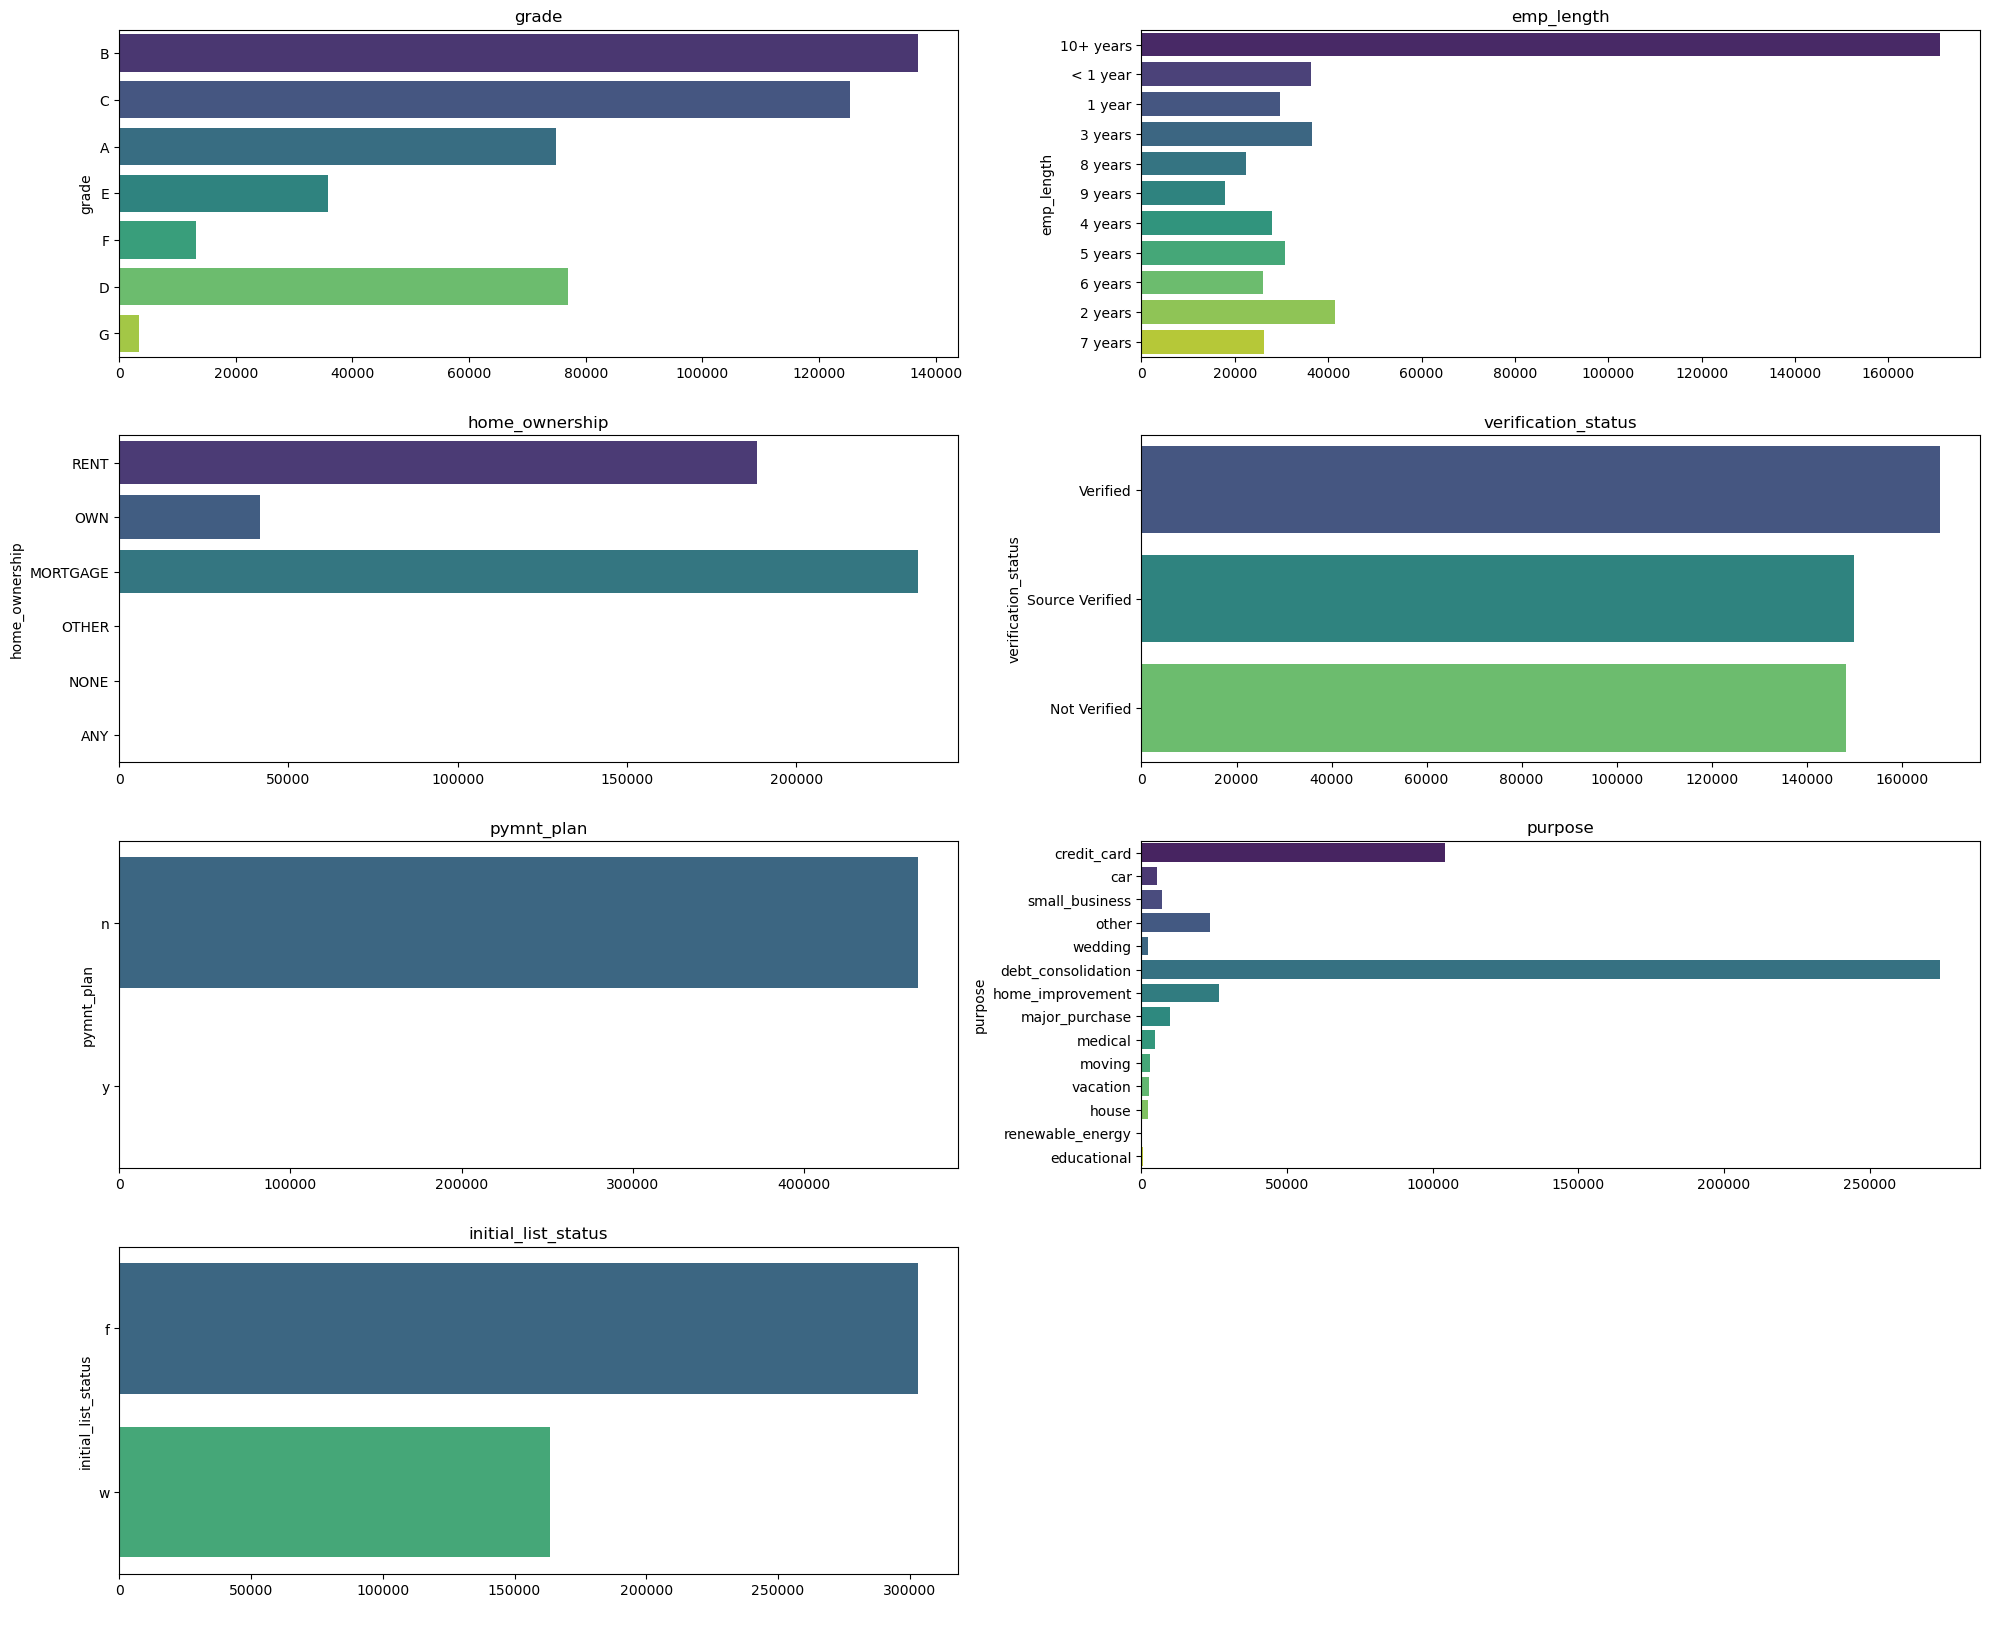

In [ ]:
plt.figure(figsize=(20,20))
for i in range(0,len(cat)):
    plt.subplot(5,2,i+1)
    sns.countplot(y=df_eda[cat[i]], orient = 'h',palette='viridis')
    plt.title(cat[i])
    plt.xlabel(' ')
    plt.tight_layout()

Some Insights obtained in the graph above:<br>
1. Feature `grade` is dominated by grade B
2. The `emp_length` feature is dominated by emp_length >10 years
3. The `home_ownership` feature is dominated by mortgage
4. The `verification` status feature is dominated by verified
5. The `purpose` feature is dominated by debt_consolidation
6. `initial_list_status` feature is dominated by f
<br>
* The `pymnt_plan` feature has a problem because the whole data only contains one unique value so decided to remove this feature

### Bivariate Analysis

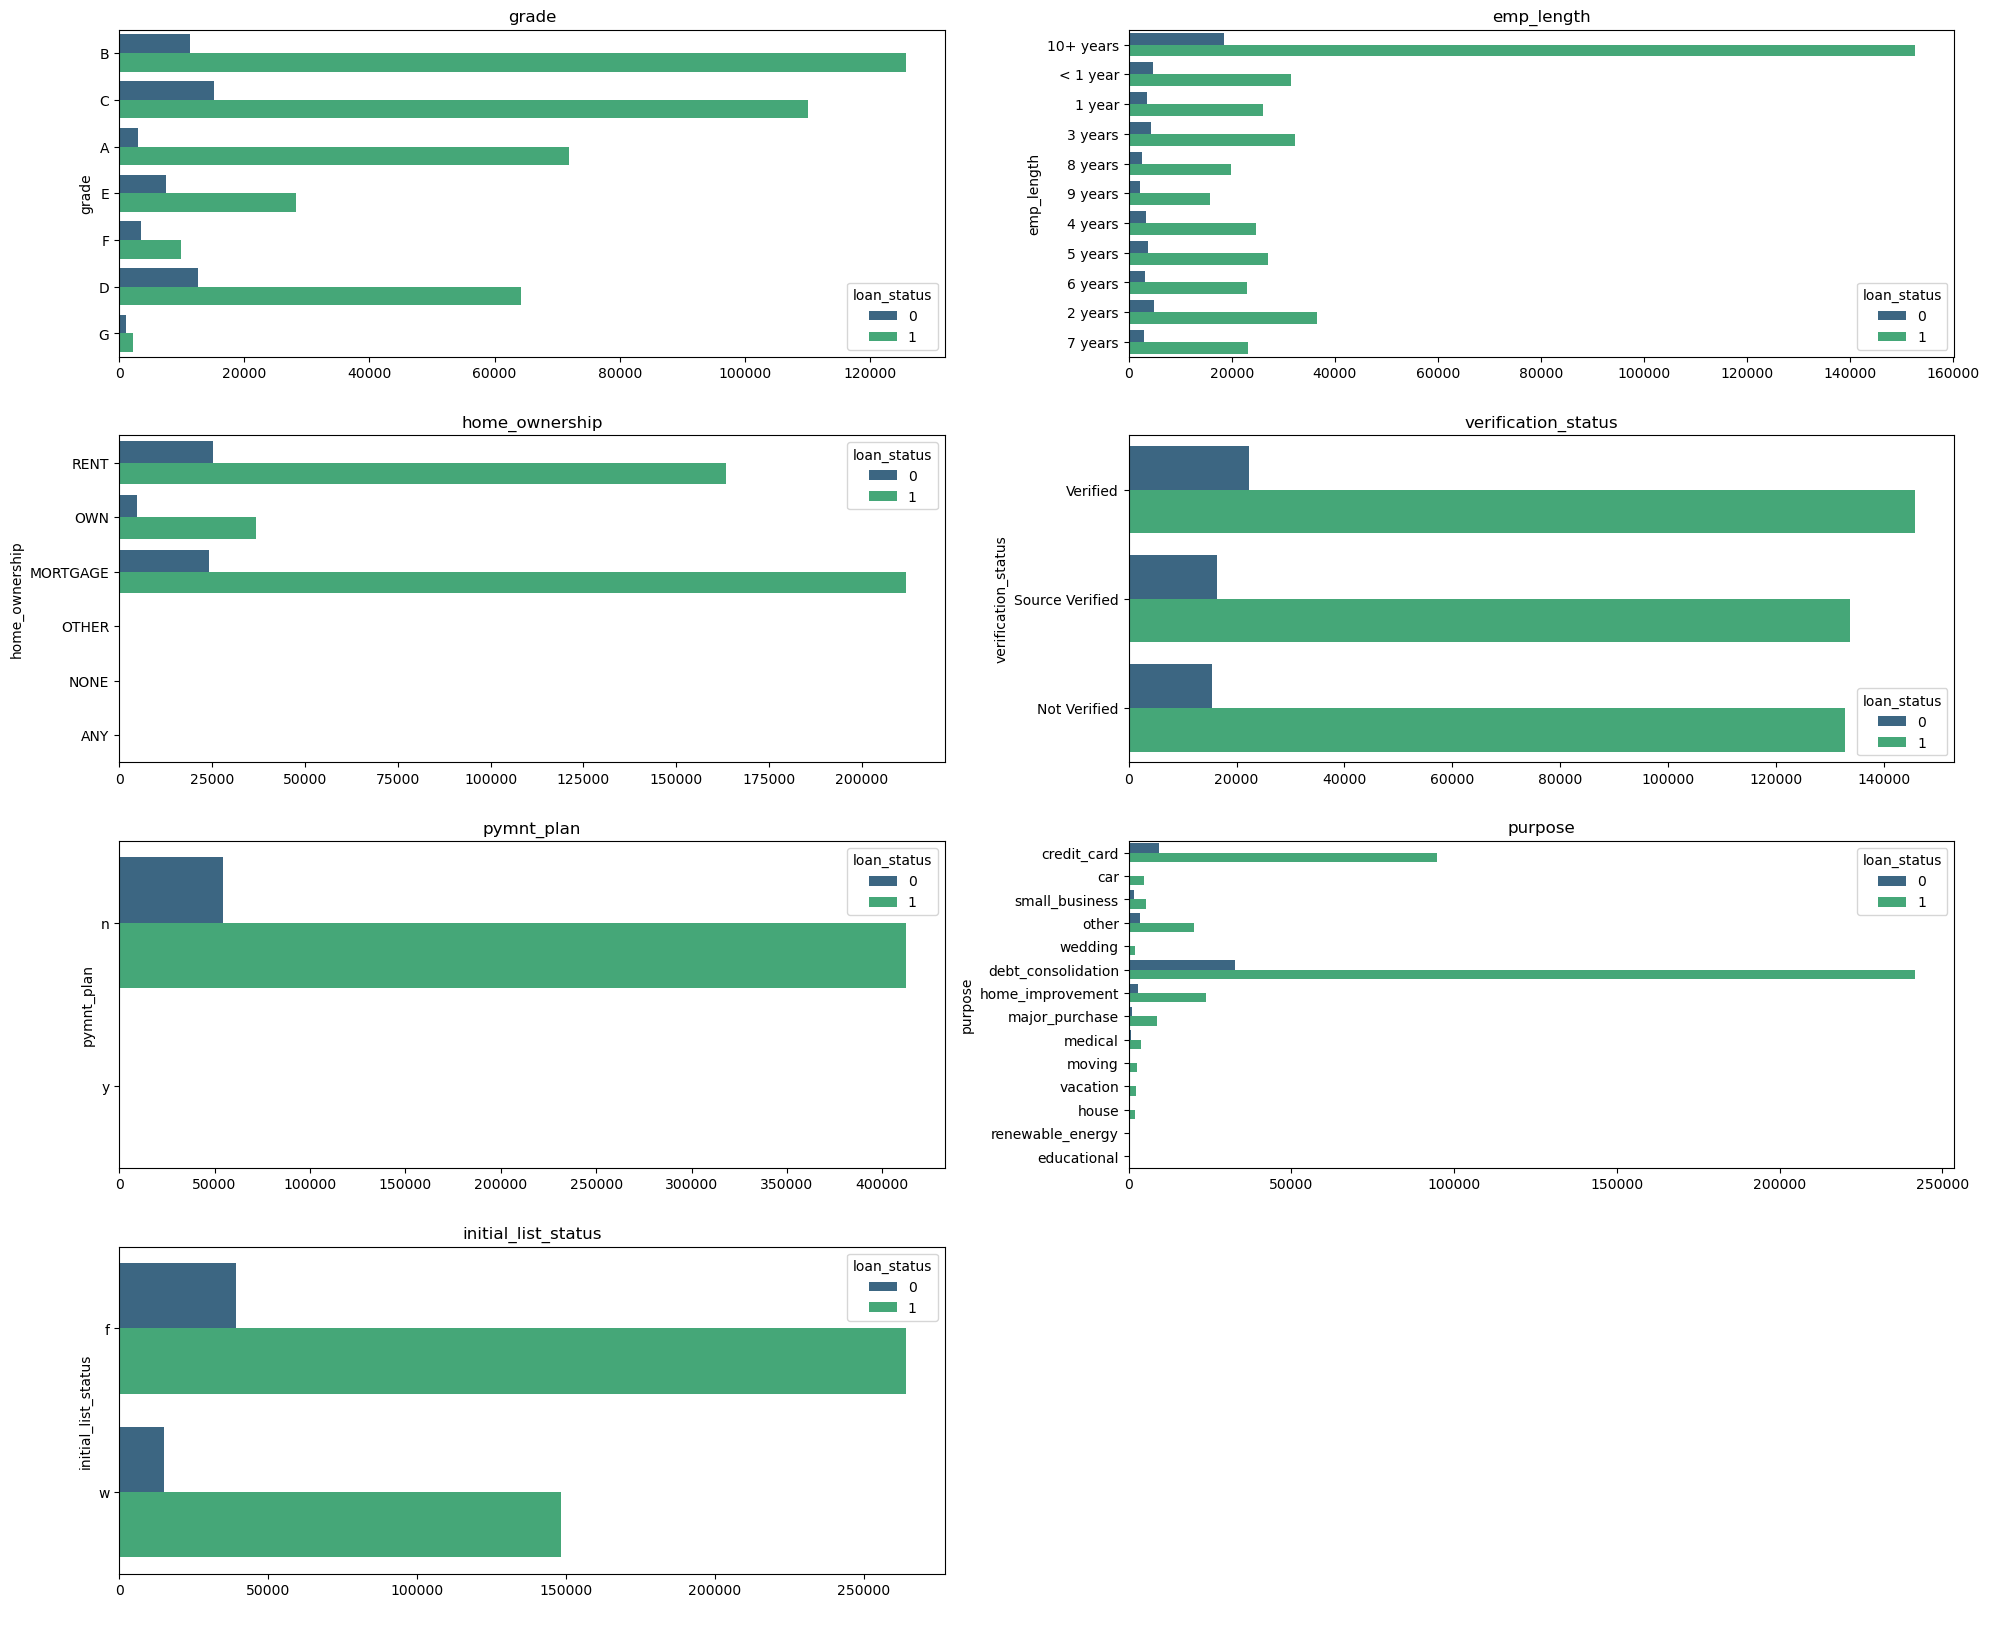

In [ ]:
plt.figure(figsize=(20,20))
for i in range(0,len(cat)):
    plt.subplot(5,2,i+1)
    sns.countplot(y=df_eda[cat[i]], palette='viridis', hue=df_eda['loan_status'])
    plt.title(cat[i])
    plt.xlabel(' ')
    plt.tight_layout()

In [ ]:
df_eda.drop(['pymnt_plan'], axis=1, inplace=True)

### Feature Engineering with Weight of Evidence and Information Value (IV)

In [ ]:
df_fe = df_eda.copy()

In [ ]:
# Create Function for Weight of Evidence and Invormation Value

def woe(df, feature_name):
    feature_name = df.groupby(feature_name).agg(num_observation=('loan_status','count'),good_loan_prob=('loan_status','mean')).reset_index()
    feature_name['grade_proportion'] = feature_name['num_observation']/feature_name['num_observation'].sum()
    feature_name['num_good_loan'] = feature_name['grade_proportion'] * feature_name['num_observation']
    feature_name['num_bad_loan'] = (1-feature_name['grade_proportion']) * feature_name['num_observation']
    feature_name['good_loan_prop'] = feature_name['num_good_loan'] / feature_name['num_good_loan'].sum()
    feature_name['bad_loan_prop'] = feature_name['num_bad_loan'] / feature_name['num_bad_loan'].sum()
    feature_name['weight_of_evidence'] = np.log(feature_name['good_loan_prop'] / feature_name['bad_loan_prop'])
    feature_name = feature_name.sort_values('weight_of_evidence').reset_index(drop=True)
    feature_name['information_value'] = (feature_name['good_loan_prop']-feature_name['bad_loan_prop']) * feature_name['weight_of_evidence']
    feature_name['information_value'] = feature_name['information_value'].sum()

    #Show
    feature_name = feature_name.drop(['grade_proportion','num_good_loan','num_bad_loan','good_loan_prop','bad_loan_prop'],axis = 1)
    return feature_name

In [ ]:
def dist(feature):
    plt.figure(figsize=(4,2))
    sns.violinplot(df_fe[feature],color='blue')
    print('number of unique values :',df_fe[feature].nunique())
    print('Distribution :')
    print(df_fe[feature].describe().T)

![Invormation Value.png](attachment:4ccf1301-2a2d-4571-900e-8134a81f6463.png)

* We will decide whether the feature will be used or will be remove or adjusted based on the information value rules above

### WOE Categoric Feature

#### WOE: `Grade`

In [ ]:
woe(df_fe,'grade')

grade  num_observation  good_loan_prob  weight_of_evidence  \
0     G             3322        0.679711           -3.660567   
1     F            13229        0.741401           -2.257091   
2     E            35757        0.789775           -1.211753   
3     A            74867        0.959328           -0.377550   
4     D            76888        0.835787           -0.345737   
5     C           125293        0.878493            0.275309   
6     B           136929        0.917643            0.398836   

   information_value  
0           0.292639  
1           0.292639  
2           0.292639  
3           0.292639  
4           0.292639  
5           0.292639  
6           0.292639

#### WOE: `emp_length`

In [ ]:
woe(df_fe,'emp_length')

emp_length  num_observation  good_loan_prob  weight_of_evidence  \
0     9 years            17888        0.881093           -1.682895   
1     8 years            22395        0.884349           -1.448086   
2     6 years            26112        0.876800           -1.286119   
3     7 years            26180        0.883613           -1.283364   
4     4 years            28023        0.882240           -1.211138   
5      1 year            29622        0.877017           -1.151991   
6     5 years            30774        0.878696           -1.111196   
7    < 1 year            36265        0.867944           -0.934325   
8     3 years            36596        0.882446           -0.924469   
9     2 years            41373        0.881251           -0.790600   
10  10+ years           171057        0.891773            0.992902   

    information_value  
0            1.030304  
1            1.030304  
2            1.030304  
3            1.030304  
4            1.030304  
5            1.030304  
6            1.030304  
7            1.030304  
8            1.030304  
9            1.030304  
10           1.030304

#### WOE: `home_ownership`

In [ ]:
woe(df_fe,'home_ownership')

home_ownership  num_observation  good_loan_prob  weight_of_evidence  \
0            ANY                1        1.000000          -12.759563   
1           NONE               50        0.760000           -8.847435   
2          OTHER              182        0.642857           -7.555168   
3            OWN            41704        0.885359           -2.027518   
4           RENT           188473        0.866501           -0.095002   
5       MORTGAGE           235875        0.897594            0.316429   

   information_value  
0            0.31222  
1            0.31222  
2            0.31222  
3            0.31222  
4            0.31222  
5            0.31222

#### WOE: `verification_status`

In [ ]:
woe(df_fe,'verification_status')

verification_status  num_observation  good_loan_prob  weight_of_evidence  \
0        Not Verified           148237        0.895262           -0.075220   
1     Source Verified           149993        0.891342           -0.057908   
2            Verified           168055        0.867008            0.114596   

   information_value  
0           0.007663  
1           0.007663  
2           0.007663

Low information value,`verification_status` will drop

#### WOE: `purpose`

In [ ]:
woe(df_fe,'purpose')

purpose  num_observation  good_loan_prob  weight_of_evidence  \
0     renewable_energy              351        0.840456           -6.796087   
1          educational              422        0.637441           -6.611715   
2                house             2269        0.843543           -4.925653   
3              wedding             2343        0.860009           -4.893401   
4             vacation             2487        0.872135           -4.833445   
5               moving             2994        0.834335           -4.646819   
6              medical             4602        0.856584           -4.213461   
7                  car             5397        0.900130           -4.052385   
8       small_business             7013        0.766862           -3.786951   
9       major_purchase             9828        0.891941           -3.443333   
10               other            23690        0.846264           -2.532676   
11    home_improvement            26537        0.893922           -2.412735   
12         credit_card           104157        0.909070           -0.851172   
13  debt_consolidation           274195        0.880946            0.750802   

    information_value  
0            1.409257  
1            1.409257  
2            1.409257  
3            1.409257  
4            1.409257  
5            1.409257  
6            1.409257  
7            1.409257  
8            1.409257  
9            1.409257  
10           1.409257  
11           1.409257  
12           1.409257  
13           1.409257

#### WOE: `initial_list_status`

In [ ]:
woe(df_fe,'initial_list_status')

initial_list_status  num_observation  good_loan_prob  weight_of_evidence  \
0                   w           163280        0.907741           -0.798355   
1                   f           303005        0.870926            0.438211   

   information_value  
0           0.340013  
1           0.340013

#### WOE: `term`

In [ ]:
woe(df_fe,'term')

term  num_observation  good_loan_prob  weight_of_evidence  \
0    60           128332        0.853458           -1.378129   
1    36           337953        0.895346            0.558444   

   information_value  
0            0.72423  
1            0.72423

### WOE Numeric Feature

#### WOE: `loan_amnt`

number of unique values : 1352
Distribution :
count    466285.000000
mean      14317.277577
std        8286.509164
min         500.000000
25%        8000.000000
50%       12000.000000
75%       20000.000000
max       35000.000000
Name: loan_amnt, dtype: float64


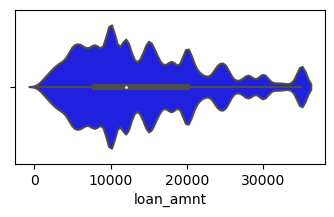

In [ ]:
dist('loan_amnt')

In [ ]:
df_fe['loan_amnt_woe'] = pd.cut(df_fe['loan_amnt'],10)
woe(df_fe,'loan_amnt_woe')

loan_amnt_woe  num_observation  good_loan_prob  weight_of_evidence  \
0  (28100.0, 31550.0]            13389        0.871088           -1.618217   
1  (31550.0, 35000.0]            21517        0.878840           -1.125698   
2  (21200.0, 24650.0]            25467        0.882789           -0.948237   
3  (24650.0, 28100.0]            26705        0.882232           -0.897957   
4     (465.5, 3950.0]            27901        0.877280           -0.851421   
5  (17750.0, 21200.0]            58167        0.884264           -0.045227   
6  (14300.0, 17750.0]            60751        0.882685            0.004590   
7  (10850.0, 14300.0]            65080        0.889505            0.084156   
8    (3950.0, 7400.0]            75702        0.886608            0.262176   
9   (7400.0, 10850.0]            91606        0.883708            0.494439   

   information_value  
0           0.249994  
1           0.249994  
2           0.249994  
3           0.249994  
4           0.249994  
5           0.249994  
6           0.249994  
7           0.249994  
8           0.249994  
9           0.249994

#### WOE: `int_rate`

number of unique values : 506
Distribution :
count    466285.000000
mean         13.829236
std           4.357587
min           5.420000
25%          10.990000
50%          13.660000
75%          16.490000
max          26.060000
Name: int_rate, dtype: float64


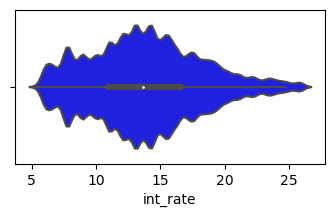

In [ ]:
dist('int_rate')

In [ ]:
df_fe['int_rate_woe'] = pd.cut(df_fe['int_rate'],10)
woe(df_fe,'int_rate_woe')

int_rate_woe  num_observation  good_loan_prob  weight_of_evidence  \
0   (23.996, 26.06]             8846        0.758761           -2.104911   
1  (21.932, 23.996]            14343        0.763787           -1.609524   
2  (19.868, 21.932]            19782        0.797341           -1.275906   
3    (5.399, 7.484]            27568        0.973919           -0.926431   
4  (17.804, 19.868]            38003        0.815436           -0.581349   
5    (7.484, 9.548]            56410        0.952987           -0.142438   
6   (9.548, 11.612]            58827        0.922298           -0.094569   
7   (15.74, 17.804]            60358        0.839259           -0.065112   
8   (13.676, 15.74]            87615        0.875478            0.377055   
9  (11.612, 13.676]            94533        0.904002            0.471490   

   information_value  
0           0.273615  
1           0.273615  
2           0.273615  
3           0.273615  
4           0.273615  
5           0.273615  
6           0.273615  
7           0.273615  
8           0.273615  
9           0.273615

#### WOE: `annual_inc`

number of unique values : 31901
Distribution :
count    4.662850e+05
mean     7.327729e+04
std      5.496334e+04
min      1.896000e+03
25%      4.500000e+04
50%      6.300000e+04
75%      8.895300e+04
max      7.500000e+06
Name: annual_inc, dtype: float64


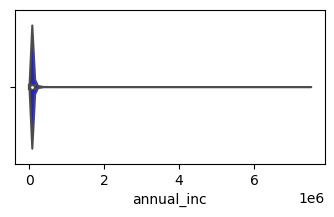

In [ ]:
dist('annual_inc')

In [ ]:
df_fe['annual_inc_fc'] = np.where((df_fe['annual_inc']>=0)&(df_fe['annual_inc']<=200000),'low_income',
                               np.where((df_fe['annual_inc']>200000)&(df_fe['annual_inc']<=1500000),'med_income','high_income'))
woe(df_fe,'annual_inc_fc')

annual_inc_fc  num_observation  good_loan_prob  weight_of_evidence  \
0   high_income               19        1.000000          -13.488976   
1    med_income             7781        0.919548           -7.457187   
2    low_income           458485        0.883207            0.692901   

   information_value  
0           4.080337  
1           4.080337  
2           4.080337

* Information value`annual_inc_woe` to high, We will drop

#### WOE: `dti`

number of unique values : 3997
Distribution :
count    466285.000000
mean         17.218758
std           7.851121
min           0.000000
25%          11.360000
50%          16.870000
75%          22.780000
max          39.990000
Name: dti, dtype: float64


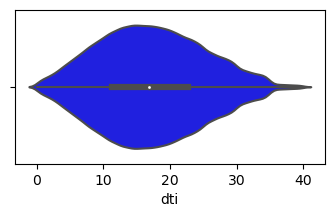

In [ ]:
dist('dti')

In [ ]:
df_fe['dti_woe'] = pd.cut(df_fe['dti'],10)
woe(df_fe,'dti_woe')

dti_woe  num_observation  good_loan_prob  weight_of_evidence  \
0   (35.991, 39.99]             2753        0.875772           -3.292330   
1  (31.992, 35.991]            13654        0.862604           -1.667191   
2    (-0.04, 3.999]            16728        0.891619           -1.457325   
3  (27.993, 31.992]            30288        0.861826           -0.833030   
4    (3.999, 7.998]            42962        0.905544           -0.453966   
5  (23.994, 27.993]            50073        0.865037           -0.283859   
6   (7.998, 11.997]            69311        0.900853            0.088587   
7  (19.995, 23.994]            71058        0.869726            0.117890   
8  (15.996, 19.995]            84089        0.881435            0.319796   
9  (11.997, 15.996]            85369        0.894072            0.338258   

   information_value  
0           0.215744  
1           0.215744  
2           0.215744  
3           0.215744  
4           0.215744  
5           0.215744  
6           0.215744  
7           0.215744  
8           0.215744  
9           0.215744

#### WOE: `delinq_2yrs`

number of unique values : 24
Distribution :
count    466285.000000
mean          0.284661
std           0.797343
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          29.000000
Name: delinq_2yrs, dtype: float64


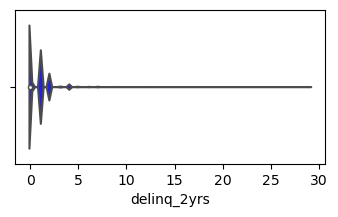

In [ ]:
dist('delinq_2yrs')

In [ ]:
df_fe['delinq_2yrs_woe'] = pd.cut(df_fe['delinq_2yrs'],10)
woe(df_fe,'delinq_2yrs_woe')

delinq_2yrs_woe  num_observation  good_loan_prob  weight_of_evidence  \
0    (23.2, 26.1]                1        1.000000          -16.101818   
1    (26.1, 29.0]                1        1.000000          -16.101818   
2    (20.3, 23.2]                4        0.750000          -14.715518   
3    (17.4, 20.3]                9        0.888889          -13.904577   
4    (14.5, 17.4]               15        0.866667          -13.393738   
5    (11.6, 14.5]               71        0.746479          -11.838988   
6     (8.7, 11.6]              217        0.884793          -10.721458   
7      (5.8, 8.7]             1152        0.879340           -9.050092   
8      (2.9, 5.8]             9298        0.881157           -6.944124   
9   (-0.029, 2.9]           455517        0.883906            0.695586   

   information_value  
0           4.007423  
1           4.007423  
2           4.007423  
3           4.007423  
4           4.007423  
5           4.007423  
6           4.007423  
7           4.007423  
8           4.007423  
9           4.007423

* Information value `delinq_2yrs_woe` to high,we will drop

#### WOE: `inq_last_6mths`

number of unique values : 28
Distribution :
count    466285.000000
mean          0.804695
std           1.091583
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          33.000000
Name: inq_last_6mths, dtype: float64


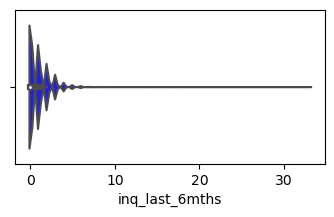

In [ ]:
dist('inq_last_6mths')

In [ ]:
df_fe['inq_last_6mths_woe'] = pd.cut(df_fe['inq_last_6mths'],10)
woe(df_fe,'inq_last_6mths_woe')

inq_last_6mths_woe  num_observation  good_loan_prob  weight_of_evidence  \
0       (19.8, 23.1]                1        0.000000          -16.022424   
1       (26.4, 29.7]                2        0.000000          -15.329275   
2       (23.1, 26.4]                3        0.000000          -14.923808   
3       (29.7, 33.0]                3        0.000000          -14.923808   
4       (16.5, 19.8]                8        0.000000          -13.942968   
5       (13.2, 16.5]               18        0.000000          -13.132016   
6        (9.9, 13.2]               60        0.000000          -11.927953   
7         (6.6, 9.9]              367        0.147139          -10.116277   
8         (3.3, 6.6]            11197        0.737162           -6.674719   
9      (-0.033, 3.3]           454626        0.888209            0.693523   

   information_value  
0           3.763579  
1           3.763579  
2           3.763579  
3           3.763579  
4           3.763579  
5           3.763579  
6           3.763579  
7           3.763579  
8           3.763579  
9           3.763579

* Information value `inq_last_6mths_woe` to high,we will drop

#### WOE: `open_acc`

number of unique values : 62
Distribution :
count    466285.000000
mean         11.186995
std           4.987380
min           0.000000
25%           8.000000
50%          10.000000
75%          14.000000
max          84.000000
Name: open_acc, dtype: float64


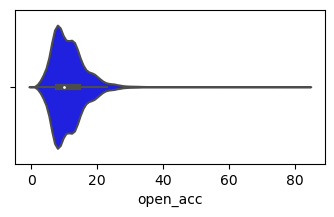

In [ ]:
dist('open_acc')

In [ ]:
df_fe['open_acc_woe'] = pd.cut(df_fe['open_acc'],10)
woe(df_fe,'open_acc_woe')

open_acc_woe  num_observation  good_loan_prob  weight_of_evidence  \
0   (67.2, 75.6]                1        1.000000          -12.699435   
1   (58.8, 67.2]                2        1.000000          -12.006286   
2   (75.6, 84.0]                3        0.333333          -11.600819   
3   (50.4, 58.8]               20        1.000000           -9.703662   
4   (42.0, 50.4]               81        0.901235           -8.304815   
5   (33.6, 42.0]              817        0.884945           -5.992045   
6   (25.2, 33.6]             5131        0.890275           -4.145317   
7   (16.8, 25.2]            56491        0.886601           -1.628458   
8  (-0.084, 8.4]           151903        0.881701           -0.374252   
9    (8.4, 16.8]           251836        0.884326            0.513821   

   information_value  
0           0.523715  
1           0.523715  
2           0.523715  
3           0.523715  
4           0.523715  
5           0.523715  
6           0.523715  
7           0.523715  
8           0.523715  
9           0.523715

#### WOE: `pub_rec`

number of unique values : 26
Distribution :
count    466285.000000
mean          0.160554
std           0.510848
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          63.000000
Name: pub_rec, dtype: float64


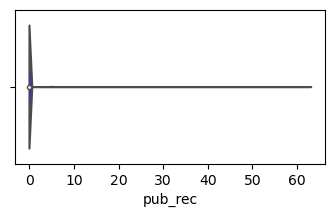

In [ ]:
dist('pub_rec')

In [ ]:
df_fe['pub_rec_woe'] = pd.cut(df_fe['pub_rec'],10)
woe(df_fe,'pub_rec_woe')

pub_rec_woe  num_observation  good_loan_prob  weight_of_evidence  \
0   (31.5, 37.8]                1        1.000000          -20.434881   
1   (37.8, 44.1]                1        1.000000          -20.434881   
2   (44.1, 50.4]                1        1.000000          -20.434881   
3   (50.4, 56.7]                1        1.000000          -20.434881   
4   (56.7, 63.0]                1        1.000000          -20.434881   
5   (18.9, 25.2]                2        1.000000          -19.741731   
6   (12.6, 18.9]                8        1.000000          -18.355424   
7    (6.3, 12.6]              130        0.930769          -15.567070   
8  (-0.063, 6.3]           466140        0.883801            0.693177   
9   (25.2, 31.5]                0             NaN                 NaN   

   information_value  
0           8.320056  
1           8.320056  
2           8.320056  
3           8.320056  
4           8.320056  
5           8.320056  
6           8.320056  
7           8.320056  
8           8.320056  
9           8.320056

* Information value `pub_rec_woe` to high,we will drop

#### WOE: `revol_bal`

number of unique values : 58142
Distribution :
count    4.662850e+05
mean     1.623020e+04
std      2.067625e+04
min      0.000000e+00
25%      6.413000e+03
50%      1.176400e+04
75%      2.033300e+04
max      2.568995e+06
Name: revol_bal, dtype: float64


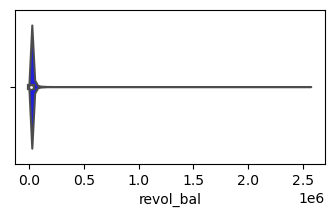

In [ ]:
dist('revol_bal')

In [ ]:
df_fe['revol_bal_fc'] = np.where((df_fe['revol_bal']>=0)&(df_fe['revol_bal']<=5000),0,
                               np.where((df_fe['revol_bal']>5000)&(df_fe['revol_bal']<=10000),1,
                               np.where((df_fe['revol_bal']>10000)&(df_fe['revol_bal']<=15000),2,3)))
woe(df_fe,'revol_bal_fc')

revol_bal_fc  num_observation  good_loan_prob  weight_of_evidence  \
0             0            82590        0.875239           -0.576520   
1             2            88805        0.882011           -0.487635   
2             1           115537        0.880480           -0.151038   
3             3           179353        0.890813            0.489550   

   information_value  
0           0.197731  
1           0.197731  
2           0.197731  
3           0.197731

#### WOE: `revol_util`

number of unique values : 1269
Distribution :
count    466285.000000
mean         56.177985
std          23.724005
min           0.000000
25%          39.200000
50%          57.600000
75%          74.700000
max         892.300000
Name: revol_util, dtype: float64


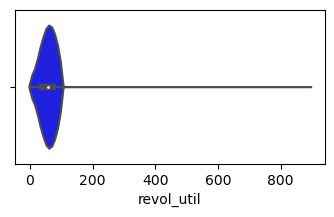

In [ ]:
dist('revol_util')

In [ ]:
df_fe['revol_util_fc'] = np.where((df_fe['revol_util']>=0)&(df_fe['revol_util']<=20),0,
                                  np.where((df_fe['revol_util']>20)&(df_fe['revol_util']<=40),1,
                                           np.where((df_fe['revol_util']>40)&(df_fe['revol_util']<=60),2,
                                                    np.where((df_fe['revol_util']>60)&(df_fe['revol_util']<=80),3,4))))
woe(df_fe,'revol_util_fc')

revol_util_fc  num_observation  good_loan_prob  weight_of_evidence  \
0              0            37402        0.907438           -1.220141   
1              1            83492        0.901679           -0.303424   
2              4            84062        0.859449           -0.295130   
3              2           129737        0.889114            0.266088   
4              3           131592        0.876117            0.285812   

   information_value  
0           0.157668  
1           0.157668  
2           0.157668  
3           0.157668  
4           0.157668

#### WOE: `total_acc`

number of unique values : 112
Distribution :
count    466285.000000
mean         25.064302
std          11.599792
min           1.000000
25%          17.000000
50%          23.000000
75%          32.000000
max         156.000000
Name: total_acc, dtype: float64


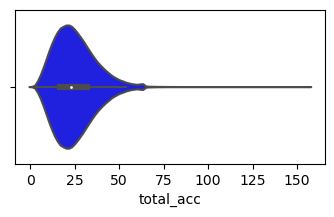

In [ ]:
dist('total_acc')

In [ ]:
df_fe['total_acc_woe'] = pd.cut(df_fe['total_acc'],7)
woe(df_fe,'total_acc_woe')

total_acc_woe  num_observation  good_loan_prob  weight_of_evidence  \
0    (133.857, 156.0]                2        1.000000          -12.156646   
1  (111.714, 133.857]                6        1.000000          -11.058025   
2   (89.571, 111.714]               53        0.905660           -8.879392   
3    (67.429, 89.571]              701        0.901569           -6.295785   
4    (45.286, 67.429]            25756        0.889929           -2.636554   
5    (23.143, 45.286]           206351        0.891011           -0.028094   
6     (0.845, 23.143]           233416        0.876722            0.205101   

   information_value  
0           0.272906  
1           0.272906  
2           0.272906  
3           0.272906  
4           0.272906  
5           0.272906  
6           0.272906

#### WOE: `out_prncp`

number of unique values : 135665
Distribution :
count    466285.000000
mean       4410.062342
std        6355.078769
min           0.000000
25%           0.000000
50%         441.470000
75%        7341.650000
max       32160.380000
Name: out_prncp, dtype: float64


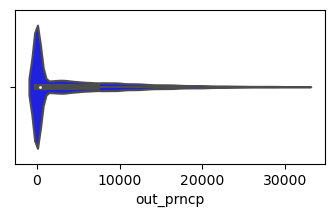

In [ ]:
dist('out_prncp')

In [ ]:
df_fe['out_prncp_woe'] = pd.cut(df_fe['out_prncp'],10)
woe(df_fe,'out_prncp_woe')

out_prncp_woe  num_observation  good_loan_prob  \
0   (28944.342, 32160.38]             1069        0.882133   
1  (25728.304, 28944.342]             3501        0.948872   
2  (22512.266, 25728.304]             5698        0.949456   
3  (19296.228, 22512.266]             9548        0.950670   
4   (16080.19, 19296.228]            14389        0.954618   
5   (12864.152, 16080.19]            20961        0.957206   
6   (9648.114, 12864.152]            32345        0.957397   
7    (6432.076, 9648.114]            40780        0.962359   
8    (3216.038, 6432.076]            53837        0.963482   
9      (-32.16, 3216.038]           284157        0.835721   

   weight_of_evidence  information_value  
0           -5.673524           1.693731  
1           -4.481957           1.693731  
2           -3.990132           1.693731  
3           -3.465522           1.693731  
4           -3.044734           1.693731  
5           -2.653884           1.693731  
6           -2.194192           1.693731  
7           -1.942830           1.693731  
8           -1.633895           1.693731  
9            0.847072           1.693731

* Information value `out_prncp` to high,we will drop

#### WOE: `total_pymnt`

number of unique values : 351609
Distribution :
count    466285.000000
mean      11540.686220
std        8265.627112
min           0.000000
25%        5552.125349
50%        9419.250943
75%       15308.158460
max       57777.579870
Name: total_pymnt, dtype: float64


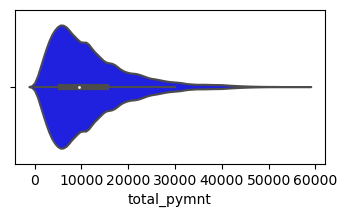

In [ ]:
dist('total_pymnt')

In [ ]:
df_fe['total_pymnt_woe'] = pd.cut(df_fe['total_pymnt'],10)
woe(df_fe,'total_pymnt_woe')

total_pymnt_woe  num_observation  good_loan_prob  \
0   (51999.822, 57777.58]               84        1.000000   
1  (46222.064, 51999.822]              654        0.996942   
2  (40444.306, 46222.064]             3176        0.990554   
3  (34666.548, 40444.306]             6668        0.983353   
4   (28888.79, 34666.548]            11215        0.973963   
5   (23111.032, 28888.79]            23277        0.965288   
6  (17333.274, 23111.032]            45849        0.952845   
7  (11555.516, 17333.274]            90733        0.932439   
8     (-57.778, 5777.758]           124655        0.775420   
9   (5777.758, 11555.516]           159974        0.895958   

   weight_of_evidence  information_value  
0           -7.469040           0.462987  
1           -5.415527           0.462987  
2           -3.829825           0.462987  
3           -3.080559           0.462987  
4           -2.550684           0.462987  
5           -1.793607           0.462987  
6           -1.063424           0.462987  
7           -0.267961           0.462987  
8            0.144337           0.462987  
9            0.502925           0.462987

#### WOE: `total_rec_int`

number of unique values : 270249
Distribution :
count    466285.000000
mean       2588.677225
std        2483.809661
min           0.000000
25%         957.280000
50%        1818.880000
75%        3304.530000
max       24205.620000
Name: total_rec_int, dtype: float64


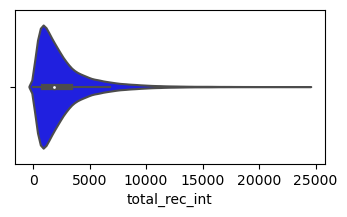

In [ ]:
dist('total_rec_int')

In [ ]:
df_fe['total_rec_int_woe'] = pd.cut(df_fe['total_rec_int'],10)
woe(df_fe,'total_rec_int_woe')

total_rec_int_woe  num_observation  good_loan_prob  \
0   (21785.058, 24205.62]               32        0.937500   
1  (19364.496, 21785.058]              173        0.901734   
2  (16943.934, 19364.496]              546        0.906593   
3  (14523.372, 16943.934]             1341        0.912006   
4   (12102.81, 14523.372]             2584        0.894737   
5    (9682.248, 12102.81]             6371        0.901585   
6    (7261.686, 9682.248]            15594        0.894703   
7    (4841.124, 7261.686]            37363        0.891658   
8    (2420.562, 4841.124]           110226        0.892494   
9     (-24.206, 2420.562]           292055        0.878287   

   weight_of_evidence  information_value  
0           -9.410109           1.163761  
1           -7.722251           1.163761  
2           -6.572123           1.163761  
3           -5.671862           1.163761  
4           -5.013262           1.163761  
5           -4.102644           1.163761  
6           -3.187257           1.163761  
7           -2.263955           1.163761  
8           -0.995925           1.163761  
9            0.693205           1.163761

* Information value `total_rec_int` to high,we will drop

#### WOE: `total_rec_late_fee`

number of unique values : 5808
Distribution :
count    466285.000000
mean          0.650129
std           5.265730
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         358.680000
Name: total_rec_late_fee, dtype: float64


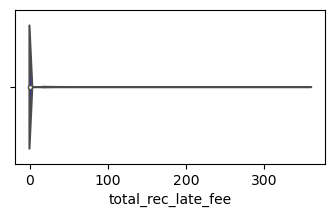

In [ ]:
dist('total_rec_late_fee')

In [ ]:
df_fe['total_rec_late_fee_woe'] = pd.cut(df_fe['total_rec_late_fee'],10)
woe(df_fe,'total_rec_late_fee_woe')

total_rec_late_fee_woe  num_observation  good_loan_prob  weight_of_evidence  \
0     (286.944, 322.812]                1        0.000000          -17.664310   
1      (322.812, 358.68]                1        0.000000          -17.664310   
2     (215.208, 251.076]                2        0.500000          -16.971161   
3     (251.076, 286.944]                3        0.666667          -16.565693   
4      (179.34, 215.208]                8        0.375000          -15.584853   
5      (143.472, 179.34]               19        0.421053          -14.719832   
6     (107.604, 143.472]               85        0.435294          -13.221479   
7      (71.736, 107.604]              279        0.433692          -12.032502   
8       (35.868, 71.736]             1905        0.447244          -10.107981   
9       (-0.359, 35.868]           463982        0.885998            0.693873   

   information_value  
0           5.618606  
1           5.618606  
2           5.618606  
3           5.618606  
4           5.618606  
5           5.618606  
6           5.618606  
7           5.618606  
8           5.618606  
9           5.618606

* Information value `total_rec_late_fee` to high,we will drop

#### WOE: `recoveries`

number of unique values : 22773
Distribution :
count    466285.000000
mean         85.344211
std         552.216084
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       33520.270000
Name: recoveries, dtype: float64


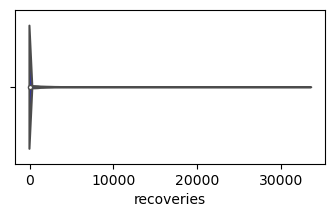

In [ ]:
dist('recoveries')

In [ ]:
df_fe['recoveries_woe'] = pd.cut(df_fe['recoveries'],10)
woe(df_fe,'recoveries_woe')

recoveries_woe  num_observation  good_loan_prob  \
0   (30168.243, 33520.27]                2        0.000000   
1  (23464.189, 26816.216]                3        0.000000   
2  (26816.216, 30168.243]                3        0.000000   
3  (20112.162, 23464.189]               10        0.000000   
4  (16760.135, 20112.162]               13        0.000000   
5  (13408.108, 16760.135]               32        0.000000   
6  (10056.081, 13408.108]               74        0.000000   
7   (6704.054, 10056.081]              241        0.000000   
8    (3352.027, 6704.054]             2664        0.000000   
9      (-33.52, 3352.027]           463243        0.889622   

   weight_of_evidence  information_value  
0          -16.691282           5.288953  
1          -16.285814           5.288953  
2          -16.285814           5.288953  
3          -15.081827           5.288953  
4          -14.819456           5.288953  
5          -13.918629           5.288953  
6          -13.080209           5.288953  
7          -11.899119           5.288953  
8           -9.491119           5.288953  
9            0.693856           5.288953

* Information value `recoveries` to high,we will drop

#### WOE: `last_pymnt_amnt`

number of unique values : 198194
Distribution :
count    466285.000000
mean       3123.913796
std        5554.737393
min           0.000000
25%         312.620000
50%         545.960000
75%        3187.510000
max       36234.440000
Name: last_pymnt_amnt, dtype: float64


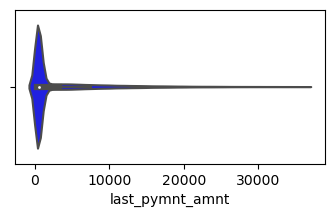

In [ ]:
dist('last_pymnt_amnt')

In [ ]:
df_fe['last_pymnt_amnt_fc'] = np.where((df_fe['last_pymnt_amnt']>=0)&(df_fe['last_pymnt_amnt']<=500),0,
                               np.where((df_fe['last_pymnt_amnt']>500)&(df_fe['last_pymnt_amnt']<=1000),1,
                               np.where((df_fe['last_pymnt_amnt']>1000)&(df_fe['last_pymnt_amnt']<=1500),2,
                                        np.where((df_fe['last_pymnt_amnt']>1500)&(df_fe['last_pymnt_amnt']<=3500),3,4))))
woe(df_fe,'last_pymnt_amnt_fc')

last_pymnt_amnt_fc  num_observation  good_loan_prob  weight_of_evidence  \
0                   2            14979        0.871821           -2.659133   
1                   3            23745        0.974395           -2.178796   
2                   1            98694        0.843476           -0.568584   
3                   4           112856        0.995383           -0.395207   
4                   0           216011        0.834837            0.599136   

   information_value  
0           0.526734  
1           0.526734  
2           0.526734  
3           0.526734  
4           0.526734

#### WOE: `collections_12_mths_ex_med`

number of unique values : 9
Distribution :
count    466285.000000
mean          0.009082
std           0.108632
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          20.000000
Name: collections_12_mths_ex_med, dtype: float64


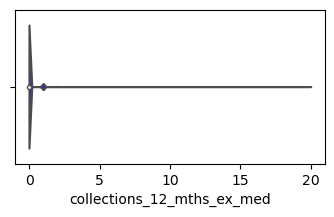

In [ ]:
dist('collections_12_mths_ex_med')

In [ ]:
df_fe['collections_12_mths_ex_med_woe'] = pd.cut(df_fe['collections_12_mths_ex_med'],10)
woe(df_fe,'collections_12_mths_ex_med_woe')

collections_12_mths_ex_med_woe  num_observation  good_loan_prob  \
0                   (14.0, 16.0]                1        1.000000   
1                   (18.0, 20.0]                1        1.000000   
2                     (4.0, 6.0]                2        1.000000   
3                     (2.0, 4.0]               26        0.884615   
4                   (-0.02, 2.0]           466255        0.883817   
5                     (6.0, 8.0]                0             NaN   
6                    (8.0, 10.0]                0             NaN   
7                   (10.0, 12.0]                0             NaN   
8                   (12.0, 14.0]                0             NaN   
9                   (16.0, 18.0]                0             NaN   

   weight_of_evidence  information_value  
0          -22.010686           9.917036  
1          -22.010686           9.917036  
2          -21.317536           9.917036  
3          -18.752536           9.917036  
4            0.693155           9.917036  
5                 NaN           9.917036  
6                 NaN           9.917036  
7                 NaN           9.917036  
8                 NaN           9.917036  
9                 NaN           9.917036

* Information value `collections_12_mths_ex_med` to high,we will drop

#### WOE: `acc_now_delinq`

number of unique values : 6
Distribution :
count    466285.000000
mean          0.004002
std           0.068635
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           5.000000
Name: acc_now_delinq, dtype: float64


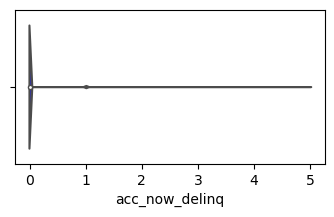

In [ ]:
dist('acc_now_delinq')

In [ ]:
df_fe['acc_now_delinq_woe'] = pd.cut(df_fe['acc_now_delinq'],10)
woe(df_fe,'acc_now_delinq_woe')

acc_now_delinq_woe  num_observation  good_loan_prob  weight_of_evidence  \
0         (4.5, 5.0]                2        0.500000          -17.257843   
1         (3.5, 4.0]                4        1.000000          -16.564691   
2         (2.5, 3.0]               11        0.818182          -15.553075   
3         (1.5, 2.0]               92        0.902174          -13.429008   
4         (0.5, 1.0]             1623        0.887246          -10.555476   
5      (-0.005, 0.5]           464553        0.883804            0.693357   
6         (1.0, 1.5]                0             NaN                 NaN   
7         (2.0, 2.5]                0             NaN                 NaN   
8         (3.0, 3.5]                0             NaN                 NaN   
9         (4.0, 4.5]                0             NaN                 NaN   

   information_value  
0           5.728868  
1           5.728868  
2           5.728868  
3           5.728868  
4           5.728868  
5           5.728868  
6           5.728868  
7           5.728868  
8           5.728868  
9           5.728868

* Information value `acc_now_delinq` to high,we will drop

#### WOE: `tot_coll_amt`

number of unique values : 6321
Distribution :
count    4.662850e+05
mean     1.629893e+02
std      1.348289e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.152545e+06
Name: tot_coll_amt, dtype: float64


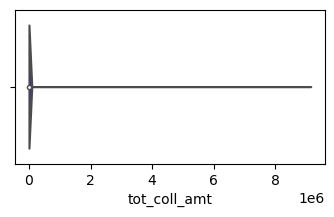

In [ ]:
dist('tot_coll_amt')

In [ ]:
df_fe['tot_coll_amt_woe'] = pd.cut(df_fe['tot_coll_amt'],10)
woe(df_fe,'tot_coll_amt_woe')

tot_coll_amt_woe  num_observation  good_loan_prob  \
0  (8237290.5, 9152545.0]                1        1.000000   
1   (-9152.545, 915254.5]           466284        0.883818   
2   (915254.5, 1830509.0]                0             NaN   
3  (1830509.0, 2745763.5]                0             NaN   
4  (2745763.5, 3661018.0]                0             NaN   
5  (3661018.0, 4576272.5]                0             NaN   
6  (4576272.5, 5491527.0]                0             NaN   
7  (5491527.0, 6406781.5]                0             NaN   
8  (6406781.5, 7322036.0]                0             NaN   
9  (7322036.0, 8237290.5]                0             NaN   

   weight_of_evidence  information_value  
0          -25.411953           13.05255  
1            0.693147           13.05255  
2                 NaN           13.05255  
3                 NaN           13.05255  
4                 NaN           13.05255  
5                 NaN           13.05255  
6                 NaN           13.05255  
7                 NaN           13.05255  
8                 NaN           13.05255  
9                 NaN           13.05255

* Information value `tot_coll_amt` to high,we will drop

#### WOE: `tot_cur_bal`

number of unique values : 220690
Distribution :
count    4.662850e+05
mean     1.178823e+05
std      1.487196e+05
min      0.000000e+00
25%      1.546700e+04
50%      5.247900e+04
75%      1.849300e+05
max      8.000078e+06
Name: tot_cur_bal, dtype: float64


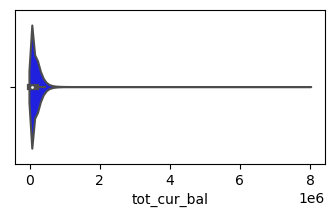

In [ ]:
dist('tot_cur_bal')

In [ ]:
df_fe['tot_cur_bal_woe'] = pd.cut(df_fe['tot_cur_bal'],10)
woe(df_fe,'tot_cur_bal_woe')

tot_cur_bal_woe  num_observation  good_loan_prob  \
0  (7200070.2, 8000078.0]                1        1.000000   
1  (4000039.0, 4800046.8]                2        1.000000   
2  (3200031.2, 4000039.0]                9        0.888889   
3  (2400023.4, 3200031.2]               15        1.000000   
4  (1600015.6, 2400023.4]               93        0.924731   
5   (800007.8, 1600015.6]             1581        0.945604   
6   (-8000.078, 800007.8]           464584        0.883595   
7  (4800046.8, 5600054.6]                0             NaN   
8  (5600054.6, 6400062.4]                0             NaN   
9  (6400062.4, 7200070.2]                0             NaN   

   weight_of_evidence  information_value  
0          -17.969097           5.766128  
1          -17.275948           5.766128  
2          -15.771855           5.766128  
3          -15.261017           5.766128  
4          -13.436300           5.766128  
5          -10.599890           5.766128  
6            0.693379           5.766128  
7                 NaN           5.766128  
8                 NaN           5.766128  
9                 NaN           5.766128

* Information value `tot_cur_bal` to high,we will drop

#### WOE: `total_rev_hi_lim`

number of unique values : 14612
Distribution :
count    4.662850e+05
mean     2.580051e+04
std      3.600534e+04
min      0.000000e+00
25%      8.900000e+03
50%      1.920000e+04
75%      3.430000e+04
max      9.999999e+06
Name: total_rev_hi_lim, dtype: float64


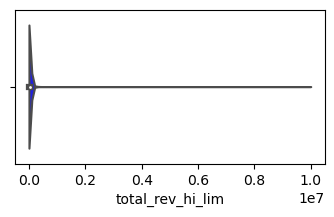

In [ ]:
dist('total_rev_hi_lim')

In [ ]:
df_fe['total_rev_hi_lim_woe'] = pd.cut(df_fe['total_rev_hi_lim'],10)
woe(df_fe,'total_rev_hi_lim_woe')

total_rev_hi_lim_woe  num_observation  good_loan_prob  \
0  (1999999.8, 2999999.7]                1        1.000000   
1  (8999999.1, 9999999.0]                2        1.000000   
2   (999999.9, 1999999.8]                8        0.875000   
3   (-9999.999, 999999.9]           466274        0.883817   
4  (2999999.7, 3999999.6]                0             NaN   
5  (3999999.6, 4999999.5]                0             NaN   
6  (4999999.5, 5999999.4]                0             NaN   
7  (5999999.4, 6999999.3]                0             NaN   
8  (6999999.3, 7999999.2]                0             NaN   
9  (7999999.2, 8999999.1]                0             NaN   

   weight_of_evidence  information_value  
0          -23.014031           11.03447  
1          -22.320882           11.03447  
2          -20.934575           11.03447  
3            0.693152           11.03447  
4                 NaN           11.03447  
5                 NaN           11.03447  
6                 NaN           11.03447  
7                 NaN           11.03447  
8                 NaN           11.03447  
9                 NaN           11.03447

* Information value `total_rev_hi_lim` to high,we will drop

#### WOE: `pymnt_time`

number of unique values : 98
Distribution :
count    466285.000000
mean          8.911018
std          12.253806
min           0.000000
25%           1.000000
50%           2.000000
75%          13.000000
max          97.000000
Name: pymnt_time, dtype: float64


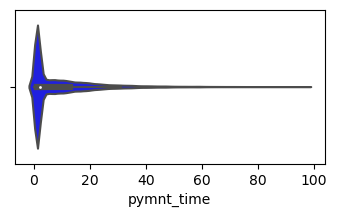

In [ ]:
dist('pymnt_time')

In [ ]:
df_fe['pymnt_time_fc'] = np.where((df_fe['pymnt_time']>=0)&(df_fe['pymnt_time']<=1),0,
                               np.where((df_fe['pymnt_time']>1)&(df_fe['pymnt_time']<=6),1,
                               np.where((df_fe['pymnt_time']>6)&(df_fe['pymnt_time']<=12),2,3)))
woe(df_fe,'pymnt_time_fc')

pymnt_time_fc  num_observation  good_loan_prob  weight_of_evidence  \
0              2            60123        0.792309           -1.037811   
1              1            91812        0.884928           -0.533228   
2              3           120931        0.772837           -0.176801   
3              0           193419        0.981124            0.528427   

   information_value  
0           0.290574  
1           0.290574  
2           0.290574  
3           0.290574

#### WOE: `credit_pull_year`

number of unique values : 47
Distribution :
count    466285.000000
mean         18.267693
std           7.279543
min           1.000000
25%          13.000000
50%          17.000000
75%          22.000000
max          47.000000
Name: credit_pull_year, dtype: float64


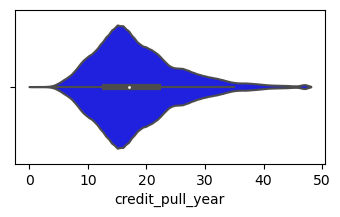

In [ ]:
dist('credit_pull_year')

In [ ]:
df_fe['credit_pull_year_woe'] = pd.cut(df_fe['credit_pull_year'],10)
woe(df_fe,'credit_pull_year_woe')

credit_pull_year_woe  num_observation  good_loan_prob  weight_of_evidence  \
0         (0.954, 5.6]             2447        0.727013           -3.858715   
1         (42.4, 47.0]             3500        0.899429           -3.498542   
2         (37.8, 42.4]             6021        0.911975           -2.950589   
3         (33.2, 37.8]             9018        0.913617           -2.540087   
4         (28.6, 33.2]            25962        0.908289           -1.444917   
5         (24.0, 28.6]            37210        0.903655           -1.059097   
6          (5.6, 10.2]            50809        0.846149           -0.715394   
7         (19.4, 24.0]            84754        0.899828           -0.118482   
8         (10.2, 14.8]            99408        0.870866            0.080164   
9         (14.8, 19.4]           147156        0.886277            0.611855   

   information_value  
0           0.480007  
1           0.480007  
2           0.480007  
3           0.480007  
4           0.480007  
5           0.480007  
6           0.480007  
7           0.480007  
8           0.480007  
9           0.480007

##### Feature we will drop because have:
* Information value <0.02 (useless predictive)
* Information value > 0.5 (suspicious predictive)
* Feature that not make sense to bin

In [ ]:
drop_list = ['verification_status',
             'delinq_2yrs',
             'inq_last_6mths',
             'pub_rec',
             'out_prncp',
             'total_rec_int',
             'total_rec_late_fee',
             'recoveries',
             'collections_12_mths_ex_med',
             'acc_now_delinq',
             'tot_coll_amt',
             'tot_cur_bal',
             'total_rev_hi_lim']

In [ ]:
print (f'Before feature engineering using WOE and IV ,we have {df_eda.shape[1]} column')

Before feature engineering using WOE and IV ,we have 32 column


In [ ]:
df_eda_fe = df_eda.copy()

In [ ]:
df_eda_fe = df_eda_fe.drop(drop_list, axis=1)

In [ ]:
print (f'After feature engineering using WOE and IV ,we have {df_eda_fe.shape[1]} column')

After feature engineering using WOE and IV ,we have 19 column


### Feature Encoding

In [ ]:
df_encode = df_eda_fe.copy()

### Label Encoding

In [ ]:
print(df_encode['grade'].unique())
print(df_encode['emp_length'].unique())
print(df_encode['home_ownership'].unique())
print(df_encode['initial_list_status'].unique())
print(df_encode['term'].unique())

['B' 'C' 'A' 'E' 'F' 'D' 'G']
['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years']
['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']
['f' 'w']
[36 60]


In [ ]:
df_encode['purpose'].value_counts()

debt_consolidation    274195
credit_card           104157
home_improvement       26537
other                  23690
major_purchase          9828
small_business          7013
car                     5397
medical                 4602
moving                  2994
vacation                2487
wedding                 2343
house                   2269
educational              422
renewable_energy         351
Name: purpose, dtype: int64

In [ ]:
df_encode['home_ownership'].value_counts()

MORTGAGE    235875
RENT        188473
OWN          41704
OTHER          182
NONE            50
ANY              1
Name: home_ownership, dtype: int64

`home_ownership` with values ANY and NONE will be combined with value OTHER because they have the same meaning

* Adjusting label `home_ownership`
* Label encoding `grade`

In [ ]:
# Replace label with same characteristic
target_dict = {'MORTGAGE':'MORTGAGE',
               'RENT':'RENT',
               'OWN':'OWN',
               'OTHER':'OTHER',
               'ANY':'OTHER',
               'NONE':'OTHER'}

df_encode["home_ownership"] = df_encode["home_ownership"].map(target_dict)

In [ ]:
df_encode['term'] = np.where(df_encode['term']==36,0,1)

In [ ]:
df_encode['initial_list_status'] = np.where(df_encode['initial_list_status']=='f',0,1)

### One Hot Encoding Categoric

In [ ]:
for cat in [['home_ownership','purpose','emp_length','grade']]:
    onehots = pd.get_dummies(df_encode[cat], prefix = cat)

In [ ]:
onehots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 36 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   home_ownership_MORTGAGE     466285 non-null  uint8
 1   home_ownership_OTHER        466285 non-null  uint8
 2   home_ownership_OWN          466285 non-null  uint8
 3   home_ownership_RENT         466285 non-null  uint8
 4   purpose_car                 466285 non-null  uint8
 5   purpose_credit_card         466285 non-null  uint8
 6   purpose_debt_consolidation  466285 non-null  uint8
 7   purpose_educational         466285 non-null  uint8
 8   purpose_home_improvement    466285 non-null  uint8
 9   purpose_house               466285 non-null  uint8
 10  purpose_major_purchase      466285 non-null  uint8
 11  purpose_medical             466285 non-null  uint8
 12  purpose_moving              466285 non-null  uint8
 13  purpose_other               466285 non-null 

### Numeric Feature Encode

In [ ]:
num = df_encode.select_dtypes(include='number').columns

In [ ]:
manual_bin = ['last_pymnt_amnt','revol_util','revol_bal','pymnt_time','term','loan_status','annual_inc']
auto_bin = num.drop(manual_bin)

feat_manual_bin = df_encode[manual_bin]
feat_auto_bin = df_encode[auto_bin]

In [ ]:
# make a function
def make_bins(df, feature, cut):
    df[feature] = pd.cut(df[feature],cut)
    return df

In [ ]:
# loan amnt
loan_amnt = make_bins(feat_auto_bin, 'loan_amnt',10)
loan_amnt_dum = pd.get_dummies(loan_amnt['loan_amnt'], prefix='loan_amnt')

# int_rate
int_rate = make_bins(feat_auto_bin, 'int_rate',10)
int_rate_dum = pd.get_dummies(int_rate['int_rate'], prefix='int_rate')

# dti
dti = make_bins(feat_auto_bin, 'dti', 10)
dti_dum = pd.get_dummies(dti['dti'], prefix='dti')

# open_acc
open_acc = make_bins(feat_auto_bin,'open_acc',10)
open_acc_dum = pd.get_dummies(open_acc['open_acc'], prefix='open_acc')

# total_acc
total_acc = make_bins(feat_auto_bin, 'total_acc', 7)
total_acc_dum = pd.get_dummies(total_acc['total_acc'], prefix='total_acc')

# total_pymnt
total_pymnt = make_bins(feat_auto_bin, 'total_pymnt', 10)
total_pymnt_dum = pd.get_dummies(total_pymnt['total_pymnt'], prefix='total_pymnt')

# credit_pull_yea
credit_pull_year = make_bins(feat_auto_bin,'credit_pull_year',10)
credit_pull_year_dum = pd.get_dummies(credit_pull_year['credit_pull_year'], prefix='credit_pull_year')



In [ ]:
num_auto_bin = pd.concat([loan_amnt_dum,int_rate_dum,dti_dum,open_acc_dum,
                     total_acc_dum,total_pymnt_dum,credit_pull_year_dum],axis=1)

In [ ]:
# revol_bal
feat_manual_bin['revol_bal_(0, 5000)'] = np.where((feat_manual_bin['revol_bal']>=0)&(feat_manual_bin['revol_bal']<=5000),1,0)
feat_manual_bin['revol_bal_(5000, 10000)'] =   np.where((feat_manual_bin['revol_bal']>5000)&(feat_manual_bin['revol_bal']<=10000),1,0)
feat_manual_bin['revol_bal_(10000, 15000)'] = np.where((feat_manual_bin['revol_bal']>10000)&(feat_manual_bin['revol_bal']<=15000),1,0)
feat_manual_bin['revol_bal_(> 15000)'] = np.where(feat_manual_bin['revol_bal']>15000,1,0)

# revol_util
feat_manual_bin['revol_util_(0, 20)'] = np.where((feat_manual_bin['revol_util']>=0)&(feat_manual_bin['revol_util']<=20),1,0)
feat_manual_bin['revol_util_(20, 40)'] = np.where((feat_manual_bin['revol_util']>20)&(feat_manual_bin['revol_util']<=40),1,0)
feat_manual_bin['revol_util_(40, 60)'] = np.where((feat_manual_bin['revol_util']>40)&(feat_manual_bin['revol_util']<=60),1,0)
feat_manual_bin['revol_util_(60, 80)'] = np.where((feat_manual_bin['revol_util']>60)&(feat_manual_bin['revol_util']<=80),1,0)
feat_manual_bin['revol_util_(> 80)'] = np.where(feat_manual_bin['revol_util']>80,1,0)

# last_pymnt_amnt
feat_manual_bin['last_pymnt_amnt_(0,500)'] = np.where((feat_manual_bin['last_pymnt_amnt']>=0)&(feat_manual_bin['last_pymnt_amnt']<=500),1,0)
feat_manual_bin['last_pymnt_amnt_(500, 1000)'] = np.where((feat_manual_bin['last_pymnt_amnt']>500)&(feat_manual_bin['last_pymnt_amnt']<=1000),1,0)
feat_manual_bin['last_pymnt_amnt_(1000, 1500)'] = np.where((feat_manual_bin['last_pymnt_amnt']>1000)&(feat_manual_bin['last_pymnt_amnt']<=1500),1,0)
feat_manual_bin['last_pymnt_amnt_(1500, 3500)'] = np.where((feat_manual_bin['last_pymnt_amnt']>1500)&(feat_manual_bin['last_pymnt_amnt']<=3500),1,0)
feat_manual_bin['last_pymnt_amnt_(> 3500)'] = np.where((feat_manual_bin['last_pymnt_amnt']>3500),1,0)

# pymnt_time
feat_manual_bin['pymnt_time_(0, 1)'] = np.where((feat_manual_bin['pymnt_time']>=0)&(feat_manual_bin['pymnt_time']<=1),1,0)
feat_manual_bin['pymnt_time_(1, 6)'] = np.where((feat_manual_bin['pymnt_time']>1)&(feat_manual_bin['pymnt_time']<=6),1,0)
feat_manual_bin['pymnt_time_(6, 12)'] = np.where((feat_manual_bin['pymnt_time']>6)&(feat_manual_bin['pymnt_time']<=12),1,0)
feat_manual_bin['pymnt_time_(> 12)'] = np.where((feat_manual_bin['pymnt_time']>12),1,0)

# annual_inc
feat_manual_bin['annual_inc_(low income)'] = np.where((feat_manual_bin['annual_inc']>=0)&(feat_manual_bin['annual_inc']<=50000),1,0)
feat_manual_bin['annual_inc_(mid income)'] = np.where((feat_manual_bin['annual_inc']>50000)&(feat_manual_bin['annual_inc']<=200000),1,0)
feat_manual_bin['annual_inc_(high income)'] = np.where((feat_manual_bin['annual_inc']>200000),1,0)

#Drop orginial Feature
feat_manual_bin = feat_manual_bin.drop(manual_bin, axis=1)

In [ ]:
df_encoded = pd.concat([onehots,num_auto_bin,feat_manual_bin,df_encode['term'],df_encode['initial_list_status'],df_eda_fe['loan_status']],axis = 1)

In [ ]:
df_encoded.head()

home_ownership_MORTGAGE  home_ownership_OTHER  home_ownership_OWN  \
0                        0                     0                   0   
1                        0                     0                   0   
2                        0                     0                   0   
3                        0                     0                   0   
4                        0                     0                   0   

   home_ownership_RENT  purpose_car  purpose_credit_card  \
0                    1            0                    1   
1                    1            1                    0   
2                    1            0                    0   
3                    1            0                    0   
4                    1            0                    0   

   purpose_debt_consolidation  purpose_educational  purpose_home_improvement  \
0                           0                    0                         0   
1                           0                    0                         0   
2                           0                    0                         0   
3                           0                    0                         0   
4                           0                    0                         0   

   purpose_house  purpose_major_purchase  purpose_medical  purpose_moving  \
0              0                       0                0               0   
1              0                       0                0               0   
2              0                       0                0               0   
3              0                       0                0               0   
4              0                       0                0               0   

   purpose_other  purpose_renewable_energy  purpose_small_business  \
0              0                         0                       0   
1              0                         0                       0   
2              0                         0                       1   
3              1                         0                       0   
4              1                         0                       0   

   purpose_vacation  purpose_wedding  emp_length_1 year  emp_length_10+ years  \
0                 0                0                  0                     1   
1                 0                0                  0                     0   
2                 0                0                  0                     1   
3                 0                0                  0                     1   
4                 0                0                  1                     0   

   emp_length_2 years  emp_length_3 years  emp_length_4 years  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   emp_length_5 years  emp_length_6 years  emp_length_7 years  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   emp_length_8 years  emp_length_9 years  emp_length_< 1 year  grade_A  \
0                   0                   0                    0        0   
1                   0                   0                    1        0   
2                   0                   0                    0        0   
3                   0                   0                    0        0   
4                   0                   0                    0        0   

   grade_B  grade_C  grade_D  grade_E  grade_F  grade_G  \
0        1        0        0        0        0        0   
1     

In [ ]:
df_encoded.shape

(466285, 127)

## Modeling

In [ ]:
df_model = df_encoded.copy()

## Library For Modeling

In [ ]:
# Split Dataset
from sklearn.model_selection import train_test_split
# Balance data train using SMOTE
from imblearn.over_sampling import SMOTE
# logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report, roc_auc_score, roc_curve, auc, confusion_matrix
# Hyperparameter
from sklearn.model_selection import RandomizedSearchCV
#Confusion Matrix
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools
    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()


In [ ]:
X = df_model.drop(['loan_status'], axis=1)
y = df_model['loan_status']

In [ ]:
y.value_counts()

1    412111
0     54174
Name: loan_status, dtype: int64

In [ ]:
#Split Dataset 70% Train : 30% Test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=24)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((326399, 126), (139886, 126), (326399,), (139886,))

In [ ]:
# Handle Imbalance Target Using SMOTE
sm = SMOTE(random_state=24)
sm.fit(X_train, y_train)
X_smote, y_smote = sm.fit_resample(X_train, y_train)
X_smote.shape, X_train.shape, y_smote.shape, y_train.shape

((577036, 126), (326399, 126), (577036,), (326399,))

### Train Model

### Logistic Regression

In [ ]:
logreg = LogisticRegression(random_state = 24)
logreg.fit(X_smote, y_smote)

y_pred_proba_train = logreg.predict_proba(X_train)[:][:,1]
y_pred_proba_test = logreg.predict_proba(X_test)[:][:,1]

print('AUC Train Proba :', roc_auc_score(y_train, y_pred_proba_train))
print('AUC Test Proba :', roc_auc_score(y_test, y_pred_proba_test))

AUC Train Proba : 0.9348522516273056
AUC Test Proba : 0.9349863096266842


In [ ]:
y_pred_class = []

for i in y_pred_proba_test:
    if i > 0.5:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)

print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.87      0.66      0.75     16293
           1       0.96      0.99      0.97    123593

    accuracy                           0.95    139886
   macro avg       0.91      0.82      0.86    139886
weighted avg       0.95      0.95      0.95    139886



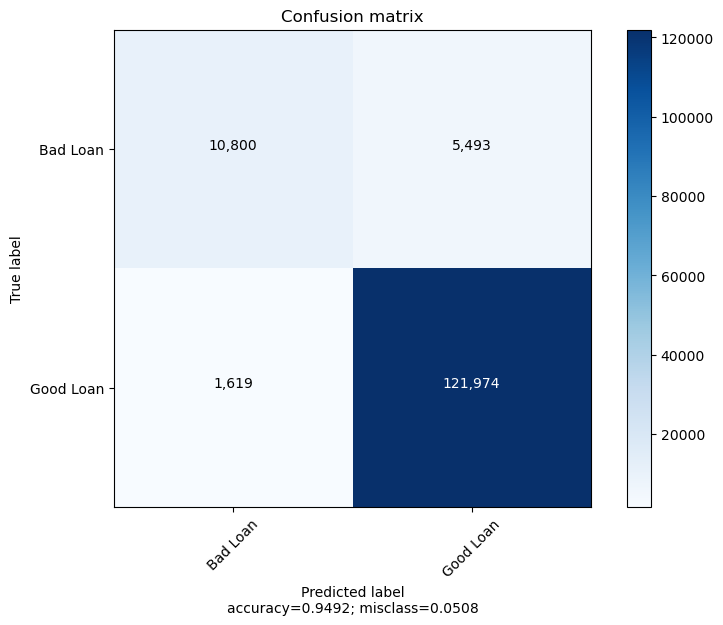

In [ ]:
cm = confusion_matrix(y_test, y_pred_class)
target_names = ['Bad Loan','Good Loan']

plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None,normalize=False)

#### Hyperparameter

In [ ]:
param = {
    'penalty' : ['none', 'l2', 'l1', 'elasticnet'],
    'C' : [float(x) for x in np.linspace(start=0, stop=1, num=75)]
     }

logreg = LogisticRegression()

# search
logreg_clf = RandomizedSearchCV(logreg,
                            param,
                            scoring='roc_auc',
                            cv=5,
                            random_state = 24)

search_logreg = logreg_clf.fit(X_smote,y_smote)
# best hyperparameters
search_logreg.best_params_

{'penalty': 'l2', 'C': 0.08108108108108109}

## Retrain with hyperparameter tuning

In [ ]:
best_params = search_logreg.best_params_
logreg_tuning = LogisticRegression(**best_params)
logreg_tuning.fit(X_smote,y_smote)
y_train_pred_proba = logreg_tuning.predict_proba(X_train)[:][:,1]
y_test_pred_lr_proba = logreg_tuning.predict_proba(X_test)[:][:,1]

print('AUC Train Proba :', roc_auc_score(y_train, y_train_pred_proba))
print('AUC Test Proba :', roc_auc_score(y_test, y_test_pred_lr_proba))

AUC Train Proba : 0.9350379021859883
AUC Test Proba : 0.9353305896793902


In [ ]:
y_pred_class_2 = []

for i in y_test_pred_lr_proba:
    if i > 0.5:
        y_pred_class_2.append(1)
    else:
        y_pred_class_2.append(0)

print(classification_report(y_test, y_pred_class_2))

              precision    recall  f1-score   support

           0       0.87      0.66      0.75     16293
           1       0.96      0.99      0.97    123593

    accuracy                           0.95    139886
   macro avg       0.91      0.82      0.86    139886
weighted avg       0.95      0.95      0.95    139886



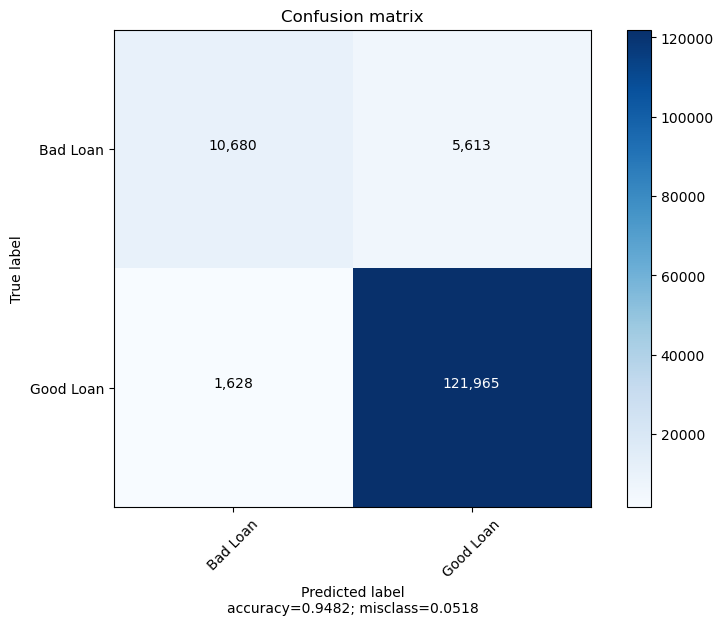

In [ ]:
cm = confusion_matrix(y_test, y_pred_class_2)
target_names = ['Bad Loan','Good Loan']

plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None,normalize=False)

## Show coeficient value each feature with statmodel logistic regression

In [ ]:
import statsmodels.api as sm
X2 = sm.add_constant(X_smote)
est = sm.Logit(y_smote, X2)
est2 = est.fit(method='bfgs')
print(est2.summary())

         Current function value: 0.163186
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


C:\Users\rafif\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:               577036
Model:                          Logit   Df Residuals:                   576909
Method:                           MLE   Df Model:                          126
Date:                Fri, 07 Oct 2022   Pseudo R-squ.:                  0.7646
Time:                        10:50:00   Log-Likelihood:                -94164.
converged:                      False   LL-Null:                   -3.9997e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                -11.9357      0.070   -171.053      0.000     -12.072     -11.799
home_ownership_MORTGAGE                0.1960      0.033   

In [ ]:
# Converting statsmodels summary object to Pandas Dataframe,
df_importance = pd.read_html(est2.summary().tables[1].as_html(),header=0,index_col=0)[0]

# find odds_ratio
for i in df_importance['coef']:
    if i == 0 :
        df_importance['odds_ratio'] = 0
    else:
        df_importance['odds_ratio'] = np.exp(df_importance['coef'])

# show probability contribution
df_importance[df_importance['P>|z|'] <= 0.05].sort_values('odds_ratio',ascending = False)


coef  std err        z  P>|z|  [0.025  \
last_pymnt_amnt_(> 3500)             8.1644    0.268   30.461  0.000   7.639   
loan_amnt_(465.5, 3950.0]            5.8251    0.047  123.152  0.000   5.732   
pymnt_time_(0, 1)                    5.2288    0.039  132.982  0.000   5.152   
last_pymnt_amnt_(1500, 3500)         4.0185    0.105   38.332  0.000   3.813   
loan_amnt_(3950.0, 7400.0]           3.7266    0.040   94.048  0.000   3.649   
pymnt_time_(1, 6)                    3.6181    0.038   95.215  0.000   3.544   
int_rate_(5.399, 7.484]              2.8787    0.082   34.991  0.000   2.717   
total_pymnt_(23111.032, 28888.79]    2.8707    0.058   49.421  0.000   2.757   
dti_(3.999, 7.998]                   2.8143    0.038   74.446  0.000   2.740   
emp_length_4 years                   2.7904    0.040   69.420  0.000   2.712   
loan_amnt_(7400.0, 10850.0]          2.7500    0.037   75.295  0.000   2.678   
emp_length_5 years                   2.7230    0.039   69.506  0.000   2.646   
credit_pull_year_(24.0, 28.6]        2.6955    0.041   65.880  0.000   2.615   
dti_(7.998, 11.997]                  2.6276    0.034   78.331  0.000   2.562   
emp_length_3 years                   2.6119    0.037   71.014  0.000   2.540   
emp_length_7 years                   2.5453    0.042   61.076  0.000   2.464   
emp_length_6 years                   2.5091    0.041   61.057  0.000   2.429   
credit_pull_year_(28.6, 33.2]        2.5024    0.045   55.170  0.000   2.413   
grade_A                              2.4515    0.068   36.258  0.000   2.319   
dti_(27.993, 31.992]                 2.4502    0.039   62.583  0.000   2.373   
dti_(11.997, 15.996]                 2.4230    0.032   75.828  0.000   2.360   
dti_(23.994, 27.993]                 2.4129    0.035   69.913  0.000   2.345   
emp_length_2 years                   2.4103    0.035   68.350  0.000   2.341   
emp_length_1 year                    2.3999    0.038   62.614  0.000   2.325   
dti_(19.995, 23.994]                 2.3824    0.032   73.976  0.000   2.319   
emp_length_8 years                   2.3590    0.043   54.327  0.000   2.274   
total_pymnt_(17333.274, 23111.032]   2.3385    0.043   54.827  0.000   2.255   
dti_(15.996, 19.995]                 2.2801    0.032   72.357  0.000   2.218   
revol_util_(> 80)                    2.2556    0.036   61.924  0.000   2.184   
emp_length_10+ years                 2.1787    0.028   76.881  0.000   2.123   
emp_length_9 years                   2.1613    0.046   46.530  0.000   2.070   
emp_length_< 1 year                  2.0868    0.035   59.206  0.000   2.018   
revol_util_(40, 60)                  2.0828    0.035   59.722  0.000   2.014   
dti_(31.992, 35.991]                 2.0655    0.048   42.838  0.000   1.971   
credit_pull_year_(19.4, 24.0]        2.0521    0.033   61.950  0.000   1.987   
total_pymnt_(28888.79, 34666.548]    1.9846    0.072   27.526  0.000   1.843   
credit_pull_year_(10.2, 14.8]        1.9717    0.032   61.395  0.000   1.909   
revol_util_(60, 80)                  1.9218    0.035   55.128  0.000   1.854   
credit_pull_year_(14.8, 19.4]        1.8564    0.031   60.465  0.000   1.796   
term                                 1.8562    0.021   86.864  0.000   1.814   
loan_amnt_(10850.0, 14300.0]         1.7623    0.037   47.891  0.000   1.690   
dti_(-0.04, 3.999]                   1.7472    0.046   38.091  0.000   1.657   
credit_pull_year_(5.6, 10.2]         1.7198    0.035   49.039  0.000   1.651   
purpose_major_purchase               1.6403    0.061   26.920  0.000   1.521   
purpose_other                        1.5900    0.040   39.429  0.000   1.511   
purpose_home_improvement             1.5691    0.044   35.617  0.000   1.483   
revol_util_(0, 20)                   1.5381    0.044   34.993  0.000   1.452   
int_rate_(9.548, 11.612]             1.4901    0.043   34.628  0.000   1.406   
revol_util_(20, 40)                  1.4787    0.037   40.239  0.000   1.407   
grade_B                              1.

## Show ROC Curve

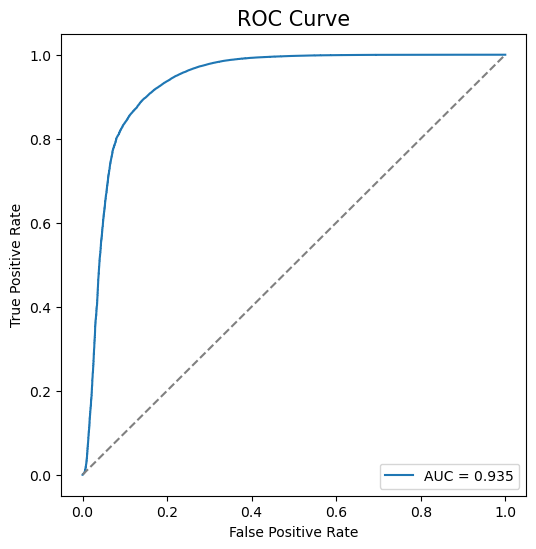

In [ ]:
fpr, tpr, tr = roc_curve(y_test, y_test_pred_lr_proba)
auc = roc_auc_score(y_test, y_test_pred_lr_proba)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='AUC = %0.3f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='grey')
plt.xlabel('False Positive Rate', fontsize=10)
plt.ylabel('True Positive Rate', fontsize=10)
plt.title('ROC Curve', fontsize=15)
plt.legend()

## Show Kolmogrov-Smirnov

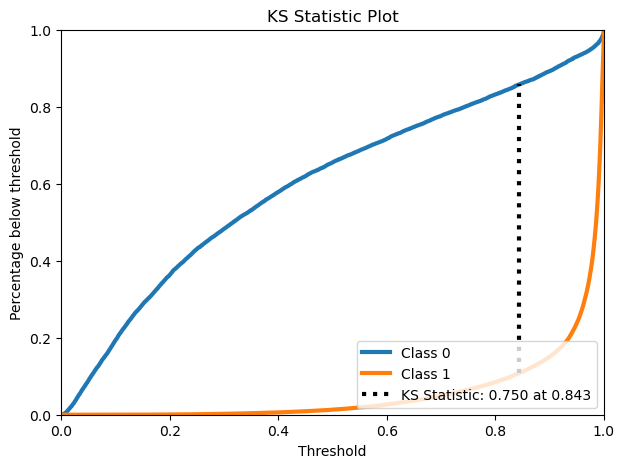

In [ ]:
import scikitplot as skplt
y_pred_proba = logreg_tuning.predict_proba(X_test)

skplt.metrics.plot_ks_statistic(y_test, y_pred_proba, figsize=(7,5));


### Creating Score Card

In [ ]:
# Set new index
df_importance = df_importance.reset_index()

# Rename columns
df_importance = df_importance.rename(columns = {'index' : 'feature'})

# Create new columns feature_name
df_importance['feature_name'] = df_importance['feature'].str.split('_').str[:-1]
df_importance['feature_name'] = df_importance['feature_name'].str.join('_')
df_importance.at[0,'feature_name']='intercept'
df_importance.at[125,'feature_name']='term'
df_importance.at[126,'feature_name']='initial_list_status'

df_importance

feature     coef  std err           z  P>|z|  \
0                                 const -11.9357    0.070 -171.053000  0.000   
1               home_ownership_MORTGAGE   0.1960    0.033    5.926000  0.000   
2                  home_ownership_OTHER   0.0062    0.251    0.025000  0.980   
3                    home_ownership_OWN   1.3989    0.042   33.472000  0.000   
4                   home_ownership_RENT   0.3778    0.033   11.424000  0.000   
5                           purpose_car   1.2140    0.077   15.739000  0.000   
6                   purpose_credit_card   0.7222    0.032   22.397000  0.000   
7            purpose_debt_consolidation   0.5940    0.029   20.583000  0.000   
8                   purpose_educational  -0.0299    0.159   -0.187000  0.851   
9              purpose_home_improvement   1.5691    0.044   35.617000  0.000   
10                        purpose_house   0.3542    0.101    3.523000  0.000   
11               purpose_major_purchase   1.6403    0.061   26.920000  0.000   
12                      purpose_medical   0.9397    0.074   12.681000  0.000   
13                       purpose_moving   0.7671    0.083    9.259000  0.000   
14                        purpose_other   1.5900    0.040   39.429000  0.000   
15             purpose_renewable_energy   0.1003    0.217    0.463000  0.643   
16               purpose_small_business   0.5933    0.057   10.325000  0.000   
17                     purpose_vacation   0.6877    0.093    7.367000  0.000   
18                      purpose_wedding   0.6836    0.094    7.279000  0.000   
19                    emp_length_1 year   2.3999    0.038   62.614000  0.000   
20                 emp_length_10+ years   2.1787    0.028   76.881000  0.000   
21                   emp_length_2 years   2.4103    0.035   68.350000  0.000   
22                   emp_length_3 years   2.6119    0.037   71.014000  0.000   
23                   emp_length_4 years   2.7904    0.040   69.420000  0.000   
24                   emp_length_5 years   2.7230    0.039   69.506000  0.000   
25                   emp_length_6 years   2.5091    0.041   61.057000  0.000   
26                   emp_length_7 years   2.5453    0.042   61.076000  0.000   
27                   emp_length_8 years   2.3590    0.043   54.327000  0.000   
28                   emp_length_9 years   2.1613    0.046   46.530000  0.000   
29                  emp_length_< 1 year   2.0868    0.035   59.206000  0.000   
30                              grade_A   2.4515    0.068   36.258000  0.000   
31                              grade_B   1.4410    0.042   33.936000  0.000   
32                              grade_C   0.9841    0.038   26.079000  0.000   
33                              grade_D   0.1267    0.039    3.229000  0.001   
34                              grade_E  -0.5521    0.048  -11.614000  0.000   
35                              grade_F  -0.6655    0.068   -9.717000  0.000   
36                              grade_G  -0.5744    0.102   -5.656000  0.000   
37            loan_amnt_(465.5, 3950.0]   5.8251    0.047  123.152000  0.000   
38           loan_amnt_(3950.0, 7400.0]   3.7266    0.040   94.048000  0.000   
39          loan_amnt_(7400.0, 10850.0]   2.7500    0.037   75.295000  0.000   
40         loan_amnt_(10850.0, 14300.0]   1.7623    0.037   47.891000  0.000   
41         loan_amnt_(14300.0, 17750.0]   0.8721    0.035   24.797000  0.000   
42         loan_amnt_(17750.0, 21200.0]   0.3676    0.036   10.227000  0.000   
43         loan_amnt_(21200.0, 24650.0]   0.3166    0.046    6.941000  0.000   
44         loan_amnt_(24650.0, 28100.0]   0.1534    0.045    3.392000  0.001   
45         loan_amnt_(28100.0, 31550.0]  -0.1221    0.056   -2.189000  0.029   
46         loan_amnt_(31550.0, 35000.0]  -1.3690    0.050  -27.525000  0.000   
47              int_rate_(5.399, 7.484]   2.8787    0.082   34.991000  0.000   
48              int_rate_(7.484, 9.548]   0.9298    0.061   15.268000  0.000   
49             int_rate_(9.548, 

In [ ]:
# copy dataset
df_scorecard = df_importance.copy()

# define max and min score
min_score = 300
max_score = 850

In [ ]:
# aggregate min and sum
min_sum_coef = df_scorecard.groupby('feature_name')['coef'].min().sum()

# aggregate max and sum
max_sum_coef = df_scorecard.groupby('feature_name')['coef'].max().sum()

# define credit score
df_scorecard['Score_Calculation'] = df_scorecard['coef'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)

# adjust intercept values
df_scorecard['Score_Calculation'][0] = ((df_scorecard['coef'][0] - min_sum_coef) / ((max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score)

# round credit score
df_scorecard['Score_Final'] = df_scorecard['Score_Calculation'].round()

In [ ]:
# check min score (300) & max score (850)
min_sum_score_prel = df_scorecard.groupby('feature_name')['Score_Final'].min().sum()
max_sum_score_prel = df_scorecard.groupby('feature_name')['Score_Final'].max().sum()

print('min score', min_sum_score_prel)
print('max score', max_sum_score_prel)

min score 300.0
max score 850.0


In [ ]:
df_scorecard.sort_values('Score_Final',ascending = False).head(10)

feature     coef  std err        z  P>|z|  \
0                                const -11.9357    0.070 -171.053    0.0   
117           last_pymnt_amnt_(> 3500)   8.1644    0.268   30.461    0.0   
37           loan_amnt_(465.5, 3950.0]   5.8251    0.047  123.152    0.0   
118                  pymnt_time_(0, 1)   5.2288    0.039  132.982    0.0   
116       last_pymnt_amnt_(1500, 3500)   4.0185    0.105   38.332    0.0   
38          loan_amnt_(3950.0, 7400.0]   3.7266    0.040   94.048    0.0   
119                  pymnt_time_(1, 6)   3.6181    0.038   95.215    0.0   
47             int_rate_(5.399, 7.484]   2.8787    0.082   34.991    0.0   
88   total_pymnt_(23111.032, 28888.79]   2.8707    0.058   49.421    0.0   
23                  emp_length_4 years   2.7904    0.040   69.420    0.0   

     [0.025  0.975]   odds_ratio     feature_name  Score_Calculation  \
0   -12.072 -11.799     0.000007        intercept         256.381805   
117   7.639   8.690  3513.612537  last_pymnt_amnt          95.106397   
37    5.732   5.918   338.695001        loan_amnt          67.856091   
118   5.152   5.306   186.568787       pymnt_time          60.909844   
116   3.813   4.224    55.617617  last_pymnt_amnt          46.811163   
38    3.649   3.804    41.537640        loan_amnt          43.410845   
119   3.544   3.693    37.266694       pymnt_time          42.146937   
47    2.717   3.040    17.791130         int_rate          33.533730   
88    2.757   2.985    17.649368      total_pymnt          33.440539   
23    2.712   2.869    16.287534       emp_length          32.505131   

     Score_Final  
0          256.0  
117         95.0  
37          68.0  
118         61.0  
116         47.0  
38          43.0  
119         42.0  
47          34.0  
88          33.0  
23          33.0

Text(0.5, 1.0, 'Top 10 High Score Features')

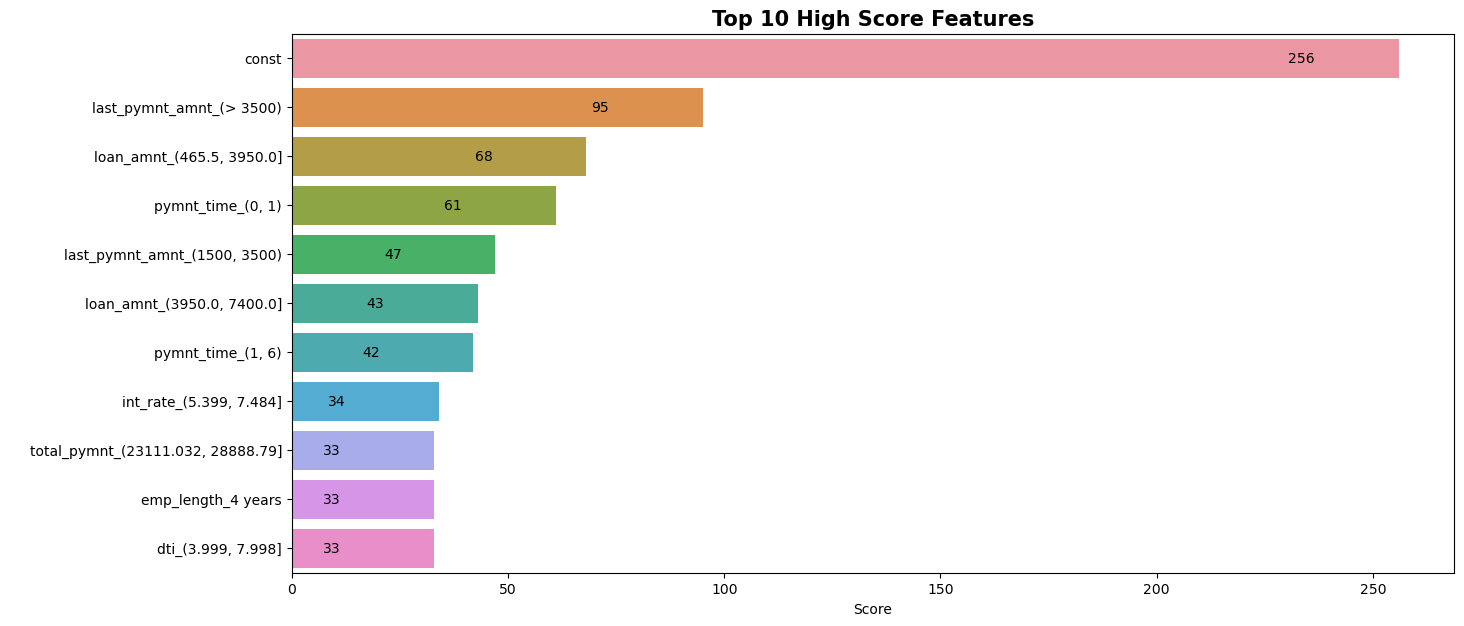

In [ ]:
high_score= df_scorecard.sort_values('Score_Final',ascending = False).head(11)
fig, ax = plt.subplots(figsize=(15, 7))
sns.barplot(x='Score_Final', y='feature', data=high_score)
plt.bar_label(ax.containers[0], padding=-80)
plt.ylabel(' ')
plt.xlabel('Score')
plt.title('Top 10 High Score Features', fontsize=15, weight='extra bold')

* The features above make a high contribution to determining the increase in credit score and lead to be good loan

Text(0.5, 1.0, 'Top 10 Low Score Features')

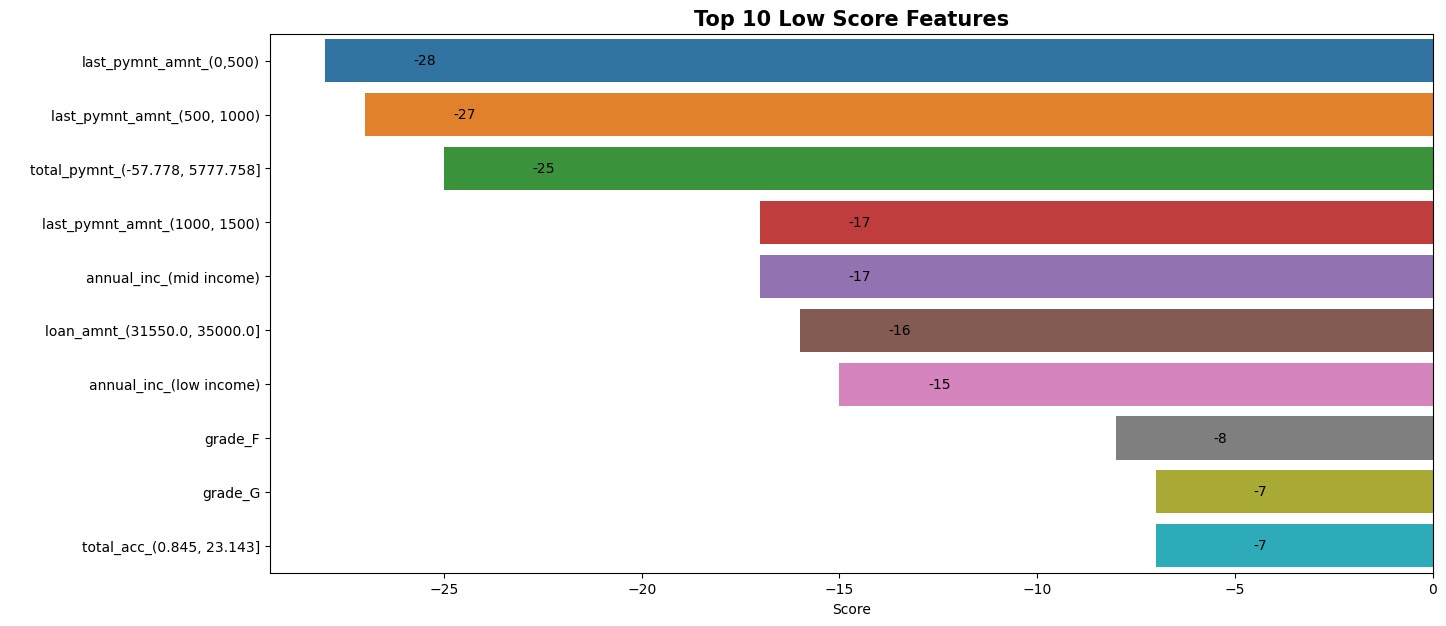

In [ ]:
low_score= df_scorecard.sort_values('Score_Final',ascending = True).head(10)
fig, ax = plt.subplots(figsize=(15, 7))
sns.barplot(x='Score_Final', y='feature', data=low_score)
plt.bar_label(ax.containers[0], padding=-80)
plt.ylabel(' ')
plt.xlabel('Score')
plt.title('Top 10 Low Score Features', fontsize=15, weight='extra bold')

* While the above features can decrease high credit score because some of these features can lead to bad loans

In [ ]:
# define data
data_fico = df_model[X_smote.columns]
df_score = data_fico.copy()
df_score.head()

home_ownership_MORTGAGE  home_ownership_OTHER  home_ownership_OWN  \
0                        0                     0                   0   
1                        0                     0                   0   
2                        0                     0                   0   
3                        0                     0                   0   
4                        0                     0                   0   

   home_ownership_RENT  purpose_car  purpose_credit_card  \
0                    1            0                    1   
1                    1            1                    0   
2                    1            0                    0   
3                    1            0                    0   
4                    1            0                    0   

   purpose_debt_consolidation  purpose_educational  purpose_home_improvement  \
0                           0                    0                         0   
1                           0                    0                         0   
2                           0                    0                         0   
3                           0                    0                         0   
4                           0                    0                         0   

   purpose_house  purpose_major_purchase  purpose_medical  purpose_moving  \
0              0                       0                0               0   
1              0                       0                0               0   
2              0                       0                0               0   
3              0                       0                0               0   
4              0                       0                0               0   

   purpose_other  purpose_renewable_energy  purpose_small_business  \
0              0                         0                       0   
1              0                         0                       0   
2              0                         0                       1   
3              1                         0                       0   
4              1                         0                       0   

   purpose_vacation  purpose_wedding  emp_length_1 year  emp_length_10+ years  \
0                 0                0                  0                     1   
1                 0                0                  0                     0   
2                 0                0                  0                     1   
3                 0                0                  0                     1   
4                 0                0                  1                     0   

   emp_length_2 years  emp_length_3 years  emp_length_4 years  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   emp_length_5 years  emp_length_6 years  emp_length_7 years  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   emp_length_8 years  emp_length_9 years  emp_length_< 1 year  grade_A  \
0                   0                   0                    0        0   
1                   0                   0                    1        0   
2                   0                   0                    0        0   
3                   0                   0                    0        0   
4                   0                   0                    0        0   

   grade_B  grade_C  grade_D  grade_E  grade_F  grade_G  \
0        1        0        0        0        0        0   
1     

In [ ]:
df_score.insert(0, 'Intercept', 1)
scorecard_scores = df_scorecard['Score_Final']
# reshape
scorecard_scores = scorecard_scores.values.reshape(127, 1)
# Calculate Score with matrix multiplication
y_scores = df_score.dot(scorecard_scores)
# Concat
score_card_df = pd.concat([df_score, y_scores], axis=1)
# Rename
score_card_df.rename(columns={0:'Credit Score'}, inplace=True)

In [ ]:
# show
score_card_df.head(5)

Intercept  home_ownership_MORTGAGE  home_ownership_OTHER  \
0          1                        0                     0   
1          1                        0                     0   
2          1                        0                     0   
3          1                        0                     0   
4          1                        0                     0   

   home_ownership_OWN  home_ownership_RENT  purpose_car  purpose_credit_card  \
0                   0                    1            0                    1   
1                   0                    1            1                    0   
2                   0                    1            0                    0   
3                   0                    1            0                    0   
4                   0                    1            0                    0   

   purpose_debt_consolidation  purpose_educational  purpose_home_improvement  \
0                           0                    0                         0   
1                           0                    0                         0   
2                           0                    0                         0   
3                           0                    0                         0   
4                           0                    0                         0   

   purpose_house  purpose_major_purchase  purpose_medical  purpose_moving  \
0              0                       0                0               0   
1              0                       0                0               0   
2              0                       0                0               0   
3              0                       0                0               0   
4              0                       0                0               0   

   purpose_other  purpose_renewable_energy  purpose_small_business  \
0              0                         0                       0   
1              0                         0                       0   
2              0                         0                       1   
3              1                         0                       0   
4              1                         0                       0   

   purpose_vacation  purpose_wedding  emp_length_1 year  emp_length_10+ years  \
0                 0                0                  0                     1   
1                 0                0                  0                     0   
2                 0                0                  0                     1   
3                 0                0                  0                     1   
4                 0                0                  1                     0   

   emp_length_2 years  emp_length_3 years  emp_length_4 years  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   emp_length_5 years  emp_length_6 years  emp_length_7 years  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   emp_length_8 years  emp_length_9 years  emp_length_< 1 year  grade_A  \
0                   0                   0                    0        0   
1                   0                   0                    1        0   
2                   0                   0                    0        0   
3                   0                   0                    0        0   
4                   0                   0                    0        0   

   grade_B  grade_C  grade_D  grade_E  grade_F  grade_G  \

In [ ]:
# Merge Score To Original Dataframe with id
df_id = df[['id','member_id']].copy()
credit_score_w_id = pd.merge(df_id, score_card_df, left_index = True, right_index = True)

In [ ]:
credit_score_w_id

id  member_id  Intercept  home_ownership_MORTGAGE  \
0       1077501    1296599          1                        0   
1       1077430    1314167          1                        0   
2       1077175    1313524          1                        0   
3       1076863    1277178          1                        0   
4       1075358    1311748          1                        0   
...         ...        ...        ...                      ...   
466280  8598660    1440975          1                        1   
466281  9684700   11536848          1                        1   
466282  9584776   11436914          1                        1   
466283  9604874   11457002          1                        0   
466284  9199665   11061576          1                        1   

        home_ownership_OTHER  home_ownership_OWN  home_ownership_RENT  \
0                          0                   0                    1   
1                          0                   0                    1   
2                          0                   0                    1   
3                          0                   0                    1   
4                          0                   0                    1   
...                      ...                 ...                  ...   
466280                     0                   0                    0   
466281                     0                   0                    0   
466282                     0                   0                    0   
466283                     0                   1                    0   
466284                     0                   0                    0   

        purpose_car  purpose_credit_card  purpose_debt_consolidation  \
0                 0                    1                           0   
1                 1                    0                           0   
2                 0                    0                           0   
3                 0                    0                           0   
4                 0                    0                           0   
...             ...                  ...                         ...   
466280            0                    0                           1   
466281            0                    0                           1   
466282            0                    0                           1   
466283            0                    1                           0   
466284            0                    0                           0   

        purpose_educational  purpose_home_improvement  purpose_house  \
0                         0                         0              0   
1                         0                         0              0   
2                         0                         0              0   
3                         0                         0              0   
4                         0                         0              0   
...                     ...                       ...            ...   
466280                    0                         0              0   
466281                    0                         0              0   
466282                    0                         0              0   
466283                    0                         0              0   
466284                    0                         0              0   

        purpose_major_purchase  purpose_medical  purpose_moving  \
0                            0                0               0   
1                            0                0               0   
2                            0                0               0   
3                            0                0               0   
4                            0                0               0   
...                        ...              ...             ...   
466280                       0                0               0   
466281                       0                0               0   
466282    

In [ ]:
result_credit_score = credit_score_w_id[['id','member_id','Credit Score']]

In [ ]:
result_credit_score.sample(10)

id  member_id  Credit Score
397473  15481037   17553386         526.0
41738     313354     313351         418.0
309869  26769586   29262614         347.0
148569   4306237    5488553         466.0
236272  36341665   39073098         436.0
7987      873315    1087561         526.0
120564   5938118    7410547         438.0
96856    6919248    8561187         515.0
193282   1550023    1816122         465.0
124581   5762600    7194407         369.0

In [ ]:
#result_credit_score.to_excel('Credit Score.xlsx')

In [ ]:
# Merge Score To Raw Dataframe
credit_score_w_id_only = credit_score_w_id[['id','Credit Score']]
df_result = pd.merge(df,df_cleaned[['id','pymnt_time','credit_pull_year']],on = 'id')
df_result = pd.merge(df_result, credit_score_w_id_only,on='id')

In [ ]:
df_result.sample(10)

Unnamed: 0        id  member_id  loan_amnt  funded_amnt  \
303618      303618  27691634   30204778      18900        18900   
73032        73032   8285388   10027496       9000         9000   
325739      325739  23876388   26248868      28000        28000   
312762      312762  26278301   28751290      16000        16000   
24328        24328    600850     771104      11200        11200   
14786        14786    758921     959133       8000         8000   
96544        96544   6939681    8581677      24000        24000   
331501      331501  23603360   25976283       5000         5000   
10962        10962    823365    1031928      12000        12000   
453750      453750  10894582   12776731      13000        13000   

        funded_amnt_inv        term  int_rate  installment grade sub_grade  \
303618     18900.000000   60 months     19.52       495.71     E        E2   
73032       9000.000000   60 months     15.10       214.59     C        C2   
325739     28000.000000   36 months      6.49       858.05     A        A2   
312762     16000.000000   36 months     16.99       570.37     D        D3   
24328       9948.952392   60 months      6.91       221.30     A        A5   
14786       8000.000000   36 months      9.99       258.10     B        B1   
96544      23950.000000   60 months     14.33       562.56     C        C2   
331501      5000.000000   36 months     24.08       196.38     F        F2   
10962      11750.000000   36 months      8.49       378.76     A        A5   
453750     13000.000000   60 months     16.24       317.80     C        C5   

                     emp_title emp_length home_ownership  annual_inc  \
303618         General Manager    3 years       MORTGAGE     42000.0   
73032          Service Advisor  10+ years       MORTGAGE     45600.0   
325739  Head Of Infrastructure    2 years       MORTGAGE    145000.0   
312762       Process Assistant    6 years       MORTGAGE     48000.0   
24328                Rain Bird    4 years           RENT    130000.0   
14786                AIG VALIC  10+ years       MORTGAGE    100010.0   
96544               Windstream  10+ years       MORTGAGE     80000.0   
331501                   Sales  10+ years       MORTGAGE     40000.0   
10962      Charlton county BOE    3 years           RENT     42000.0   
453750        Security Manager    8 years           RENT     45000.0   

       verification_status issue_d loan_status pymnt_plan  \
303618     Source Verified  Oct-14     Current          n   
73032      Source Verified  Oct-13     Current          n   
325739     Source Verified  Aug-14     Current          n   
312762     Source Verified  Sep-14  Fully Paid          n   
24328             Verified  Oct-10  Fully Paid          n   
14786         Not Verified  May-11  Fully Paid          n   
96544      Source Verified  Sep-13     Current          n   
331501     Source Verified  Aug-14     Current          n   
10962      Source Verified  Jul-11  Fully Paid          n   
453750     Source Verified  Jan-14     Current          n   

                                                      url  \
303618  https://www.lendingclub.com/browse/loanDetail....   
73032   https://www.lendingclub.com/browse/loanDetail....   
325739  https://www.lendingclub.com/browse/loanDetail....   
312762  https://www.lendingclub.com/browse/loanDetail....   
24328   https://www.lendingclub.com/browse/loanDetail....   
14786   https://www.lendingclub.com/browse/loanDetail....   
96544   https://www.lendingclub.com/browse/loanDetail....   
331501  https://www.lendingclub.com/browse/loanDetail....   
10962   https://www.lendingclub.com/browse/loanDetail....   
453750  https://www.lendingclub.com/browse/loanDetail....   

                                                     desc             purpose  \
303618                                                NaN  debt_consolidation   
73032                                                 NaN               other   
325739                         

## Visualization Based on feature importance model

In [ ]:
df_vis = df_result.copy()

### Fico Score

![FICO_Credit_Score_Ranges.png](attachment:37edf5aa-c502-4963-b72c-689abf539502.png)

We will group credit score based on 'Forbes Advisor'.<br>
source = https://www.forbes.com/advisor/credit-score/what-is-a-fico-score/

In [ ]:
df_vis['score_group'] = np.where((df_vis['Credit Score']>=280)&(df_vis['Credit Score']<580),'Poor (300-579)',
                               np.where((df_vis['Credit Score']>= 580)&(df_vis['Credit Score']<670),'Fair (580-669)',
                               np.where((df_vis['Credit Score']>= 670)&(df_vis['Credit Score']<740),'Good (670-739)',
                               np.where((df_vis['Credit Score']>= 740)&(df_vis['Credit Score']<800),'Good (740-800)','Excellent (801-850)'))))

In [ ]:
score_groupby = df_vis.groupby(['score_group']).agg(num_cust = ('id','count')).reset_index()
score_groupby['percentage'] = round((score_groupby ['num_cust']/466285)*100, 2)
score_groupby = score_groupby.sort_values('percentage',ascending = False)
score_groupby

score_group  num_cust  percentage
1  Poor (300-579)    462558        99.2
0  Fair (580-669)      3727         0.8

[Text(0, 5, '99.20%'), Text(0, 5, '0.80%')]

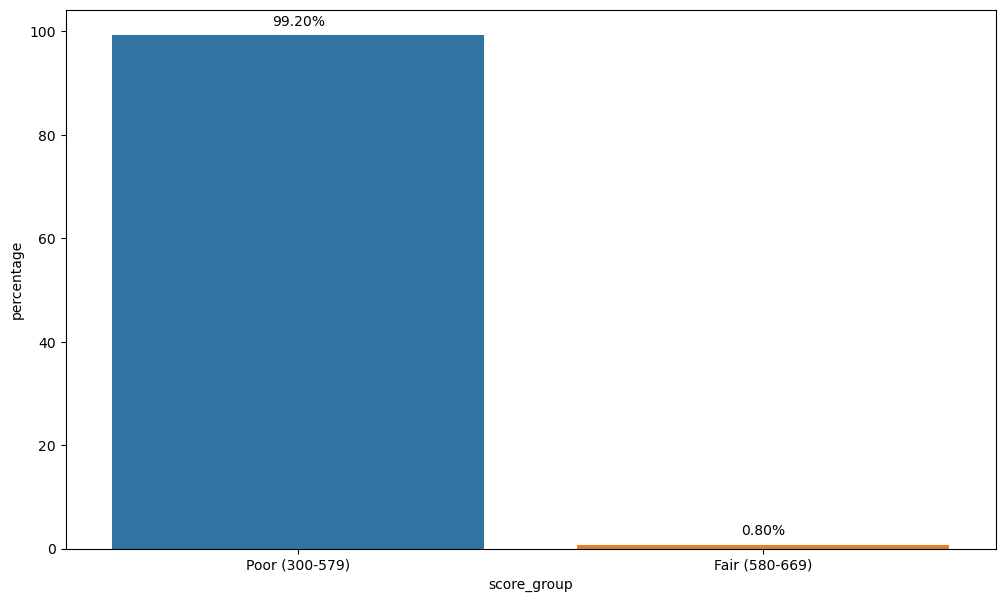

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.barplot(x = score_groupby['score_group'],y =score_groupby['percentage'],orient='v')
plt.bar_label(ax.containers[0], padding=5,fmt='%.2f%%')


* Feature `score_group` explain that majority of customer in this dataset was on credit score Poor group (300-579) by 99.20% while 0.80% on Fair (580-669).<br>
* No customer has credit score above 670 based on scoring using logistic regression. <br>
* Lenders must be careful in providing loans to customers and find solutions on how to take advantage of this situation.

### Adjusting Label to Visualization

In [ ]:
#Adjusting Label on loan_status
good_loan = ['Current','Fully Paid','In Grace Period']
df_vis['loan_status'] = np.where(df_vis['loan_status'].isin(good_loan),'Good Loan','Bad Loan')

#Adjusting Label on loan_amnt
df_vis['loan_amnt_fc'] = np.where((df_vis['loan_amnt']>=465.5)&(df_vis['loan_amnt']< 3950),'465-3950',
                            np.where((df_vis['loan_amnt']>= 3950)&(df_vis['loan_amnt']<7400),'3950-7400',
                            np.where((df_vis['loan_amnt']>= 7400.0)&(df_vis['loan_amnt']<10850.0),'7400-10850',
                            np.where((df_vis['loan_amnt']>= 10850.0)&(df_vis['loan_amnt']<14300.0),'10850-14300',
                            np.where((df_vis['loan_amnt']>= 14300.0)&(df_vis['loan_amnt']<17750.0),'14300-17750',
                            np.where((df_vis['loan_amnt']>= 17750.0)&(df_vis['loan_amnt']<21200.0),'17750-21200',
                            np.where((df_vis['loan_amnt']>= 21200.0)&(df_vis['loan_amnt']<24650.0),'21200-24650',
                            np.where((df_vis['loan_amnt']>= 24650.0)&(df_vis['loan_amnt']<28100.0),'24650-28100',
                            np.where((df_vis['loan_amnt']>= 28100.0)&(df_vis['loan_amnt']<31550.0),'28100-31550','31550-35000')))))))))

#Adjusting Label on last_pymnt_amnt
df_vis['last_pymnt_amnt_fc'] = np.where((df_vis['last_pymnt_amnt']>=0)&(df_vis['last_pymnt_amnt']< 500),'0-500',
                            np.where((df_vis['last_pymnt_amnt']>= 500)&(df_vis['last_pymnt_amnt']<1000),'500-1000',
                            np.where((df_vis['last_pymnt_amnt']>= 1000)&(df_vis['last_pymnt_amnt']<1500),'1000-1500',
                            np.where((df_vis['last_pymnt_amnt']>= 1500)&(df_vis['last_pymnt_amnt']<3500),'1500-3500','> 3500'))))

#Adjusting Label on pymnt_time
df_vis['pymnt_time_fc'] = np.where((df_vis['pymnt_time']>=0)&(df_vis['pymnt_time']<=1),'1 Month',
                            np.where((df_vis['pymnt_time']> 1)&(df_vis['pymnt_time']<=6),'2-6 Month',
                            np.where((df_vis['pymnt_time']> 6)&(df_vis['pymnt_time']<=12),'7-12 Month','Over 1 Year')))

#Adjusting Label on int_rate
df_vis['int_rate_fc'] = np.where((df_vis['int_rate']>=5.399)&(df_vis['int_rate']< 7.484),'5.3-7.4',
                            np.where((df_vis['int_rate']>= 7.484)&(df_vis['int_rate']<9.548),'7.5-9.5',
                            np.where((df_vis['int_rate']>= 9.548)&(df_vis['int_rate']<11.612),'9.6-11.6',
                            np.where((df_vis['int_rate']>= 11.612)&(df_vis['int_rate']<13.676),'11.7-13.6',
                            np.where((df_vis['int_rate']>= 13.676)&(df_vis['int_rate']<15.74),'13.7-15.7',
                            np.where((df_vis['int_rate']>= 15.74)&(df_vis['int_rate']<17.804),'15.8-17.8',
                            np.where((df_vis['int_rate']>= 17.804)&(df_vis['int_rate']<19.868),'17.9-19.8',
                            np.where((df_vis['int_rate']>= 19.868)&(df_vis['int_rate']<21.932),'19.9-21.9',
                            np.where((df_vis['int_rate']>= 21.932)&(df_vis['int_rate']<23.996),'22-23.9','24-26')))))))))

#### Create Orderlist

In [ ]:
order_list_loan = ['465-3950','3950-7400','7400-10850','10850-14300','14300-17750',
                  '17750-21200','21200-24650','24650-28100','28100-31550','31550-35000']
order_list_last_pymnt = ['0-500','500-1000','1000-1500','1500-3500','> 3500']
order_list_pymnt_time = ['1 Month','2-6 Month','7-12 Month','Over 1 Year']
order_list_int = ['5.3-7.4','7.5-9.5','9.6-11.6','11.7-13.6','13.7-15.7',
                  '15.8-17.8','17.9-19.8','19.9-21.9','22-23.9','24-26']
order_list_emp = ['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years']

### Create Visual

### Loan Status

In [ ]:
loan_status_groupby = df_vis.groupby(['loan_status']).agg(num_cust = ('id','count')).reset_index()
loan_status_groupby['percentage'] = round((loan_status_groupby ['num_cust']/466285)*100, 2)
loan_status_groupby = loan_status_groupby.sort_values('percentage',ascending = False)
loan_status_groupby

loan_status  num_cust  percentage
1   Good Loan    412111       88.38
0    Bad Loan     54174       11.62

Text(0.5, 0, 'Score Group')

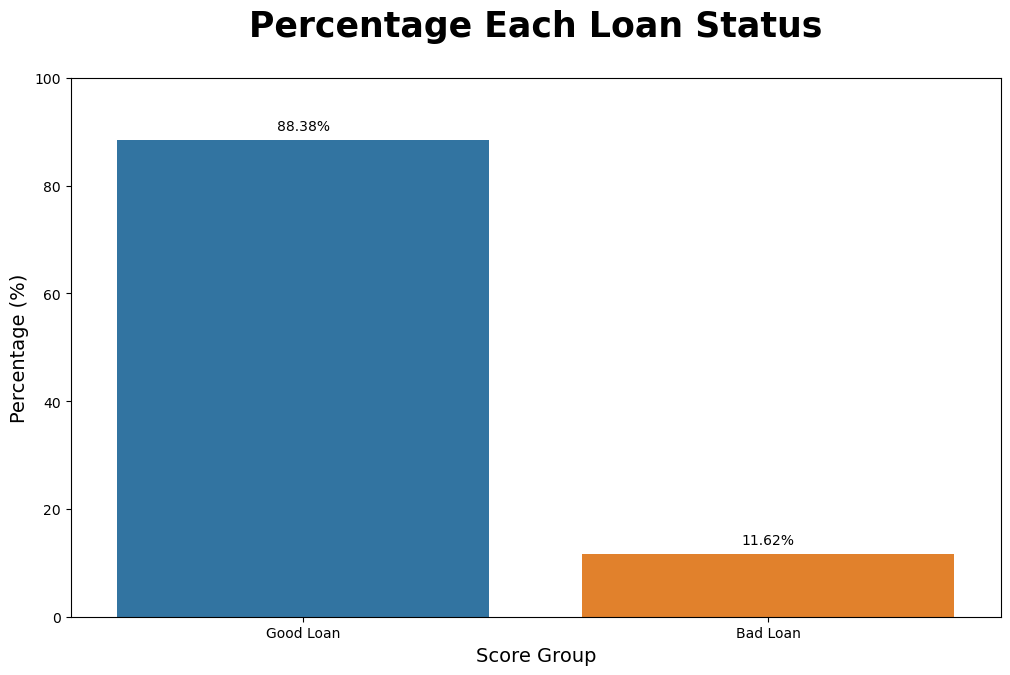

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.barplot(x = loan_status_groupby['loan_status'],y =loan_status_groupby['percentage'],orient='v')
plt.bar_label(ax.containers[0], padding=5,fmt='%.2f%%')
plt.title('Percentage Each Loan Status',
          fontsize=25, weight='extra bold', pad=30)
plt.ylim(0,100)
plt.ylabel('Percentage (%)', fontsize=14)
plt.xlabel('Score Group', fontsize=14)

#### Bad Loan Rate Based On Loan Amount

In [ ]:
df_vis_loan = df_vis.groupby(['score_group','loan_status','loan_amnt_fc']).agg(num_cust=('id','count')).reset_index()
total_cust_loan= df_vis_loan.groupby(['loan_amnt_fc']).agg(total_cust=('num_cust','sum')).reset_index()
df_vis_loan_group = df_vis_loan.merge(total_cust_loan,on = ['loan_amnt_fc'])
bad_loan_rate = df_vis_loan_group[df_vis_loan_group['loan_status']=='Bad Loan']
bad_loan_rate['bad_loan_rate'] = round((bad_loan_rate['num_cust']/bad_loan_rate['total_cust'])*100, 2)
bad_loan_rate

score_group loan_status loan_amnt_fc  num_cust  total_cust  \
0   Fair (580-669)    Bad Loan  10850-14300        11       64925   
2   Poor (300-579)    Bad Loan  10850-14300      7159       64925   
4   Fair (580-669)    Bad Loan  14300-17750        11       61015   
6   Poor (300-579)    Bad Loan  14300-17750      7158       61015   
8   Fair (580-669)    Bad Loan  17750-21200         8       57857   
10  Poor (300-579)    Bad Loan  17750-21200      6662       57857   
12  Fair (580-669)    Bad Loan  21200-24650         1       25802   
14  Poor (300-579)    Bad Loan  21200-24650      3046       25802   
16  Fair (580-669)    Bad Loan  24650-28100         3       26562   
18  Poor (300-579)    Bad Loan  24650-28100      3108       26562   
20  Fair (580-669)    Bad Loan    3950-7400        24       75586   
22  Poor (300-579)    Bad Loan    3950-7400      8538       75586   
24  Fair (580-669)    Bad Loan     465-3950         2       27835   
25  Poor (300-579)    Bad Loan     465-3950      3416       27835   
27  Fair (580-669)    Bad Loan   7400-10850        17       91600   
29  Poor (300-579)    Bad Loan   7400-10850     10632       91600   
32  Poor (300-579)    Bad Loan  28100-31550      1770       13583   
35  Poor (300-579)    Bad Loan  31550-35000      2608       21520   

    bad_loan_rate  
0            0.02  
2           11.03  
4            0.02  
6           11.73  
8            0.01  
10          11.51  
12           0.00  
14          11.81  
16           0.01  
18          11.70  
20           0.03  
22          11.30  
24           0.01  
25          12.27  
27           0.02  
29          11.61  
32          13.03  
35          12.12

Text(0.5, 0, 'Loan Amount')

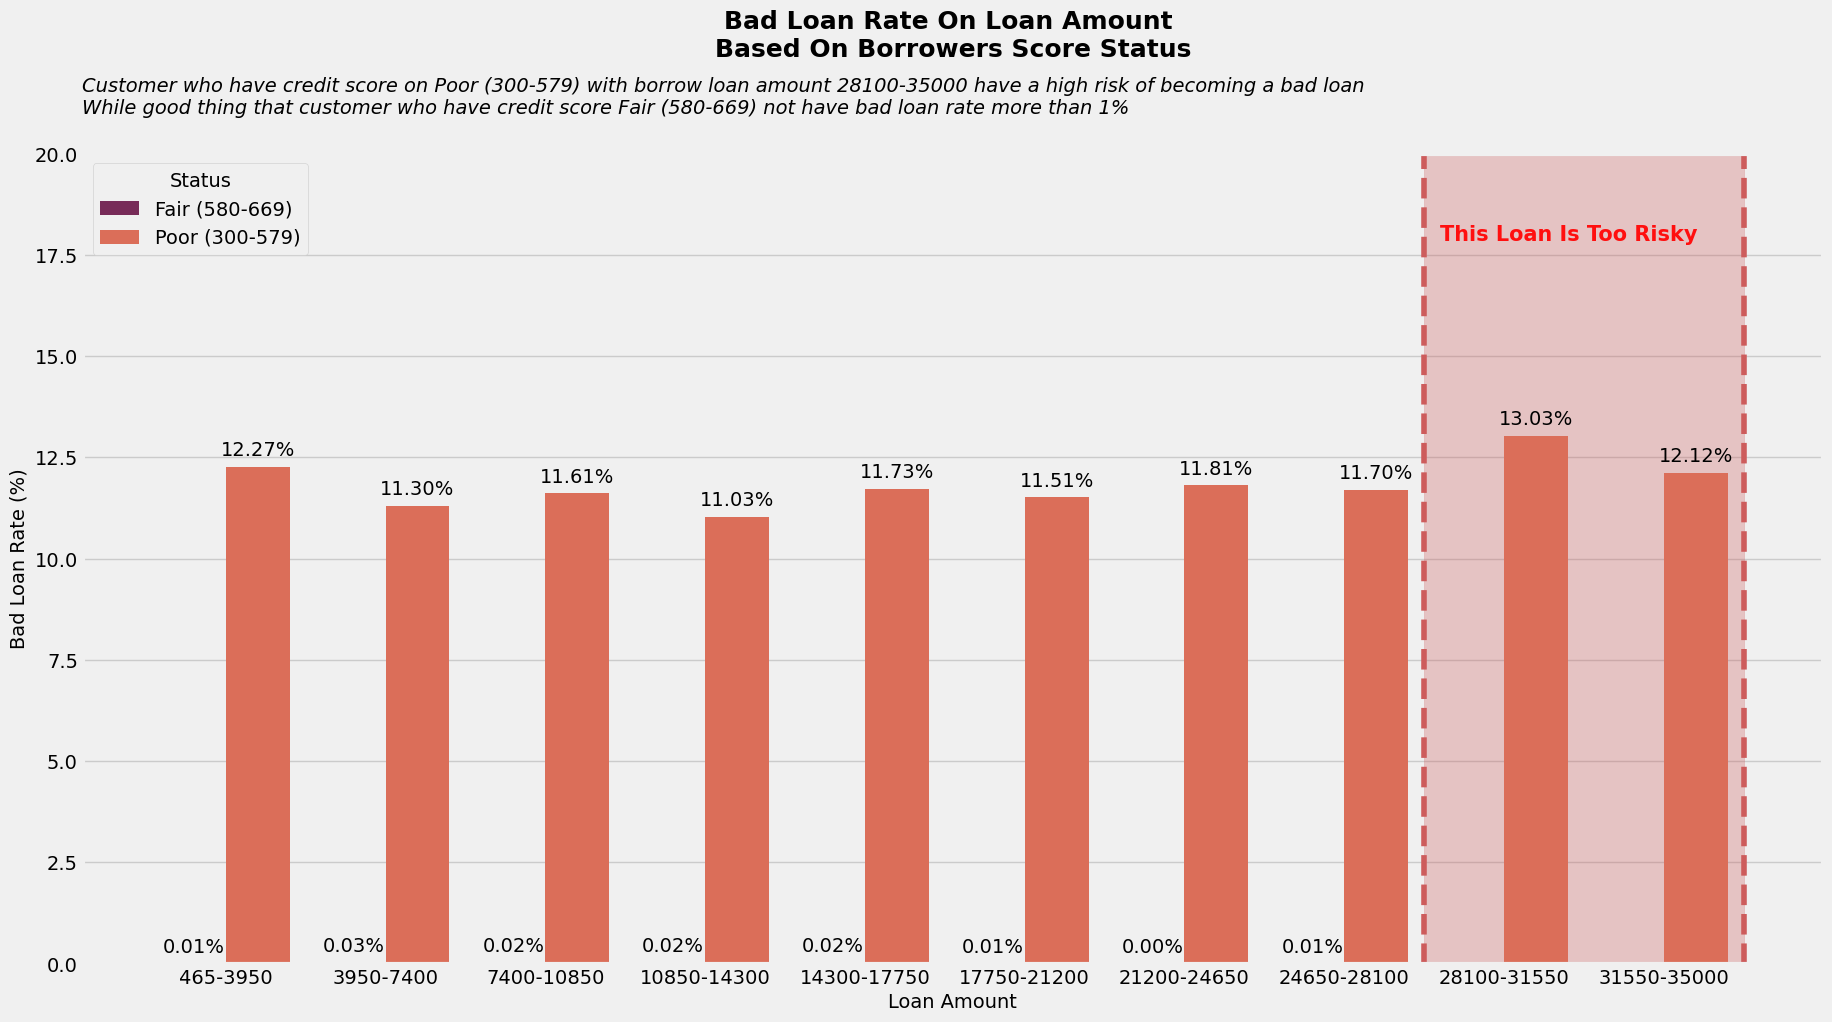

In [ ]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(20, 10))

sns.barplot(x='loan_amnt_fc',y='bad_loan_rate',data=bad_loan_rate,palette='rocket',
              hue='score_group',ci=None, order=order_list_loan)

plt.axvline(7.5, ls='--', color='indianred')
plt.axvline(9.5, ls='--', color='indianred')
plt.stackplot(np.arange(7.5,10), [[25000]], color='indianred', alpha=0.3)
plt.text(x=7.6, y=18, s='This Loan Is Too Risky', fontsize=15,
         color='#ff0f0f', va='center', weight='extra bold')
#plt.text(x=8, y=17, s='', fontsize=9,
         #color='#ff0f0f', va='center', weight='extra bold')


plt.ylim(0,20)

plt.title('Bad Loan Rate On Loan Amount \nBased On Borrowers Score Status',
          fontsize=18, weight='extra bold', pad=70)
plt.text(x=-0.9, y=21, s='Customer who have credit score on Poor (300-579) with borrow loan amount 28100-35000 have a high risk of becoming a bad loan \nWhile good thing that customer who have credit score Fair (580-669) not have bad loan rate more than 1% ',
         fontstyle='italic', fontsize=14)
plt.bar_label(ax.containers[0], padding=5,fmt='%.2f%%')
plt.bar_label(ax.containers[1], padding=5,fmt='%.2f%%')

plt.legend(title='Status', loc='upper left')
plt.ylabel('Bad Loan Rate (%)', fontsize=14)
plt.xlabel('Loan Amount', fontsize=14)

#### Bad Loan Rate  Last Payment Amount

In [ ]:
df_vis_payment = df_vis.groupby(['score_group','loan_status','last_pymnt_amnt_fc']).agg(num_cust=('id','count')).reset_index()
total_cust_payment= df_vis_payment.groupby(['last_pymnt_amnt_fc']).agg(total_cust=('num_cust','sum')).reset_index()
df_vis_payment_group = df_vis_payment.merge(total_cust_payment,on = ['last_pymnt_amnt_fc'])
bad_payment_rate = df_vis_payment_group[df_vis_payment_group['loan_status']=='Bad Loan']
bad_payment_rate['bad_loan_rate'] = round((bad_payment_rate['num_cust']/bad_payment_rate['total_cust'])*100, 2)
bad_payment_rate

score_group loan_status last_pymnt_amnt_fc  num_cust  total_cust  \
0   Fair (580-669)    Bad Loan          1500-3500         1       23770   
2   Poor (300-579)    Bad Loan          1500-3500       613       23770   
4   Fair (580-669)    Bad Loan             > 3500        76      112859   
6   Poor (300-579)    Bad Loan             > 3500       448      112859   
8   Poor (300-579)    Bad Loan              0-500     35560      215660   
10  Poor (300-579)    Bad Loan          1000-1500      1957       15162   
12  Poor (300-579)    Bad Loan           500-1000     15519       98834   

    bad_loan_rate  
0            0.00  
2            2.58  
4            0.07  
6            0.40  
8           16.49  
10          12.91  
12          15.70

Text(0.5, 0, 'Last Payment Amount')

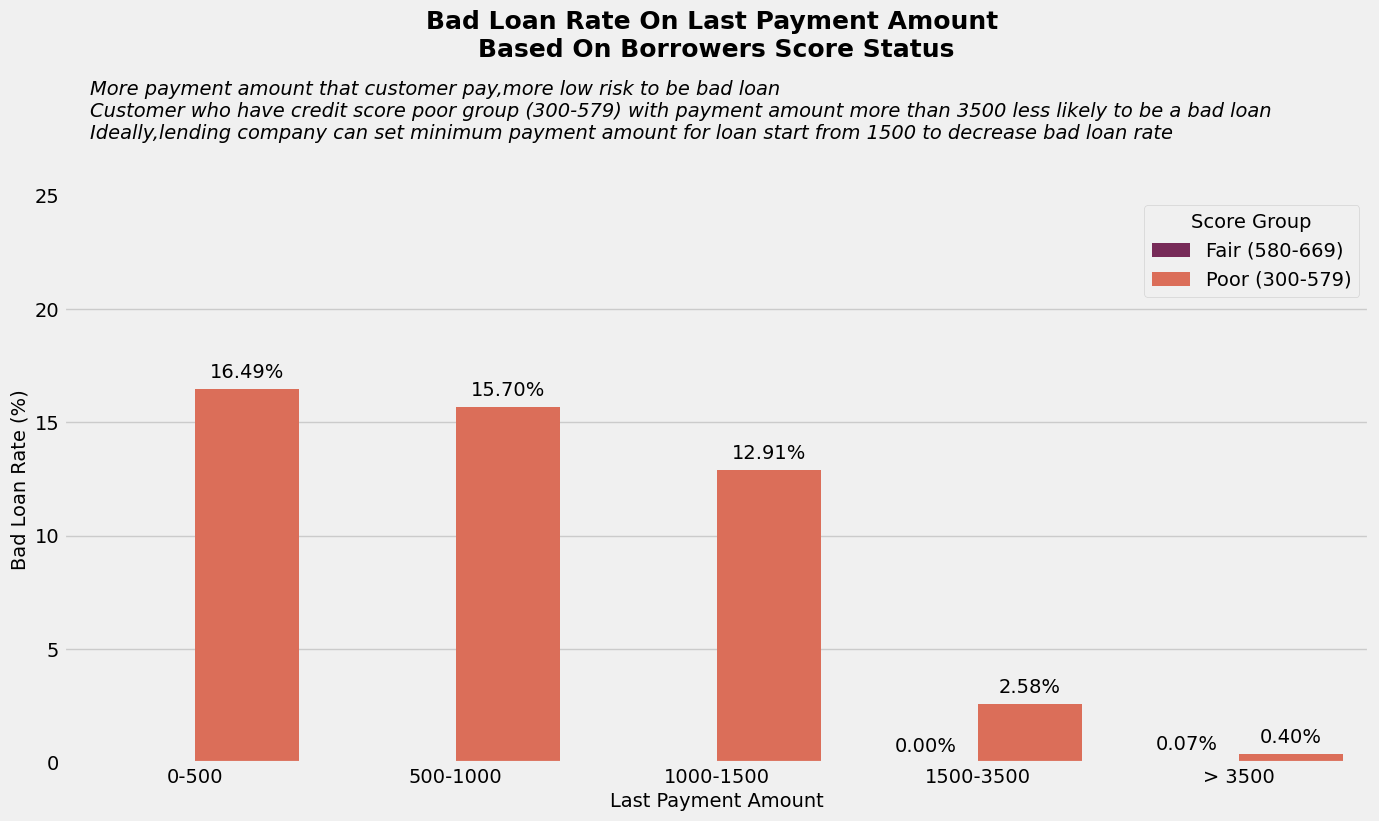

In [ ]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(15, 7))

sns.barplot(x='last_pymnt_amnt_fc',y='bad_loan_rate',data=bad_payment_rate,palette='rocket',
              hue='score_group',ci=None, order=order_list_last_pymnt)

plt.bar_label(ax.containers[0], padding=5, fmt='%.2f%%')
plt.bar_label(ax.containers[1], padding=5, fmt='%.2f%%')

plt.ylim(0,25)
plt.title('Bad Loan Rate On Last Payment Amount \nBased On Borrowers Score Status',
          fontsize=18, weight='extra bold', pad=100)
plt.text(x=-0.4, y=27.5, s='More payment amount that customer pay,more low risk to be bad loan\nCustomer who have credit score poor group (300-579) with payment amount more than 3500 less likely to be a bad loan\nIdeally,lending company can set minimum payment amount for loan start from 1500 to decrease bad loan rate',
         fontstyle='italic', fontsize=14)
plt.legend(title='Score Group', loc='upper right')
plt.ylabel('Bad Loan Rate (%)', fontsize=14)
plt.xlabel('Last Payment Amount', fontsize=14)

#### Bad Loan Rate  Based On Interest Rate

In [ ]:
df_vis_int = df_vis.groupby(['score_group','loan_status','int_rate_fc']).agg(num_cust=('id','count')).reset_index()
total_cust_int = df_vis_int.groupby(['int_rate_fc']).agg(total_cust=('num_cust','sum')).reset_index()
df_vis_int_group = df_vis_int.merge(total_cust_int,on = ['int_rate_fc'])
bad_int_rate = df_vis_int_group[df_vis_int_group['loan_status']=='Bad Loan']
bad_int_rate['bad_loan_rate'] = round((bad_int_rate['num_cust']/bad_int_rate['total_cust'])*100, 2)
bad_int_rate

score_group loan_status int_rate_fc  num_cust  total_cust  \
0   Fair (580-669)    Bad Loan   11.7-13.6        22       94533   
2   Poor (300-579)    Bad Loan   11.7-13.6      9053       94533   
4   Fair (580-669)    Bad Loan   13.7-15.7        17       87615   
6   Poor (300-579)    Bad Loan   13.7-15.7     10893       87615   
8   Fair (580-669)    Bad Loan   15.8-17.8         7       60358   
10  Poor (300-579)    Bad Loan   15.8-17.8      9695       60358   
12  Fair (580-669)    Bad Loan   17.9-19.8         3       38003   
14  Poor (300-579)    Bad Loan   17.9-19.8      7011       38003   
16  Fair (580-669)    Bad Loan   19.9-21.9         2       19782   
18  Poor (300-579)    Bad Loan   19.9-21.9      4007       19782   
20  Fair (580-669)    Bad Loan     5.3-7.4         4       27568   
22  Poor (300-579)    Bad Loan     5.3-7.4       715       27568   
24  Fair (580-669)    Bad Loan     7.5-9.5         5       56410   
26  Poor (300-579)    Bad Loan     7.5-9.5      2647       56410   
28  Fair (580-669)    Bad Loan    9.6-11.6        17       58827   
30  Poor (300-579)    Bad Loan    9.6-11.6      4554       58827   
33  Poor (300-579)    Bad Loan     22-23.9      3388       14343   
36  Poor (300-579)    Bad Loan       24-26      2134        8846   

    bad_loan_rate  
0            0.02  
2            9.58  
4            0.02  
6           12.43  
8            0.01  
10          16.06  
12           0.01  
14          18.45  
16           0.01  
18          20.26  
20           0.01  
22           2.59  
24           0.01  
26           4.69  
28           0.03  
30           7.74  
33          23.62  
36          24.12

Text(0.5, 0, 'Interest Rate (%)')

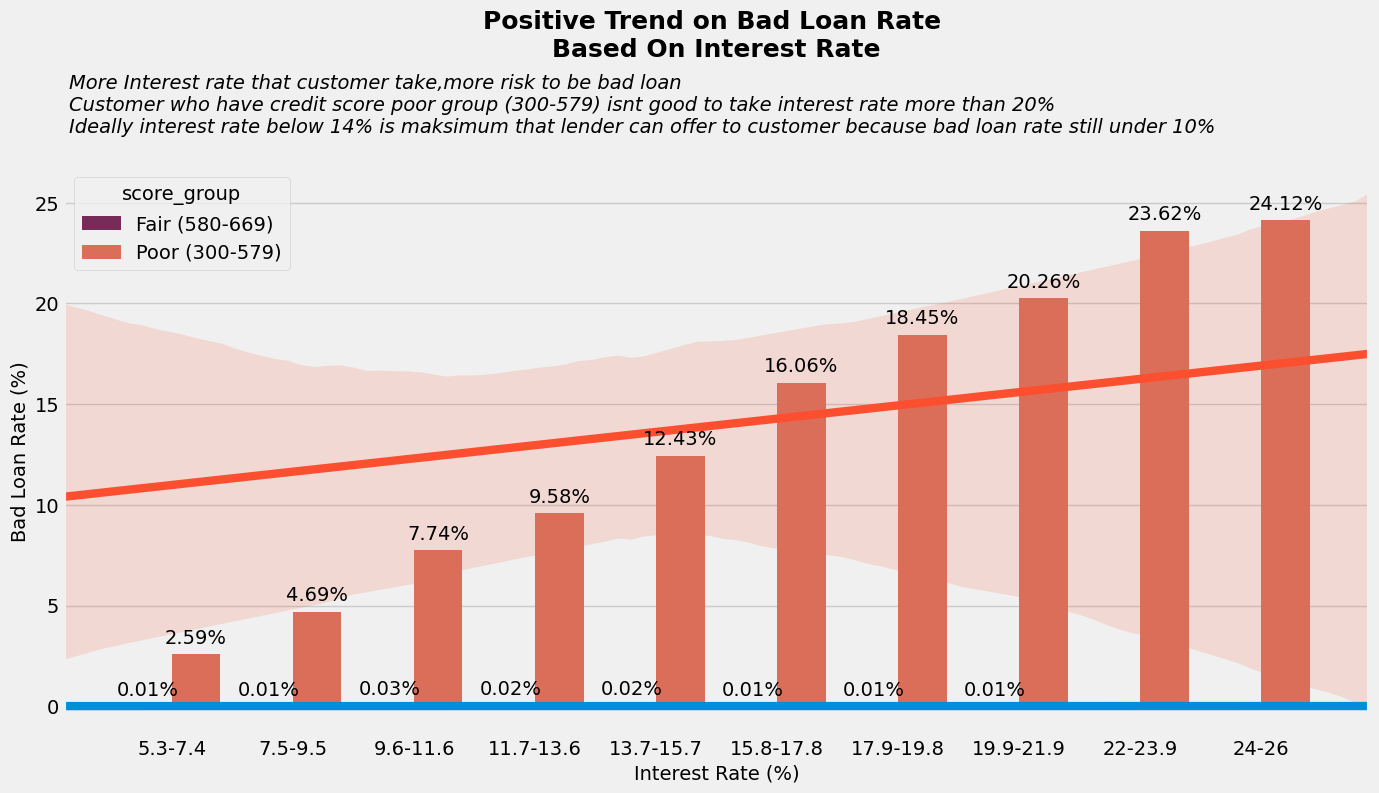

In [ ]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(15, 7))

sns.barplot(x='int_rate_fc',y='bad_loan_rate',data=bad_int_rate,palette='rocket',
              hue='score_group',ci=None, order=order_list_int)


sns.regplot(x=np.arange(0, len(bad_int_rate[bad_int_rate['score_group'] == 'Fair (580-669)'])), y='bad_loan_rate',
            data=bad_int_rate[bad_int_rate['score_group'] == 'Fair (580-669)'], scatter=False, label = 'Trend Fair', truncate=False)
sns.regplot(x=np.arange(0, len(bad_int_rate[bad_int_rate['score_group'] == 'Poor (300-579)'])), y='bad_loan_rate',
            data=bad_int_rate[bad_int_rate['score_group'] == 'Poor (300-579)'], scatter=False, label = 'Trend Poor', truncate=False)

plt.bar_label(ax.containers[0], padding=5, fmt='%.2f%%')
plt.bar_label(ax.containers[1], padding=5, fmt='%.2f%%')

#plt.ylim(0,100)
plt.title('Positive Trend on Bad Loan Rate \nBased On Interest Rate',
          fontsize=18, weight='extra bold', pad=80)
plt.text(x=-0.85, y=28.5, s='More Interest rate that customer take,more risk to be bad loan\nCustomer who have credit score poor group (300-579) isnt good to take interest rate more than 20%\nIdeally interest rate below 14% is maksimum that lender can offer to customer because bad loan rate still under 10%',
         fontstyle='italic', fontsize=14)
#plt.legend(title='Status', loc='upper left')
plt.ylabel('Bad Loan Rate (%)', fontsize=14)
plt.xlabel('Interest Rate (%)', fontsize=14)

#### Bad Loan Rate  Based On Payment Time

In [ ]:
df_vis_pymnt_time = df_vis.groupby(['pymnt_time_fc','score_group','loan_status']).agg(num_cust=('id','count')).reset_index()
total_cust_pymnt= df_vis_pymnt_time.groupby(['pymnt_time_fc']).agg(total_cust=('num_cust','sum')).reset_index()
df_vis_pymnt_group = df_vis_pymnt_time.merge(total_cust_pymnt,on = ['pymnt_time_fc'])
bad_pymnt_rate = df_vis_pymnt_group[df_vis_pymnt_group['loan_status']=='Bad Loan']
bad_pymnt_rate['bad_loan_rate'] = round((bad_pymnt_rate['num_cust']/bad_pymnt_rate['total_cust'])*100, 2)

Text(0.5, 0, 'Payment Time')

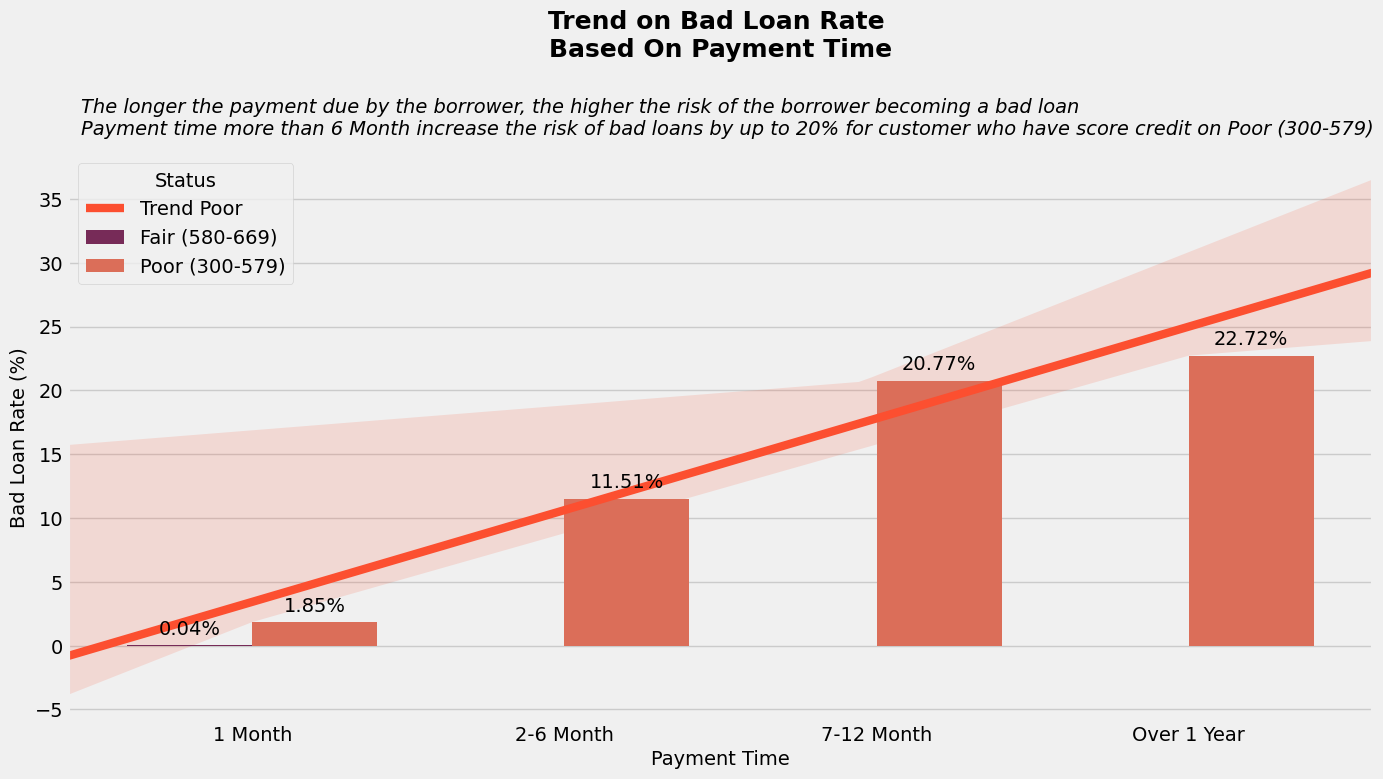

In [ ]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(15, 7))

sns.barplot(x='pymnt_time_fc',y='bad_loan_rate',data=bad_pymnt_rate,palette='rocket',
              hue='score_group',ci=None, order=order_list_pymnt_time)


sns.regplot(x=np.arange(0, len(bad_pymnt_rate[bad_pymnt_rate['score_group'] == 'Fair (580-669)'])), y='bad_loan_rate',
            data=bad_pymnt_rate[bad_pymnt_rate['score_group'] == 'Fair (580-669)'], scatter=False, label = 'Trend Fair', truncate=False)
sns.regplot(x=np.arange(0, len(bad_pymnt_rate[bad_pymnt_rate['score_group'] == 'Poor (300-579)'])), y='bad_loan_rate',
            data=bad_pymnt_rate[bad_pymnt_rate['score_group'] == 'Poor (300-579)'], scatter=False, label = 'Trend Poor', truncate=False)

plt.bar_label(ax.containers[0], padding=5, fmt='%.2f%%')
plt.bar_label(ax.containers[1], padding=5, fmt='%.2f%%')

#plt.ylim(0,100)
plt.title('Trend on Bad Loan Rate \nBased On Payment Time',
          fontsize=18, weight='extra bold', pad=70)
plt.text(x=-0.55, y=40, s='The longer the payment due by the borrower, the higher the risk of the borrower becoming a bad loan\nPayment time more than 6 Month increase the risk of bad loans by up to 20% for customer who have score credit on Poor (300-579)',
         fontstyle='italic', fontsize=14)
plt.legend(title='Status', loc='upper left')
plt.ylabel('Bad Loan Rate (%)', fontsize=14)
plt.xlabel('Payment Time', fontsize=14)

#### Good Loan Rate Based On Employment Length

In [ ]:
df_vis_emp = df_vis.groupby(['emp_length','score_group','loan_status']).agg(num_cust=('id','count')).reset_index()
total_cust_emp = df_vis_emp.groupby(['emp_length']).agg(total_cust=('num_cust','sum')).reset_index()
df_vis_emp_group = df_vis_emp.merge(total_cust_emp,on = ['emp_length'])
bad_emp_rate = df_vis_emp_group[df_vis_emp_group['loan_status']=='Bad Loan']
bad_emp_rate['bad_loan_rate'] = round((bad_emp_rate['num_cust']/bad_emp_rate['total_cust'])*100, 2)

Text(0.5, 0, 'Payment Time')

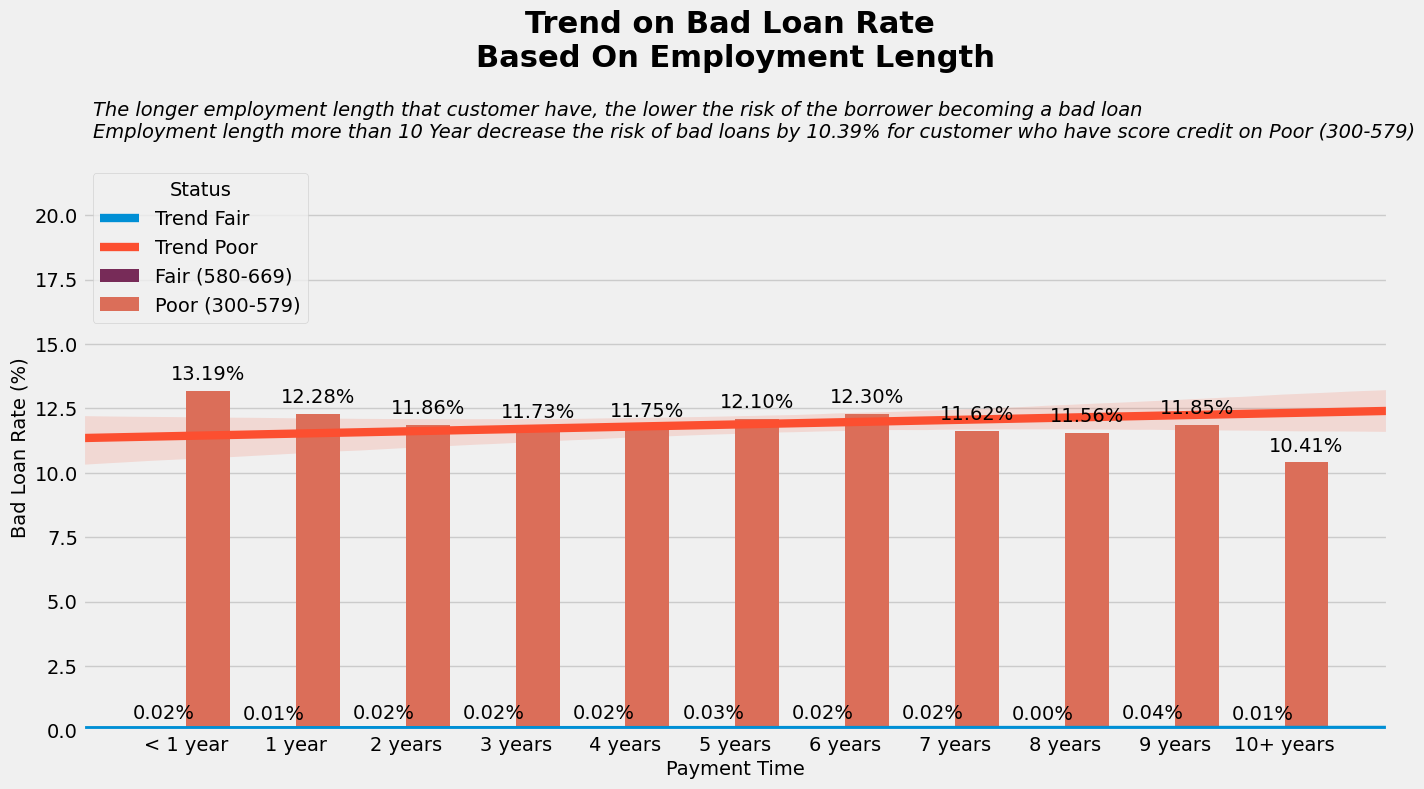

In [ ]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(15, 7))

sns.barplot(x='emp_length',y='bad_loan_rate',data=bad_emp_rate,palette='rocket',
              hue='score_group',ci=None, order=order_list_emp)


sns.regplot(x=np.arange(0, len(bad_emp_rate[bad_emp_rate['score_group'] == 'Fair (580-669)'])), y='bad_loan_rate',
            data=bad_emp_rate[bad_emp_rate['score_group'] == 'Fair (580-669)'], scatter=False, label = 'Trend Fair', truncate=False)
sns.regplot(x=np.arange(0, len(bad_emp_rate[bad_emp_rate['score_group'] == 'Poor (300-579)'])), y='bad_loan_rate',
            data=bad_emp_rate[bad_emp_rate['score_group'] == 'Poor (300-579)'], scatter=False, label = 'Trend Poor', truncate=False)

plt.bar_label(ax.containers[0], padding=5, fmt='%.2f%%')
plt.bar_label(ax.containers[1], padding=5, fmt='%.2f%%')

plt.ylim(0,22)
plt.title('Trend on Bad Loan Rate \nBased On Employment Length',
          fontsize=22, weight='extra bold', pad=70)
plt.text(x=-0.85, y=23, s='The longer employment length that customer have, the lower the risk of the borrower becoming a bad loan\nEmployment length more than 10 Year decrease the risk of bad loans by 10.39% for customer who have score credit on Poor (300-579)',
         fontstyle='italic', fontsize=14)
plt.legend(title='Status', loc='upper left')
plt.ylabel('Bad Loan Rate (%)', fontsize=14)
plt.xlabel('Payment Time', fontsize=14)

## Summary

Lending Companies (LC) can pay attention to customer profile that is important enough to be considered for a loan, feature like:
1. Loan Amount; The amount of the loan given is related to the interest rate that must be paid. The larger the loan amount, the higher the interest rate that must be paid. The company can recommend a loan amount that is not too risky to become a bad loan.Loan amount more than 28100 not recomend to offer for customer.
2. Last Payment Amount; More payment amount that customer take, lower the risk of the customer becoming a bad loan.Lending Companies can set limit minimum amount from 1500 for payment amount that must customer pay every due
3. Payment Time; The longer time that must be paid by the customer, the higher the risk of the customer becoming a bad loan.Limiting the payment time max 6 years can reduce the risk of bad loans
4. Interest Rate; More interest rate that customer take,increasing more bad loan rate. Ideally if lending companies want to keep bad loan low, they can offer interest rate below 14%.Lending companies mus avoid to offer loan with interest rate more than 20%.
5. Employment Length; In the visualization, it has been proven that the longer the customer's work experience, the more capable the customer is to repay the loan, thereby increasing the good loan.